# [Flight][Centralized] 02. Pre-Processing and Exploratory Data Analysis (EDA)

Data pre-processing, with target marking, and data analysis.

## 01. Imports and Settings

In [1]:
# Imports
from libs.plots import (
    show_boxplot,
    show_histogram,
    show_scatterplot
)  # plots.py
from libs.pre_process import preprocess_flight_data  # pre_process.py

import pandas as pd
import warnings


# Ignore warnings
warnings.filterwarnings("ignore")

# Pandas settings
pd.options.display.float_format = "{:.2f}".format
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)
pd.set_option("display.max_colwidth", 150)  # Increase column width

# Default path
DATA_PATH = "data/"

## 02. Load and Pre-Process Data

In [2]:
# Load data
jamming_flight_df = pd.read_csv(f"{DATA_PATH}raw/jamming_flight.csv")
spoofing_flight_df = pd.read_csv(f"{DATA_PATH}raw/spoofing_flight.csv")

# Pre-processing flights data...
jamming_flight_df = preprocess_flight_data(jamming_flight_df)
spoofing_flight_df = preprocess_flight_data(spoofing_flight_df)

In [3]:
# First rows of Jamming flight
jamming_flight_df.head()

DateTime  SpeedChanged_speedX  SpeedChanged_speedY  \
0 2024-08-27 19:49:44.889401913                 0.00                 0.00   
1 2024-08-27 19:49:44.992233753                 0.00                 0.00   
2 2024-08-27 19:49:45.151545763                 0.00                 0.00   
3 2024-08-27 19:49:45.261006116                 0.00                 0.00   
4 2024-08-27 19:49:45.365369081                 0.00                 0.00   

   SpeedChanged_speedZ  AltitudeChanged_altitude  AttitudeChanged_roll  \
0                 0.00                      0.00                  0.00   
1                 0.00                      0.00                  0.00   
2                 0.00                      0.00                  0.00   
3                 0.00                      0.00                  0.00   
4                 0.00                      0.00                  0.00   

   AttitudeChanged_pitch  AttitudeChanged_yaw  GpsLocationChanged_latitude  \
0                  -0.00                -0.32                       -22.00   
1                  -0.00                -0.32                       -22.00   
2                  -0.00                -0.32                       -22.00   
3                  -0.00                -0.32                       -22.00   
4                  -0.00                -0.32                       -22.00   

   GpsLocationChanged_longitude  GpsLocationChanged_altitude  \
0                        -47.93                       858.30   
1                        -47.93                       858.30   
2                        -47.93                       858.30   
3                        -47.93                       858.30   
4                        -47.93                       858.30   

   GpsLocationChanged_latitude_accuracy  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   

   GpsLocationChanged_longitude_accuracy  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   GpsLocationChanged_altitude_accuracy  HomeChanged_latitude  \
0                                     0                  0.00   
1                                     0                  0.00   
2                                     0                  0.00   
3                                     0                  0.00   
4                                     0                  0.00   

   HomeChanged_longitude  HomeChanged_altitude  moveByEnd_dX  moveByEnd_dY  \
0                   0.00                  0.00          0.00          0.00   
1                   0.00                  0.00          0.00          0.00   
2                   0.00                  0.00          0.00          0.00   
3                   0.00                  0.00          0.00          0.00   
4                   0.00                  0.00          0.00          0.00   

   moveByEnd_dZ  moveByEnd_dPsi  WifiSignalChanged_rssi  \
0          0.00            0.00                     -41   
1          0.00            0.00                     -41   
2          0.00            0.00                     -41   
3          0.00            0.00                     -41   
4          0.00            0.00                     -41   

   BatteryStateChanged_percent  FlyingStateChanged_state_unknown  \
0                           81                                 1   
1                           81                                 1   
2                           81                                 1   
3                           81                                 1   
4                           81                                 1   

   FlyingStateChanged_state_landed  FlyingStateChanged_state_takingoff  \
0                                0     

In [4]:
# Categorical columns
categorical_cols = [col for col in jamming_flight_df.columns if any(col.startswith(suffix) for suffix in [
    "FlyingStateChanged_state_", "HomeTypeAvailabilityChanged_type_"])]
# Convert categorical columns to object
jamming_flight_df[categorical_cols] = jamming_flight_df[categorical_cols].astype(object)
spoofing_flight_df[categorical_cols] = spoofing_flight_df[categorical_cols].astype(object)

# Numerical columns
numerical_cols = sorted(list(set(jamming_flight_df.drop(columns=["DateTime"]).columns) - set(categorical_cols)))

## 03. Target Marking

### 03.1. Jamming Flight

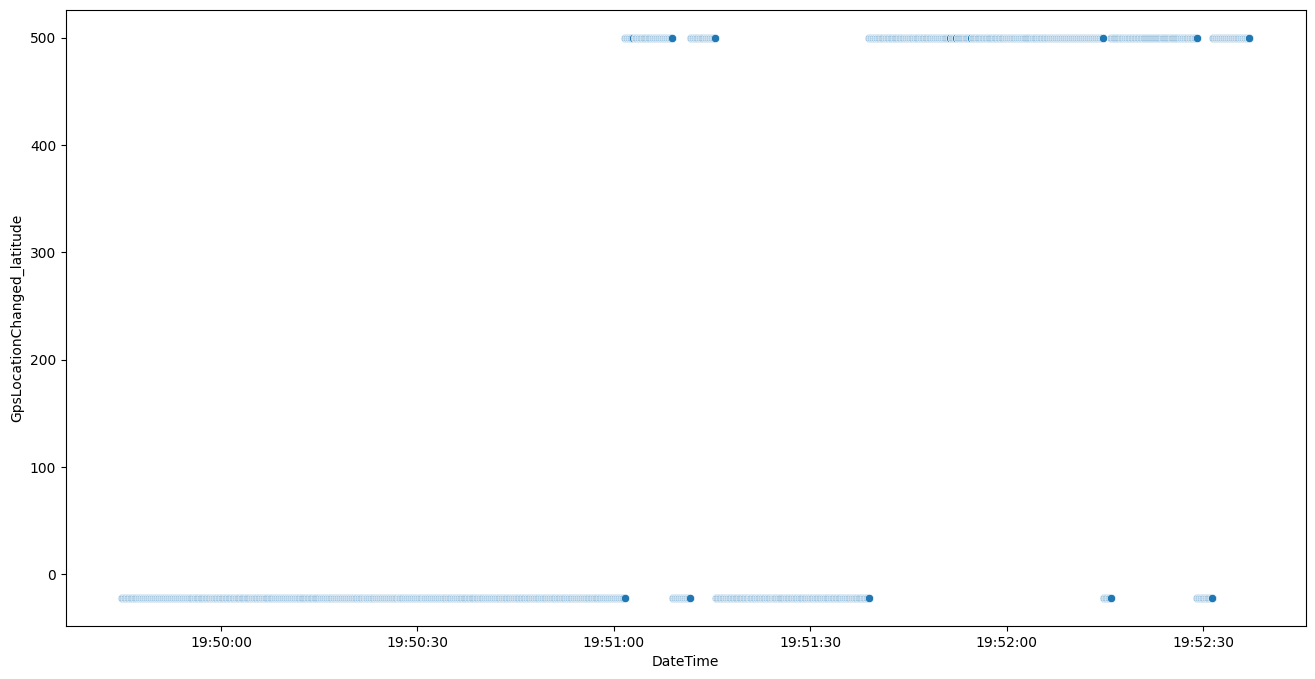

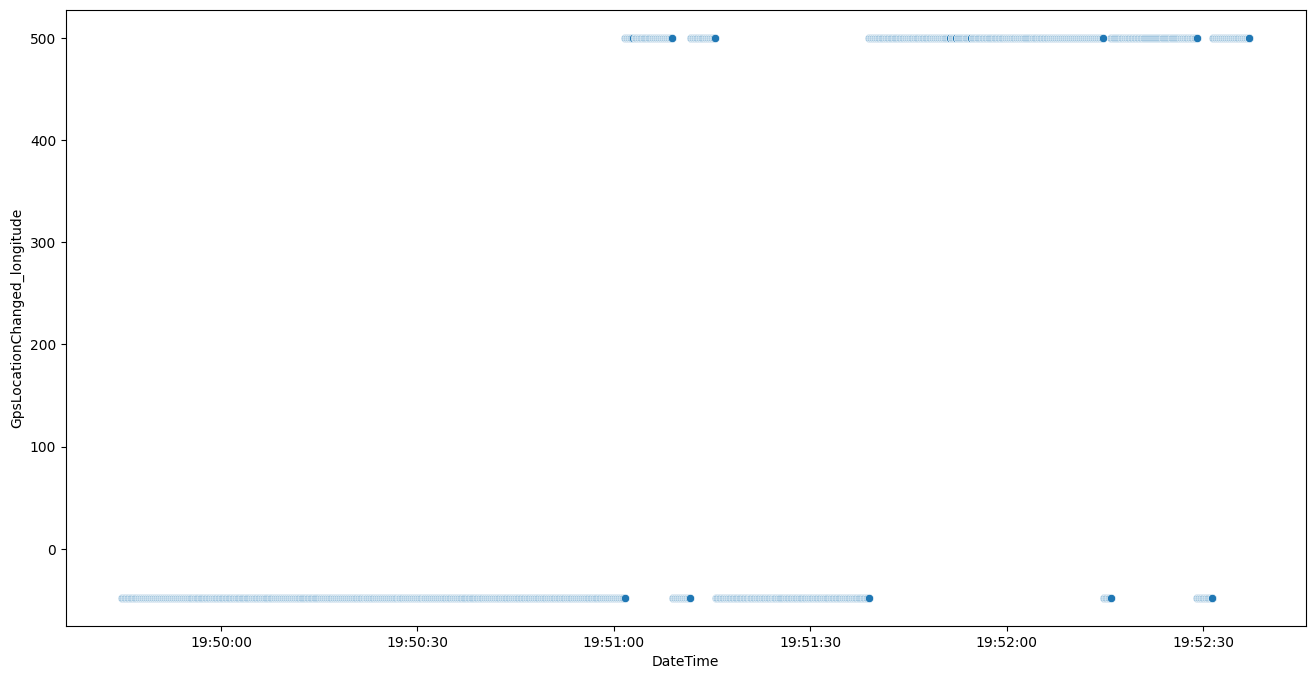

In [5]:
# Latitude and Longitude in Jamming data
show_scatterplot(jamming_flight_df, "DateTime", "GpsLocationChanged_latitude", category="")
show_scatterplot(jamming_flight_df, "DateTime", "GpsLocationChanged_longitude", category="")

In [6]:
# Marking 'is_target' when changing coordinates
jamming_flight_df["is_target"] = 0
jamming_flight_df.loc[jamming_flight_df.DateTime >= "2024-08-27 19:50:55", "is_target"] = 1

### 03.2. Spoofing Flight

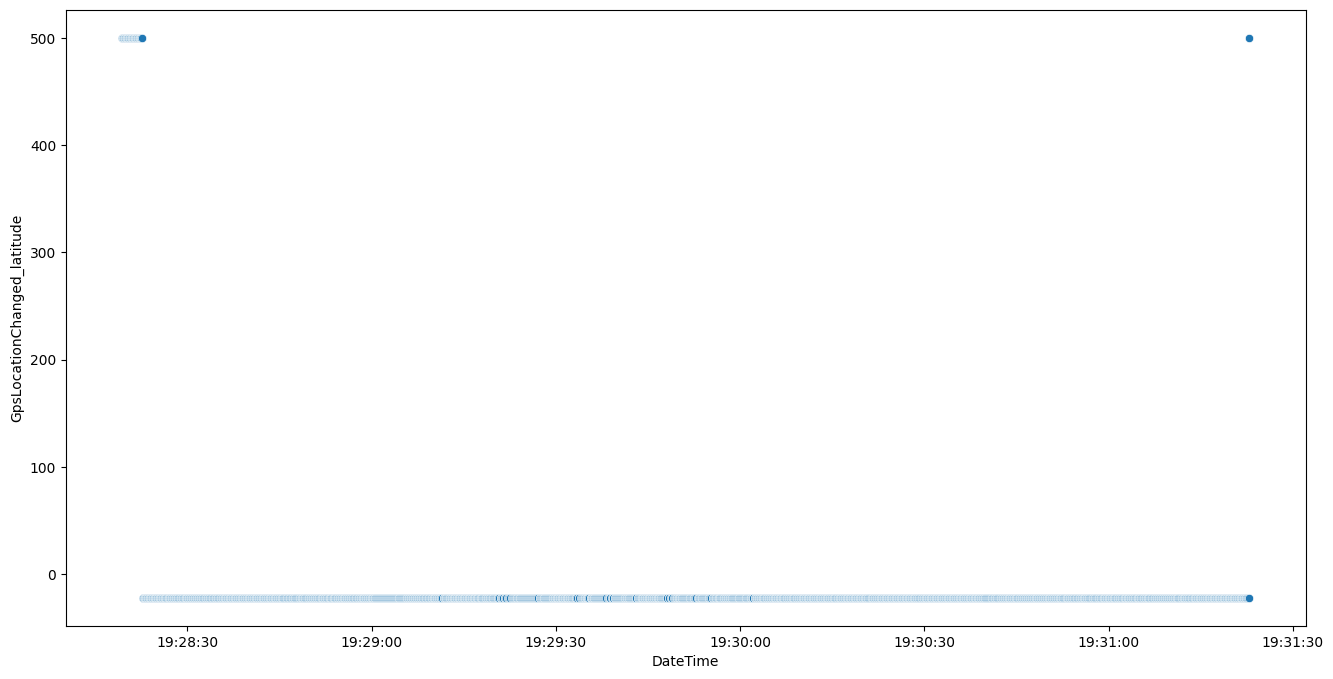

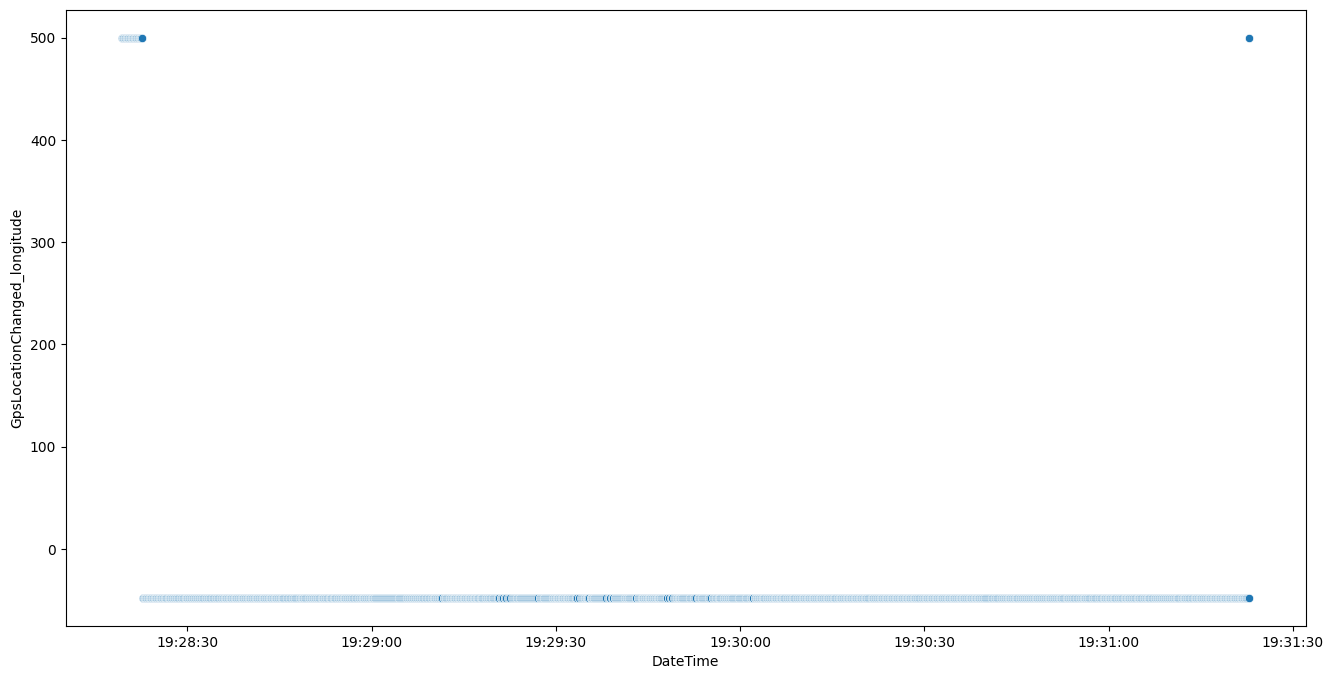

In [7]:
# Latitude and Longitude in Spoofing data
show_scatterplot(spoofing_flight_df, "DateTime", "GpsLocationChanged_latitude", category="");
show_scatterplot(spoofing_flight_df, "DateTime", "GpsLocationChanged_longitude", category="")

In [8]:
# Marking 'is_target' when changing coordinates
spoofing_flight_df["is_target"] = 0
spoofing_flight_df.loc[(spoofing_flight_df.DateTime <= "2024-08-27 19:28:30") | (spoofing_flight_df.DateTime >= "2024-08-27 19:31:20"), "is_target"] = 1

## 04. Data Analysis

In [9]:
print("\nJamming Flight:\n")
display(pd.DataFrame({"Count": jamming_flight_df["is_target"].value_counts(),
                      "Percentage": jamming_flight_df["is_target"].value_counts(normalize=True) * 100}))

print("\nSpoofing Flight:\n")
display(pd.DataFrame({"Count": spoofing_flight_df["is_target"].value_counts(),
                      "Percentage": spoofing_flight_df["is_target"].value_counts(normalize=True) * 100}))
print("\n")


Jamming Flight:



Count  Percentage
is_target                   
1            912       58.42
0            649       41.58


Spoofing Flight:



Count  Percentage
is_target                   
0           1486       91.96
1            130        8.04

### 04.1. Jamming Flight



>> AltitudeChanged_altitude:



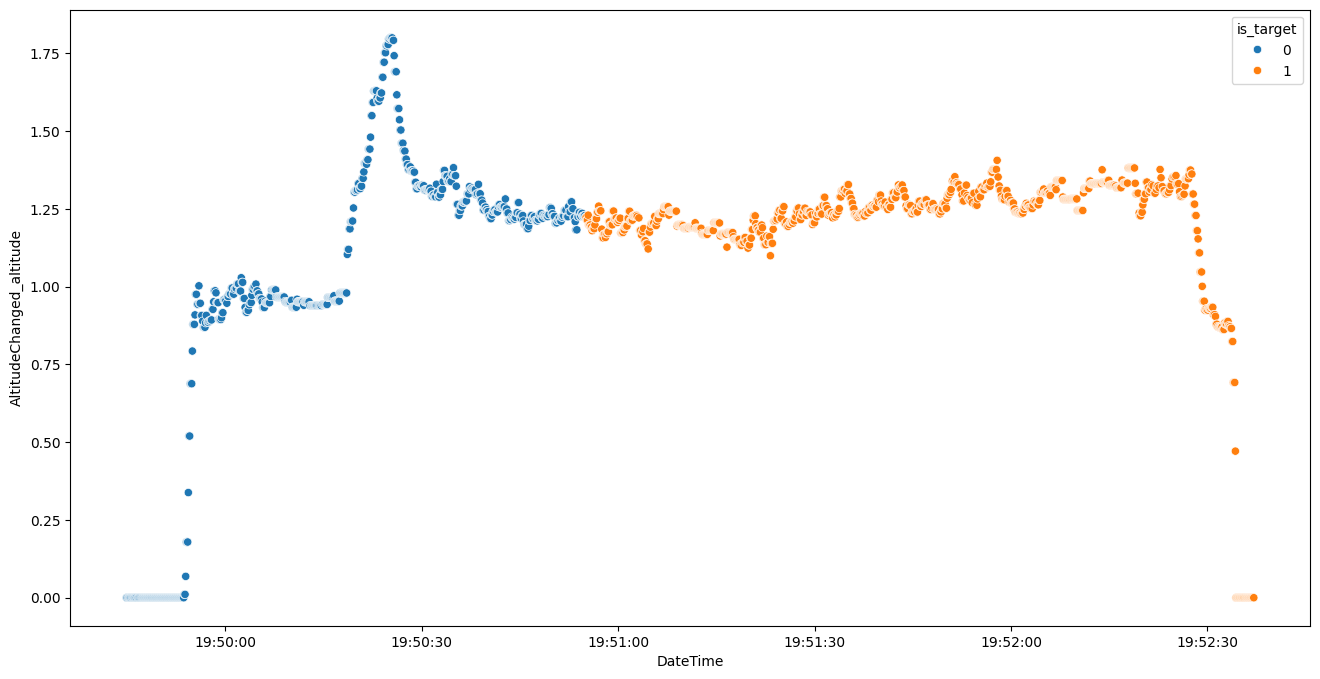

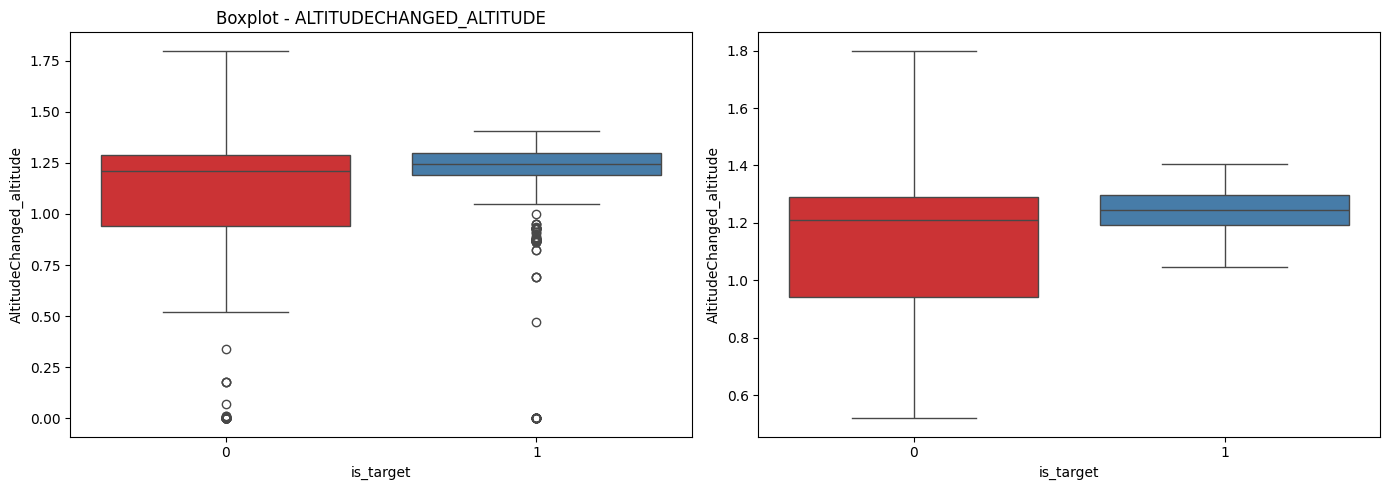

count  mean  std  min  25%  50%  75%  90%  95%  max
is_target                                                     
0         649.00  1.02 0.46 0.00 0.94 1.21 1.29 1.39 1.60 1.80
1         912.00  1.20 0.23 0.00 1.19 1.24 1.30 1.33 1.34 1.41



>> AttitudeChanged_pitch:



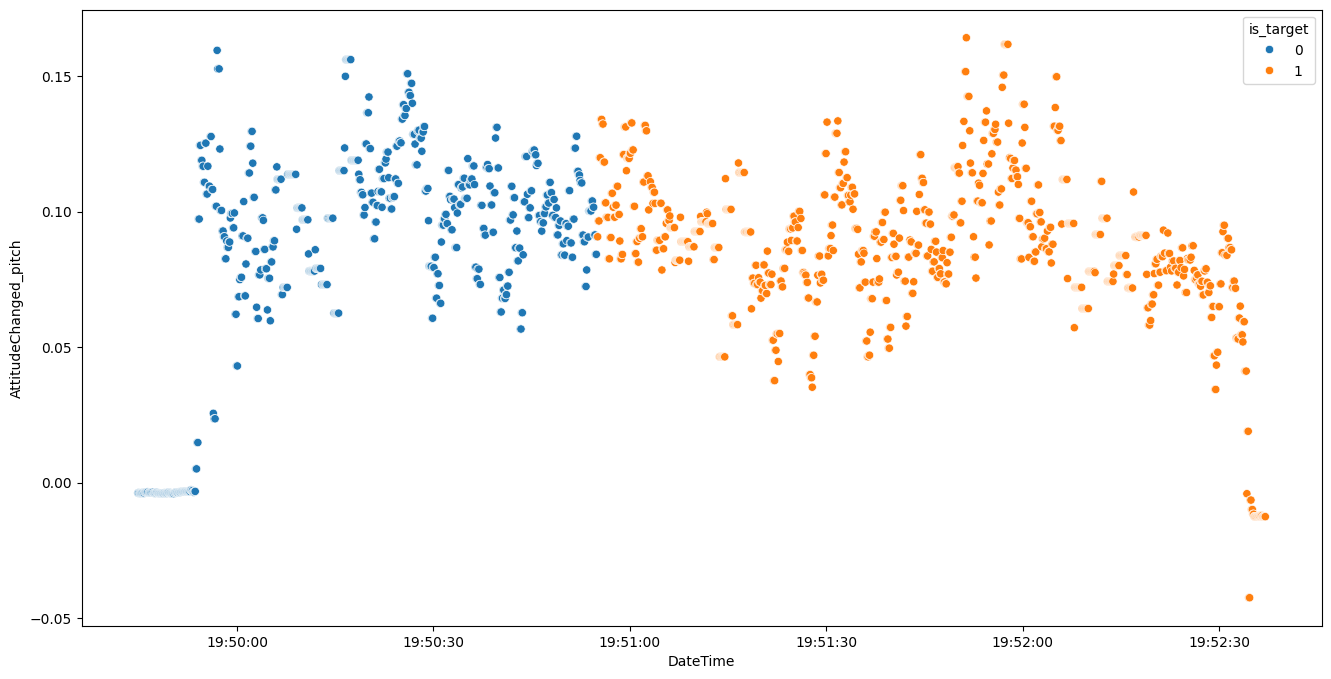

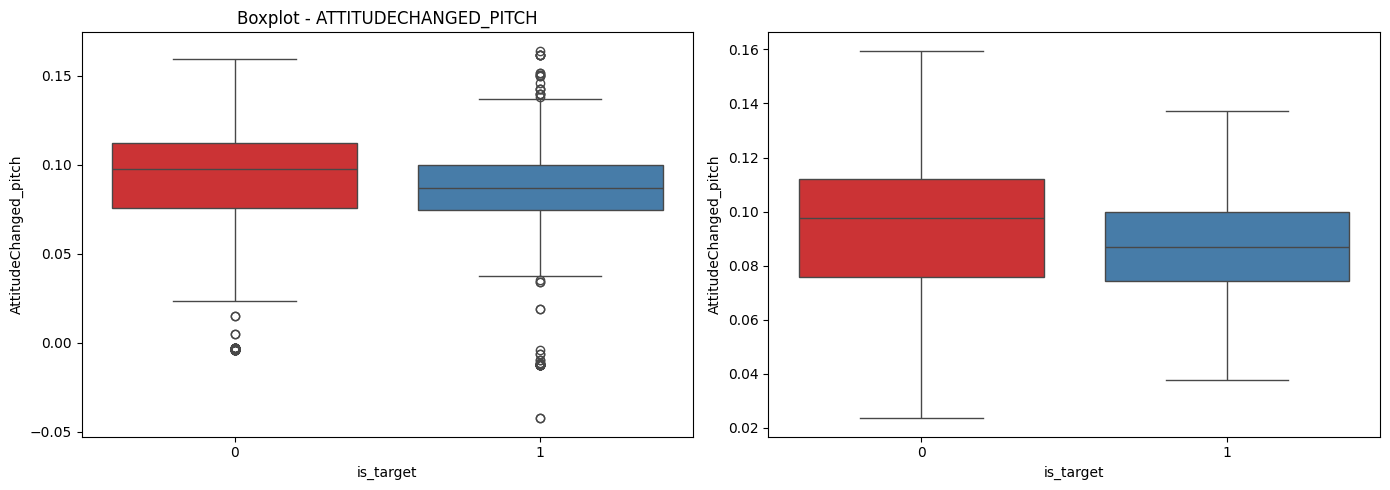

count  mean  std   min  25%  50%  75%  90%  95%  max
is_target                                                      
0         649.00  0.09 0.04 -0.00 0.08 0.10 0.11 0.12 0.13 0.16
1         912.00  0.09 0.03 -0.04 0.07 0.09 0.10 0.12 0.13 0.16



>> AttitudeChanged_roll:



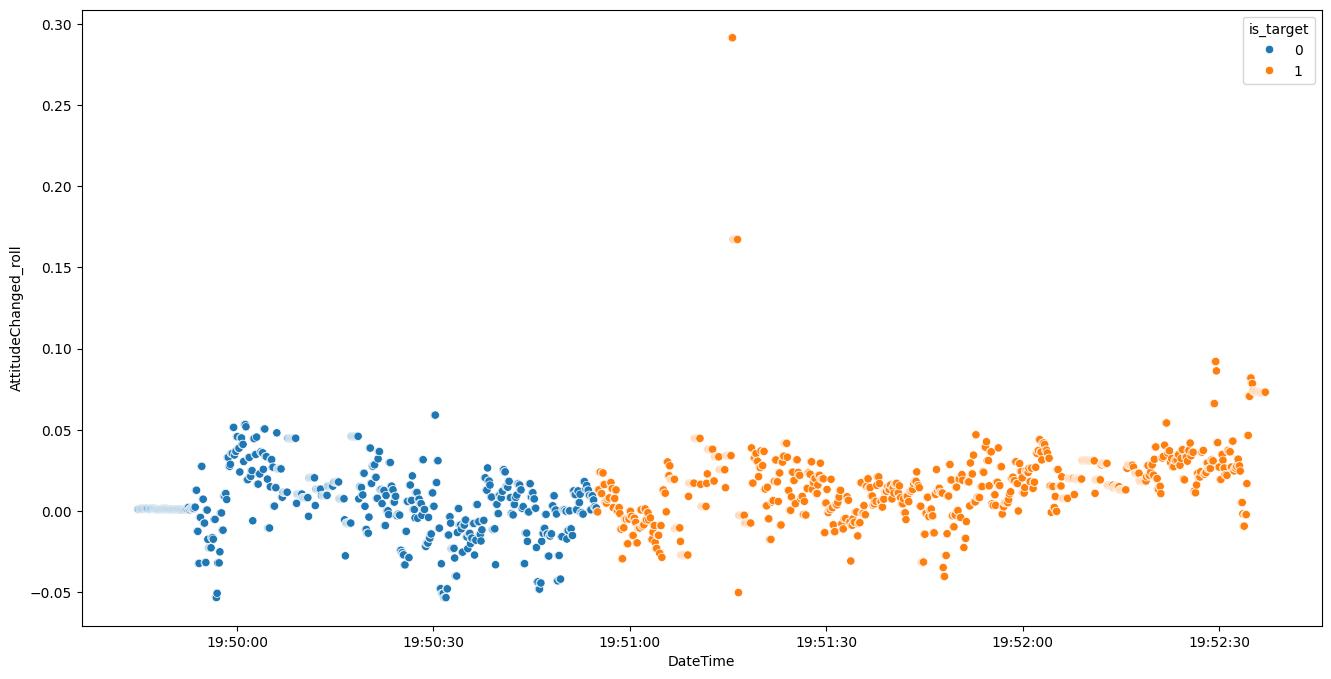

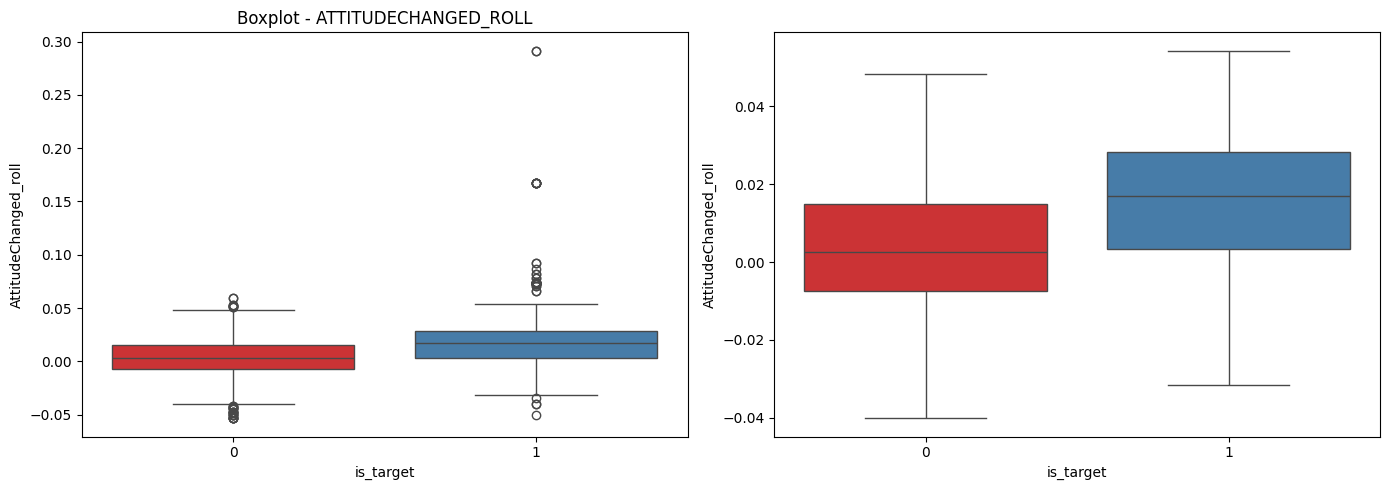

count  mean  std   min   25%  50%  75%  90%  95%  max
is_target                                                       
0         649.00  0.00 0.02 -0.05 -0.01 0.00 0.01 0.03 0.04 0.06
1         912.00  0.02 0.03 -0.05  0.00 0.02 0.03 0.04 0.04 0.29



>> AttitudeChanged_yaw:



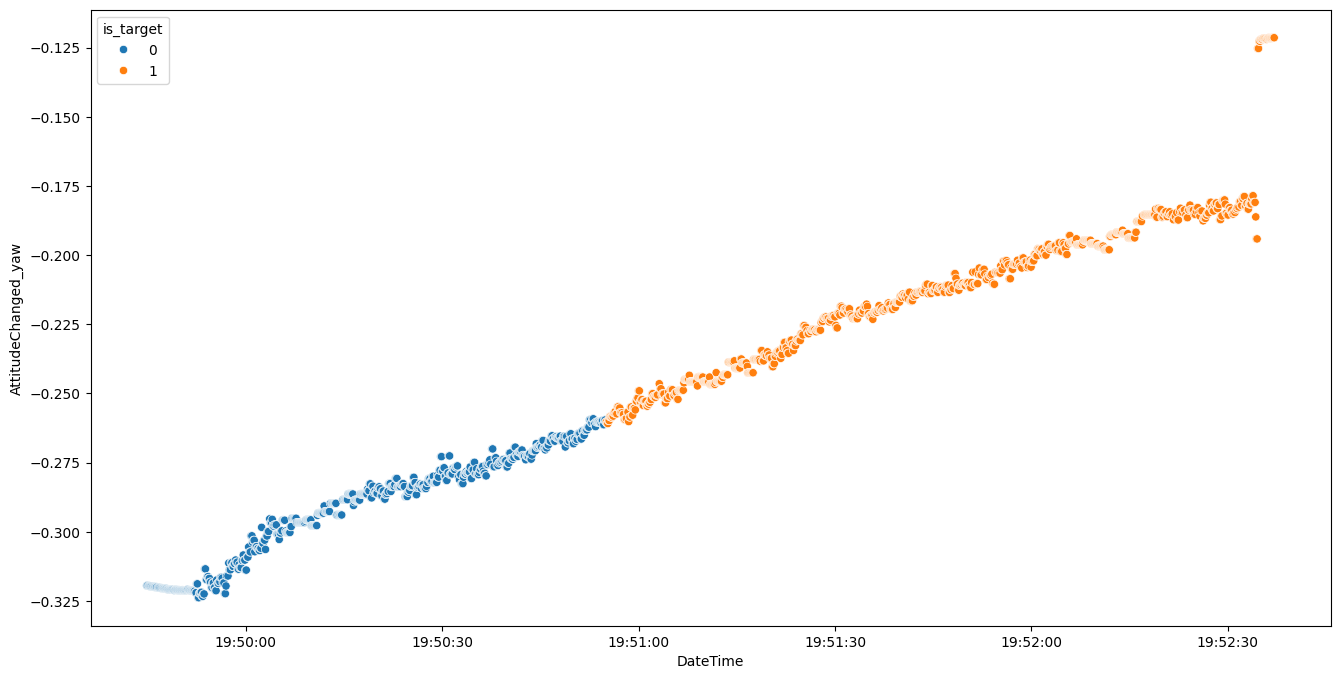

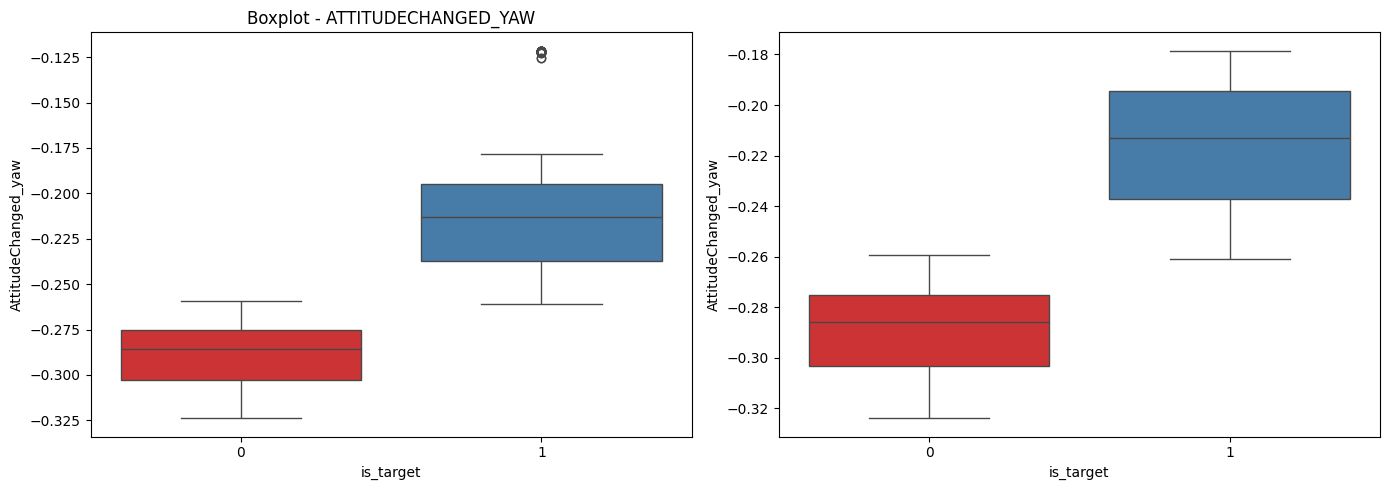

count  mean  std   min   25%   50%   75%   90%   95%   max
is_target                                                            
0         649.00 -0.29 0.02 -0.32 -0.30 -0.29 -0.28 -0.27 -0.26 -0.26
1         912.00 -0.21 0.03 -0.26 -0.24 -0.21 -0.19 -0.18 -0.18 -0.12



>> BatteryStateChanged_percent:



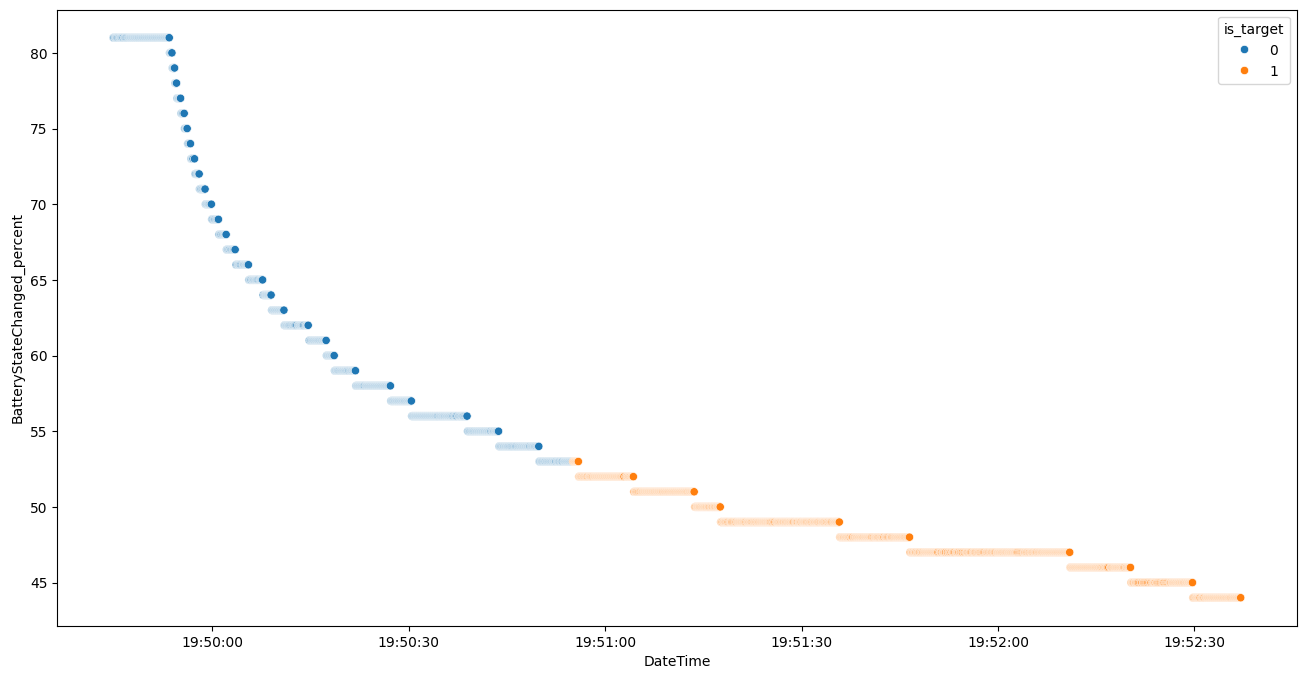

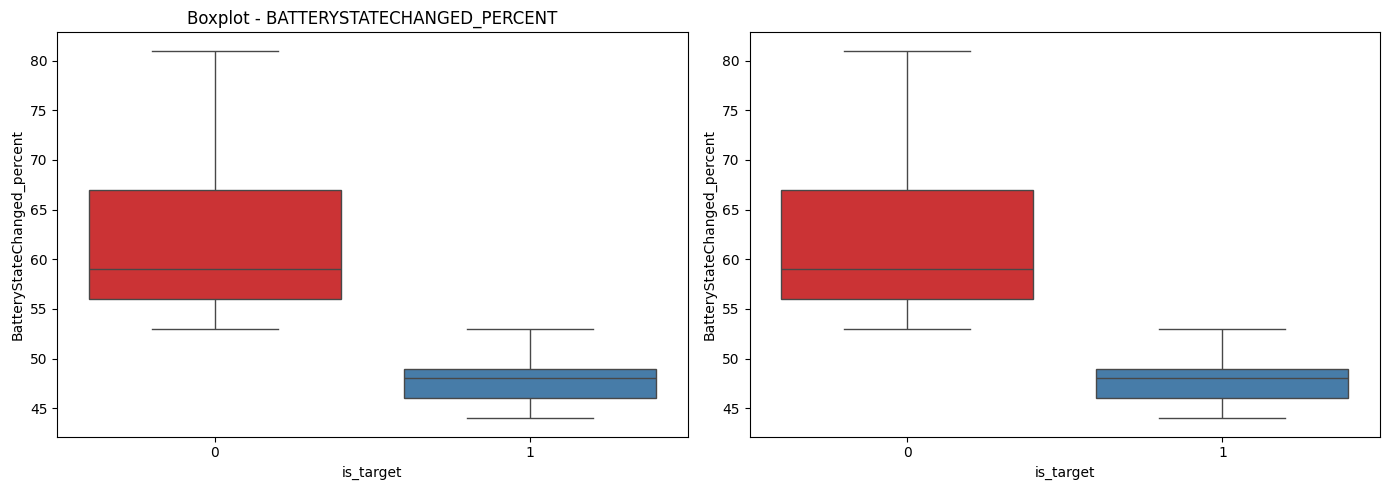

count  mean  std   min   25%   50%   75%   90%   95%   max
is_target                                                            
0         649.00 62.64 9.16 53.00 56.00 59.00 67.00 81.00 81.00 81.00
1         912.00 47.96 2.32 44.00 46.00 48.00 49.00 51.00 52.00 53.00



>> GpsLocationChanged_altitude:



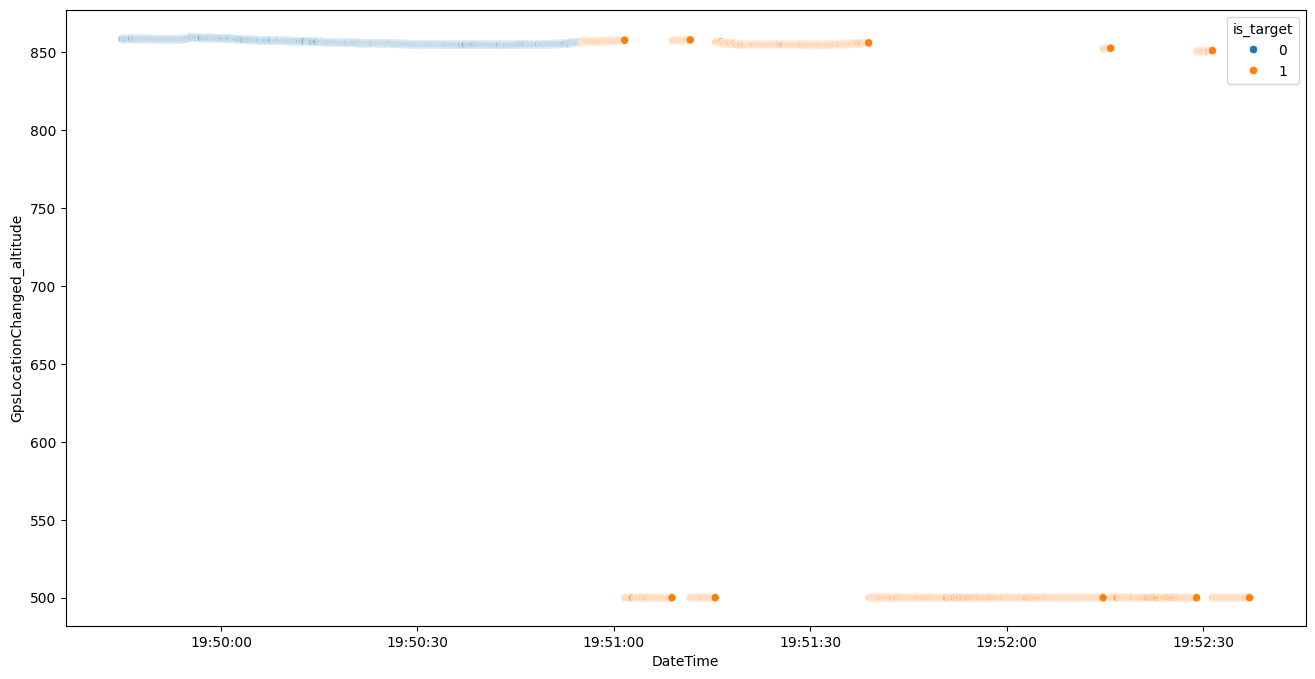

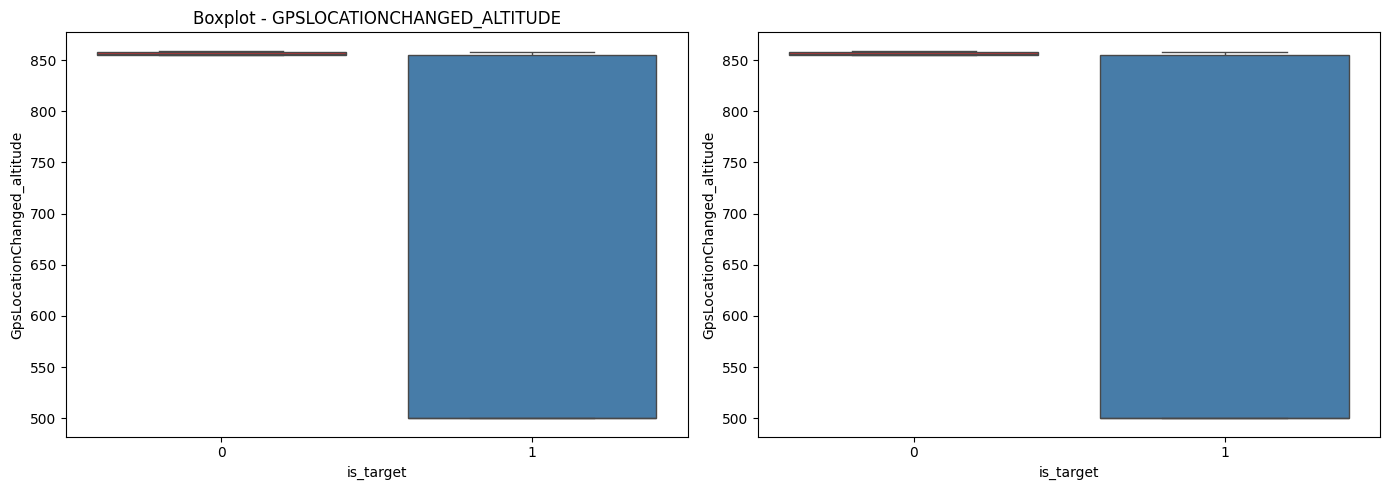

count   mean    std    min    25%    50%    75%    90%    95%  \
is_target                                                                  
0         649.00 856.33   1.52 854.50 854.80 855.90 858.10 858.50 858.90   
1         912.00 629.67 171.08 500.00 500.00 500.00 854.60 856.40 856.99   

             max  
is_target         
0         859.10  
1         857.70



>> GpsLocationChanged_altitude_accuracy:



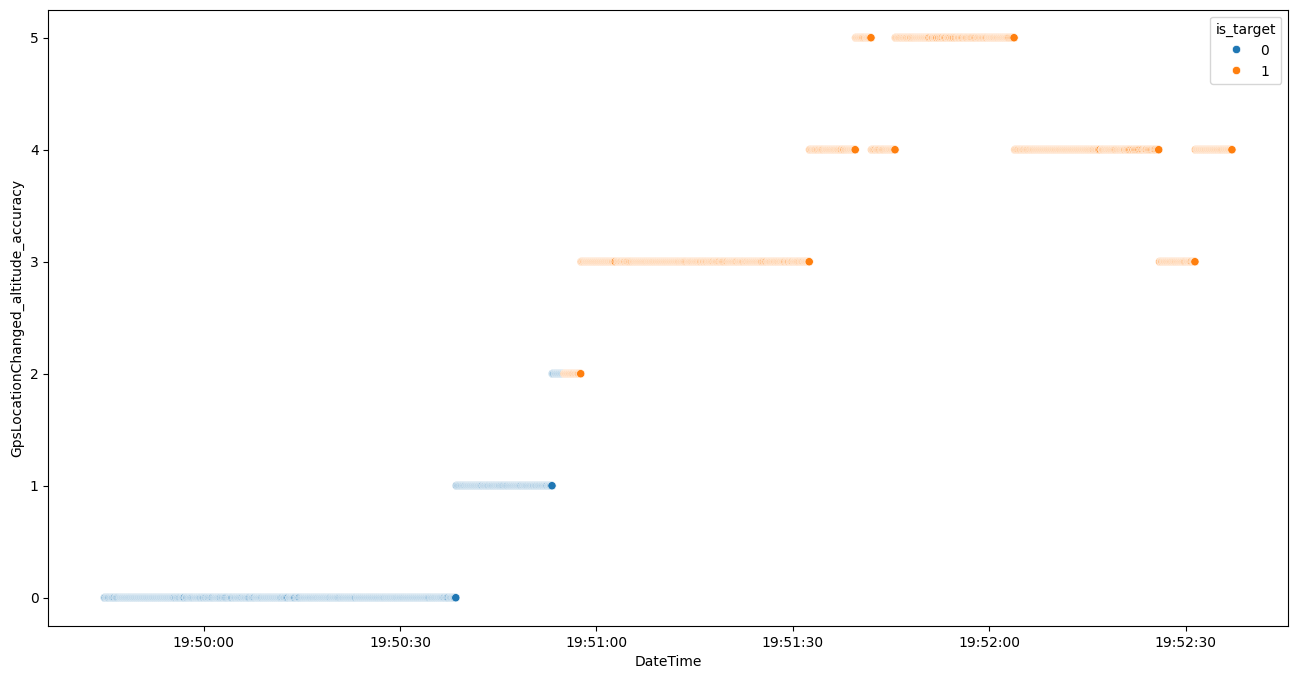

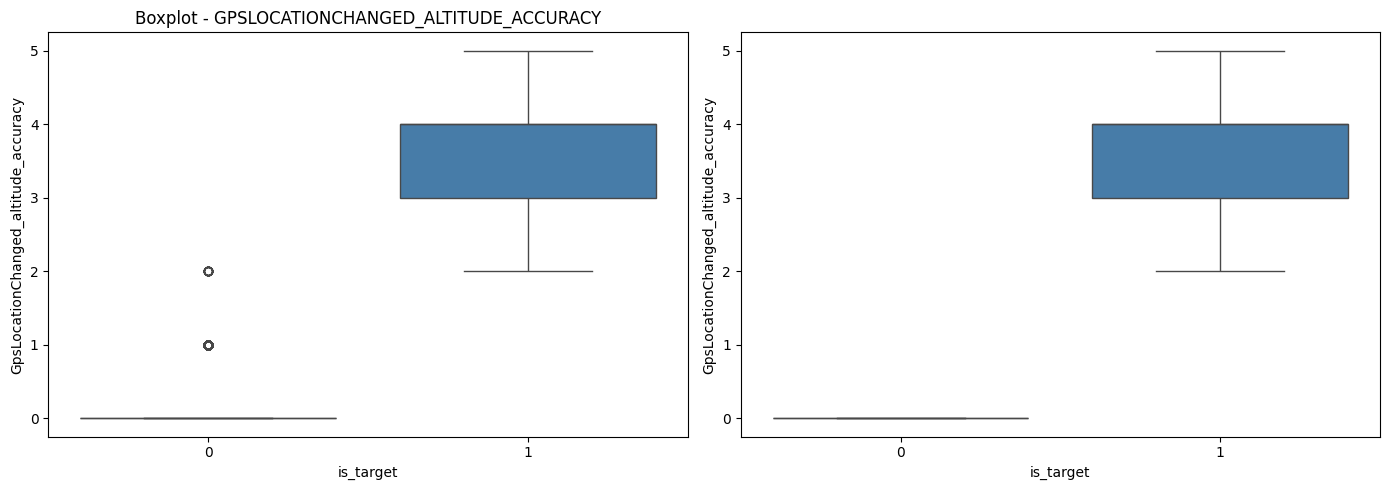

count  mean  std  min  25%  50%  75%  90%  95%  max
is_target                                                     
0         649.00  0.26 0.50 0.00 0.00 0.00 0.00 1.00 1.00 2.00
1         912.00  3.73 0.80 2.00 3.00 4.00 4.00 5.00 5.00 5.00



>> GpsLocationChanged_latitude:



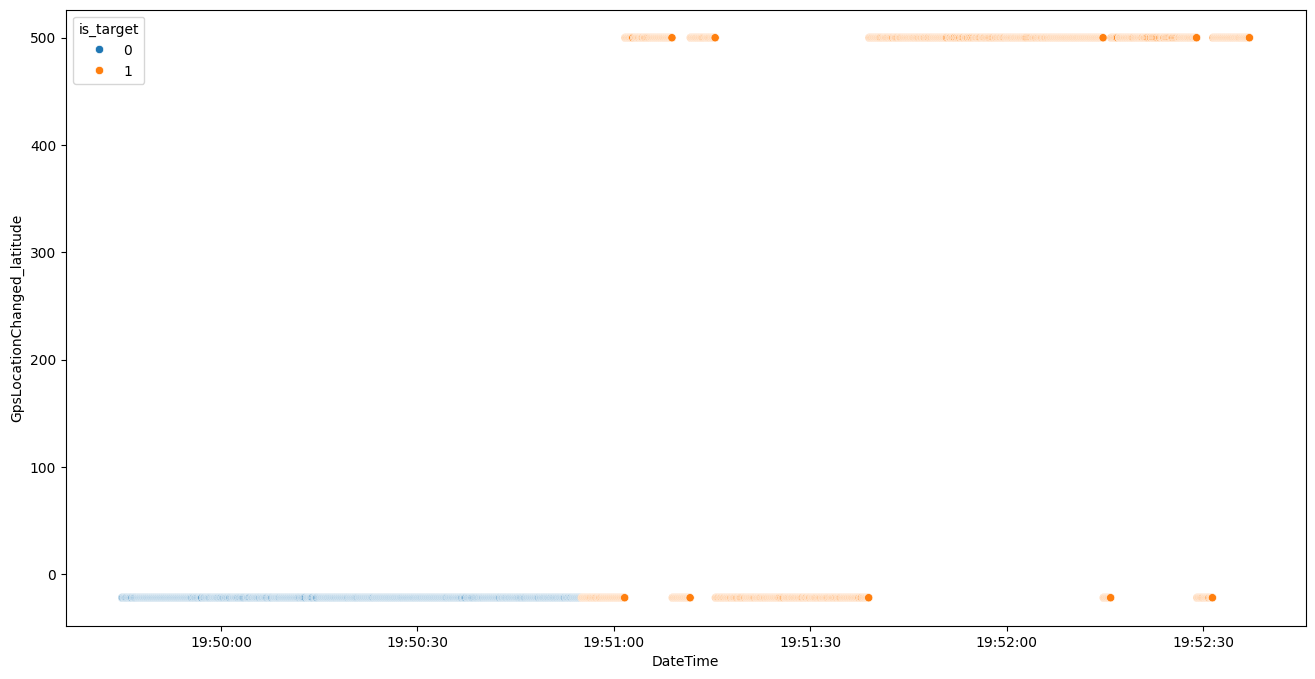

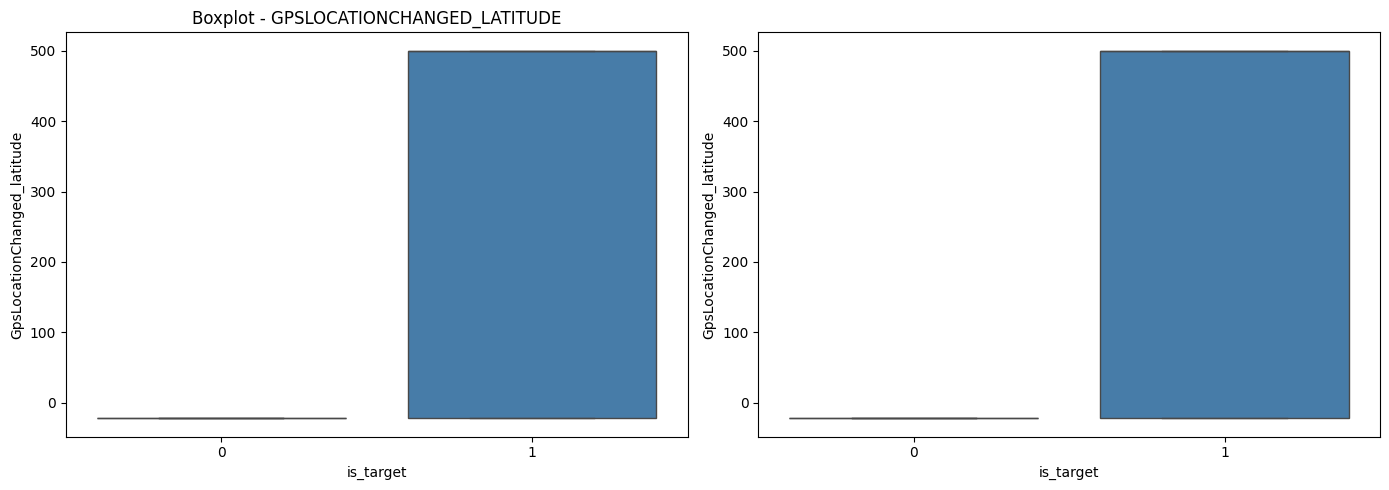

count   mean    std    min    25%    50%    75%    90%    95%  \
is_target                                                                  
0         649.00 -22.00   0.00 -22.00 -22.00 -22.00 -22.00 -22.00 -22.00   
1         912.00 309.40 251.47 -22.00 -22.00 500.00 500.00 500.00 500.00   

             max  
is_target         
0         -22.00  
1         500.00



>> GpsLocationChanged_latitude_accuracy:



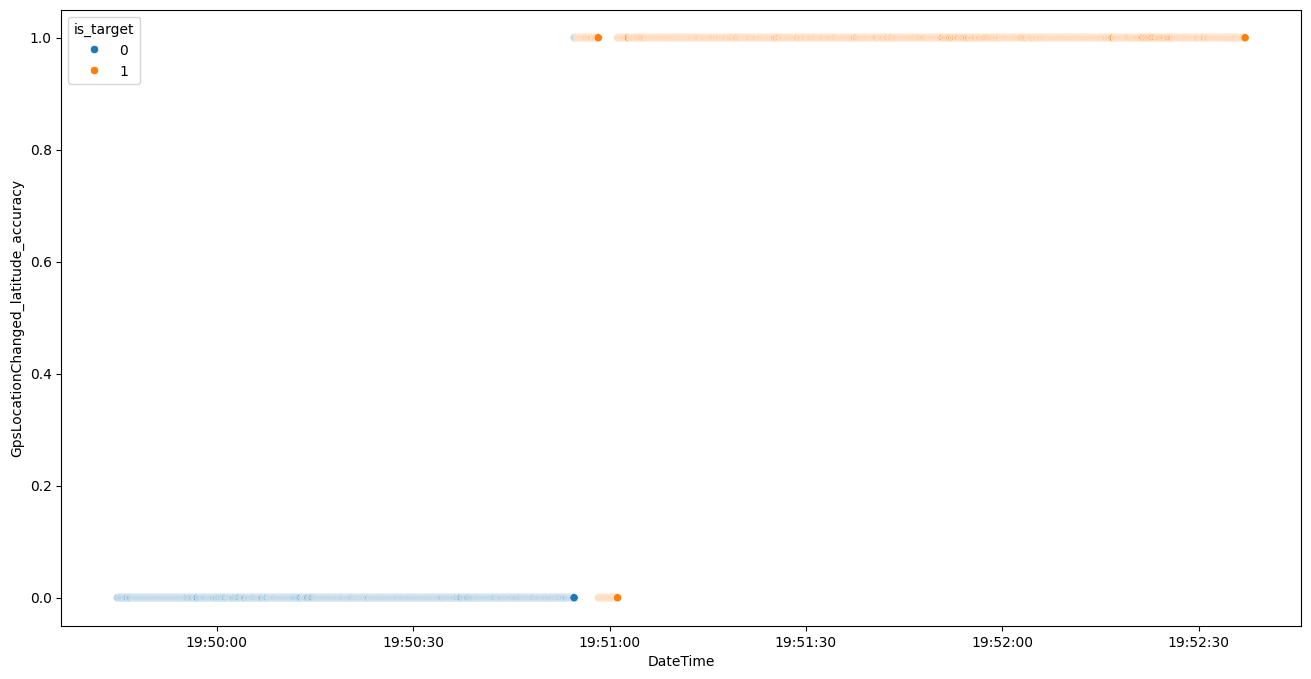

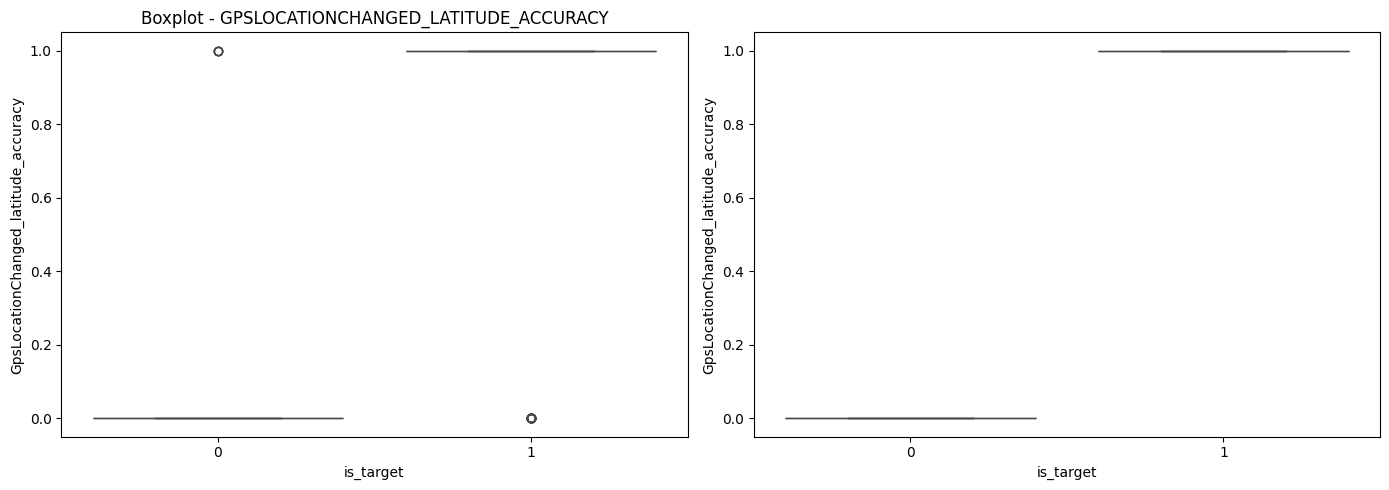

count  mean  std  min  25%  50%  75%  90%  95%  max
is_target                                                     
0         649.00  0.01 0.08 0.00 0.00 0.00 0.00 0.00 0.00 1.00
1         912.00  0.97 0.18 0.00 1.00 1.00 1.00 1.00 1.00 1.00



>> GpsLocationChanged_longitude:



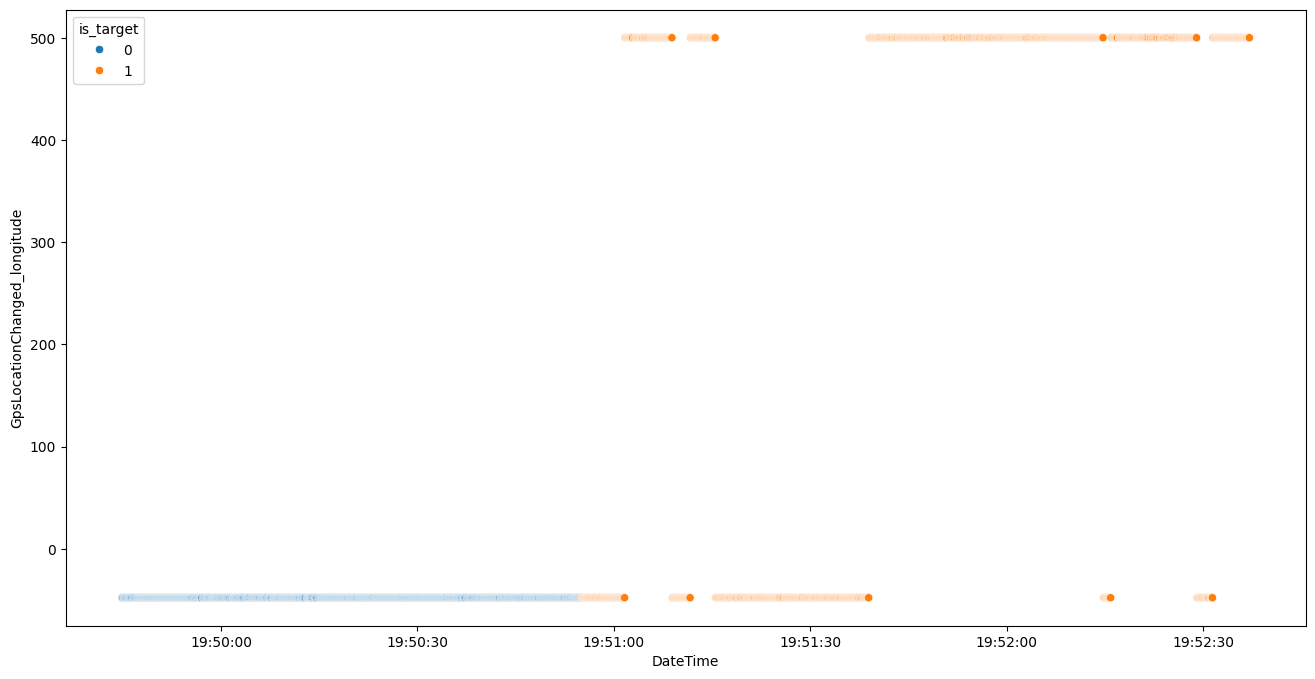

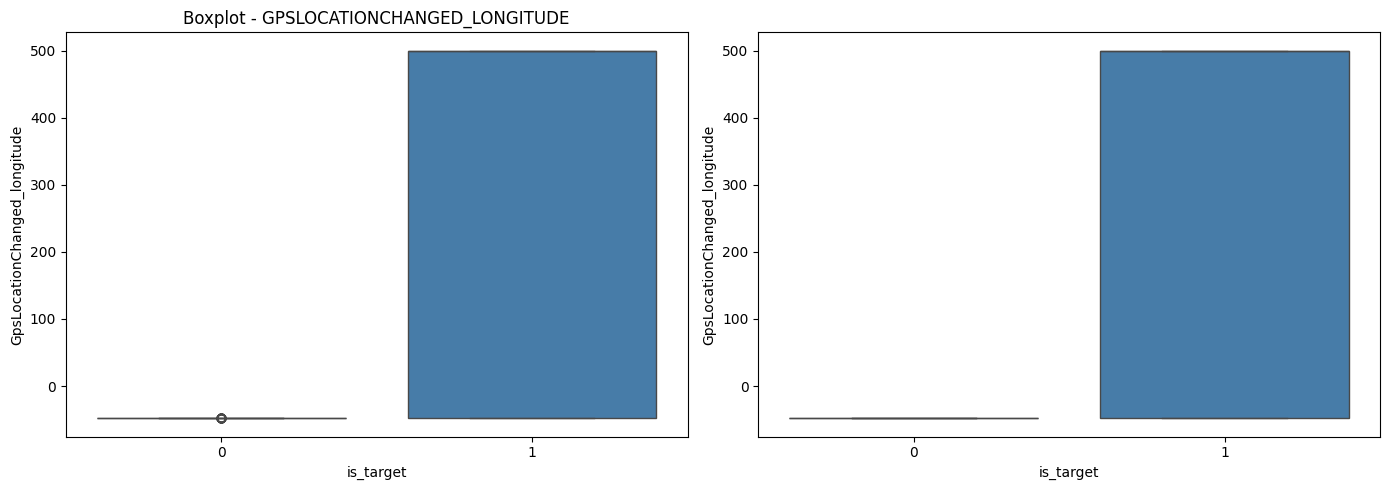

count   mean    std    min    25%    50%    75%    90%    95%  \
is_target                                                                  
0         649.00 -47.93   0.00 -47.93 -47.93 -47.93 -47.93 -47.93 -47.93   
1         912.00 299.93 263.96 -47.93 -47.93 500.00 500.00 500.00 500.00   

             max  
is_target         
0         -47.93  
1         500.00



>> GpsLocationChanged_longitude_accuracy:



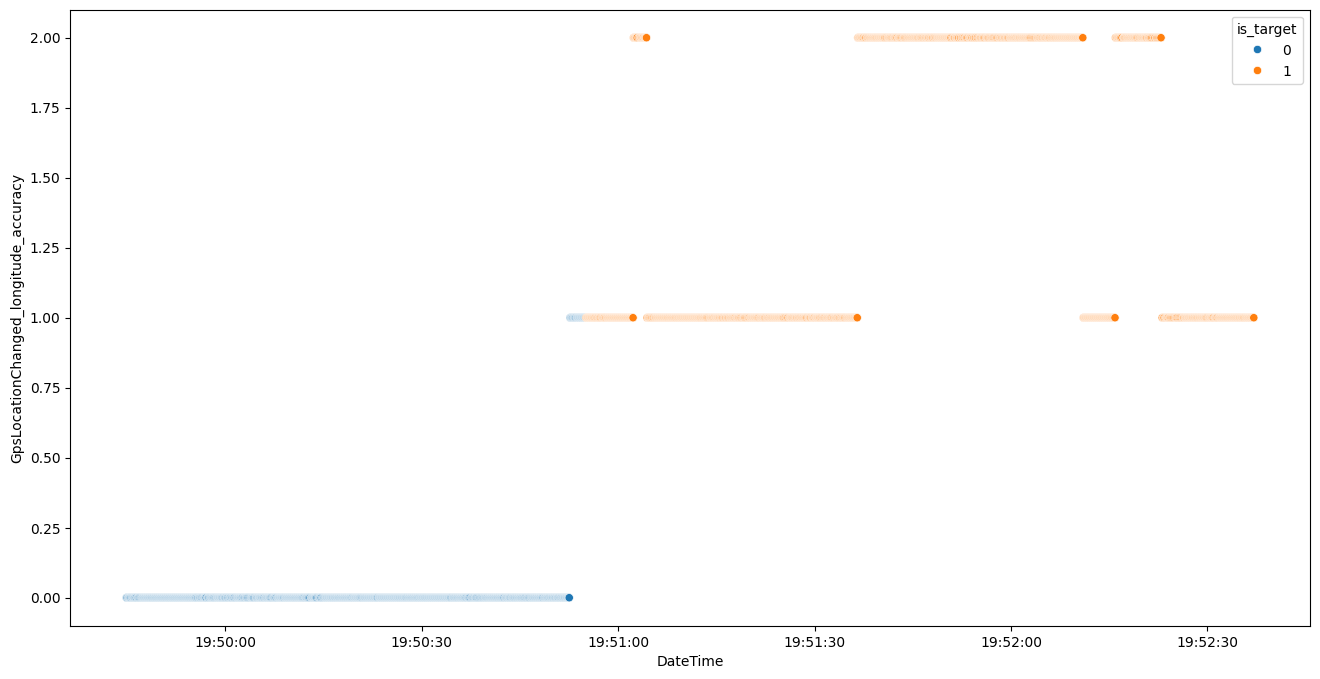

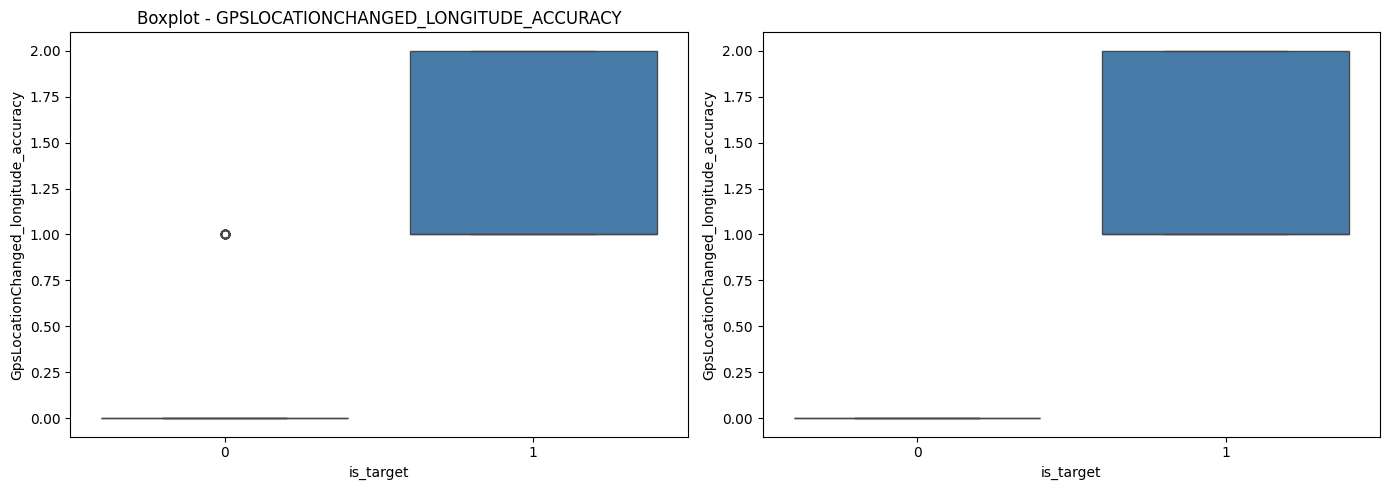

count  mean  std  min  25%  50%  75%  90%  95%  max
is_target                                                     
0         649.00  0.04 0.19 0.00 0.00 0.00 0.00 0.00 0.00 1.00
1         912.00  1.41 0.49 1.00 1.00 1.00 2.00 2.00 2.00 2.00



>> HomeChanged_altitude:



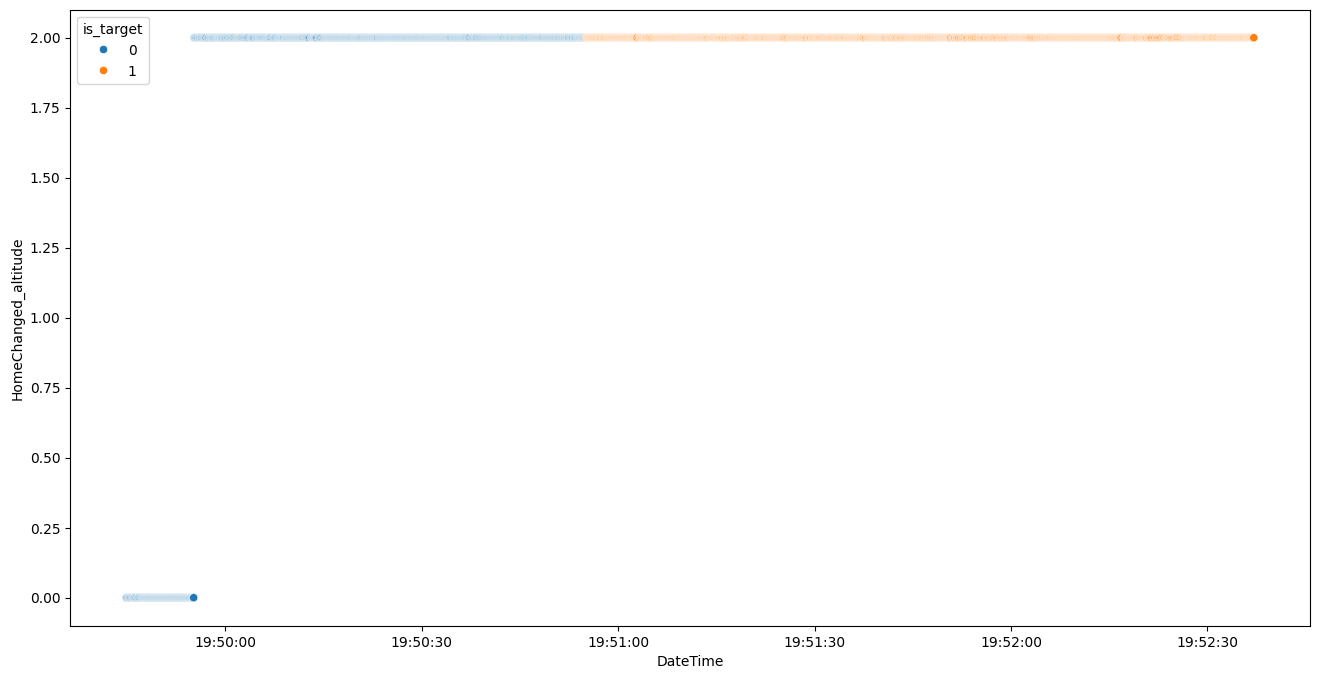

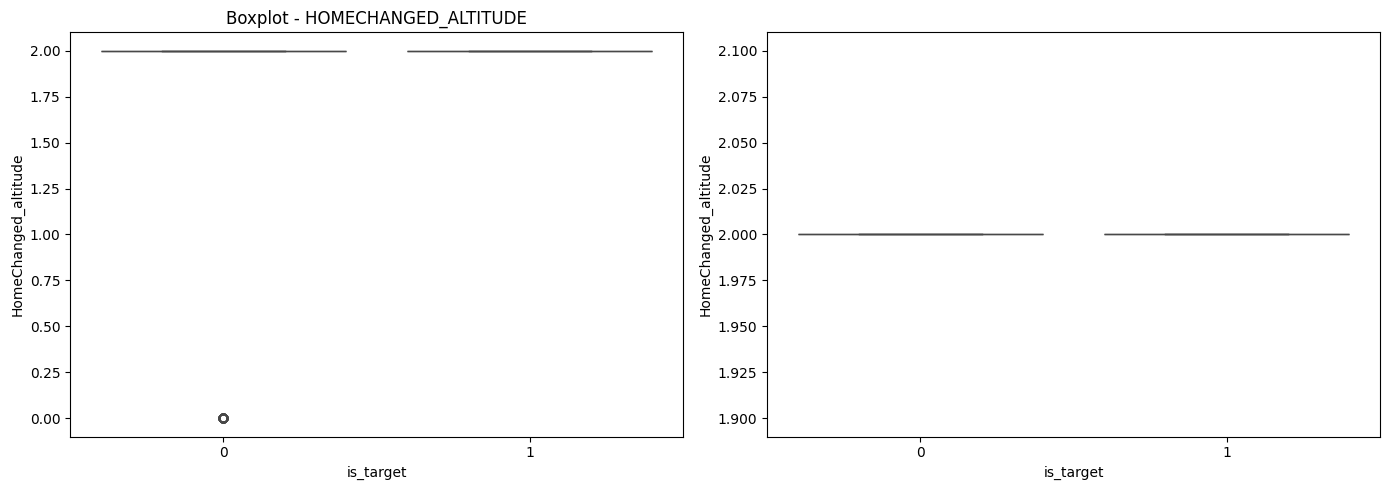

count  mean  std  min  25%  50%  75%  90%  95%  max
is_target                                                     
0         649.00  1.70 0.72 0.00 2.00 2.00 2.00 2.00 2.00 2.00
1         912.00  2.00 0.00 2.00 2.00 2.00 2.00 2.00 2.00 2.00



>> HomeChanged_latitude:



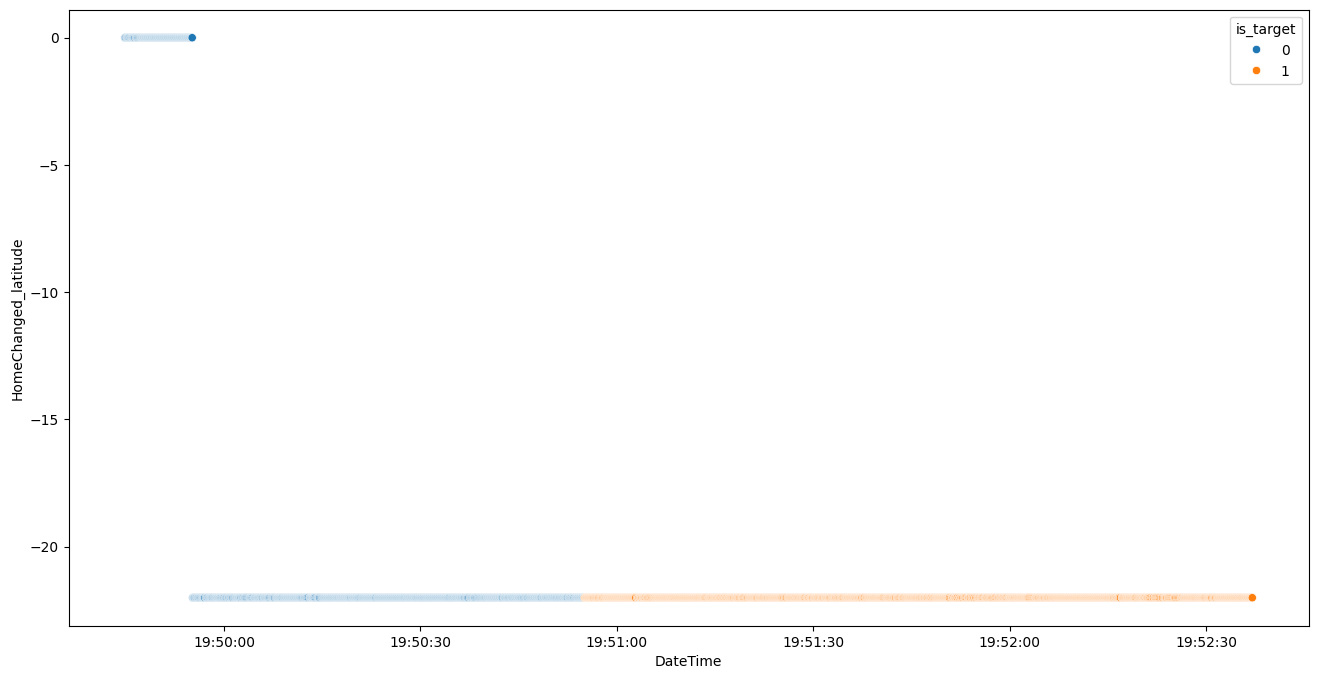

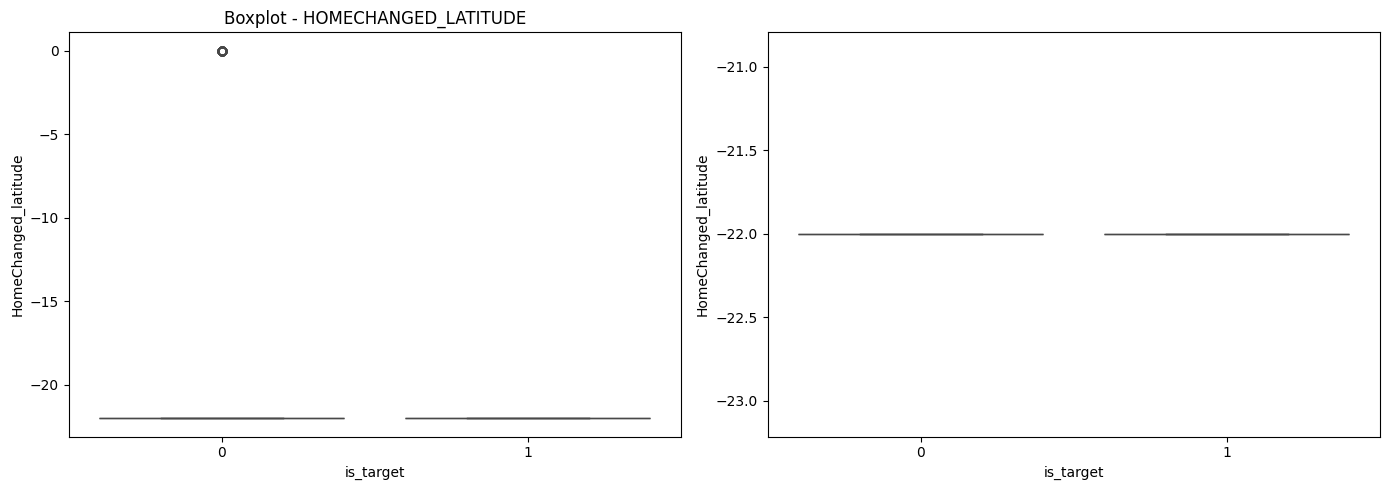

count   mean  std    min    25%    50%    75%    90%    95%    max
is_target                                                                    
0         649.00 -18.68 7.88 -22.00 -22.00 -22.00 -22.00   0.00   0.00   0.00
1         912.00 -22.00 0.00 -22.00 -22.00 -22.00 -22.00 -22.00 -22.00 -22.00



>> HomeChanged_longitude:



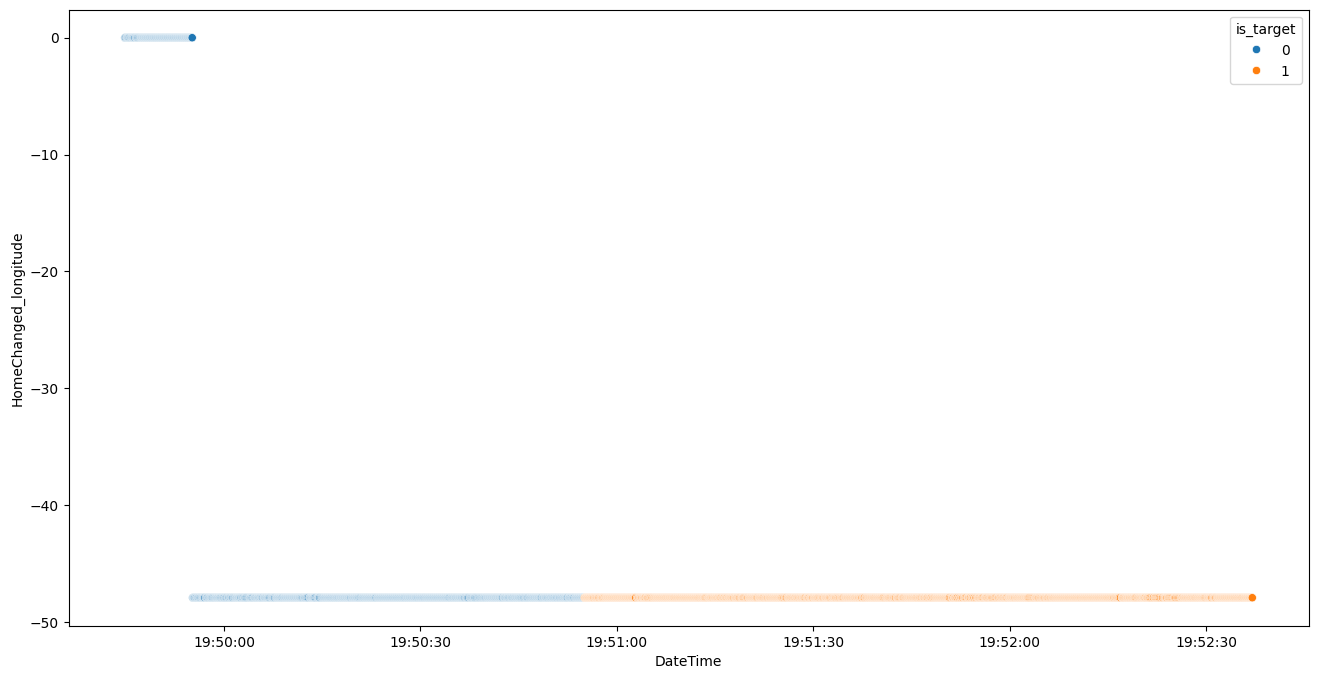

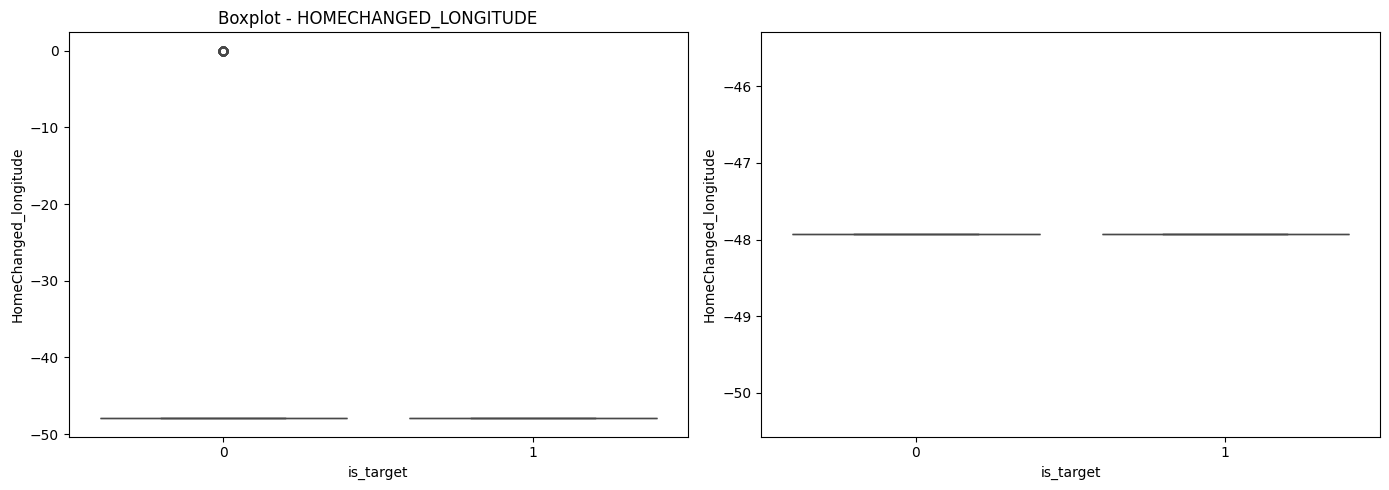

count   mean   std    min    25%    50%    75%    90%    95%    max
is_target                                                                     
0         649.00 -40.69 17.18 -47.93 -47.93 -47.93 -47.93   0.00   0.00   0.00
1         912.00 -47.93  0.00 -47.93 -47.93 -47.93 -47.93 -47.93 -47.93 -47.93



>> SpeedChanged_speedX:



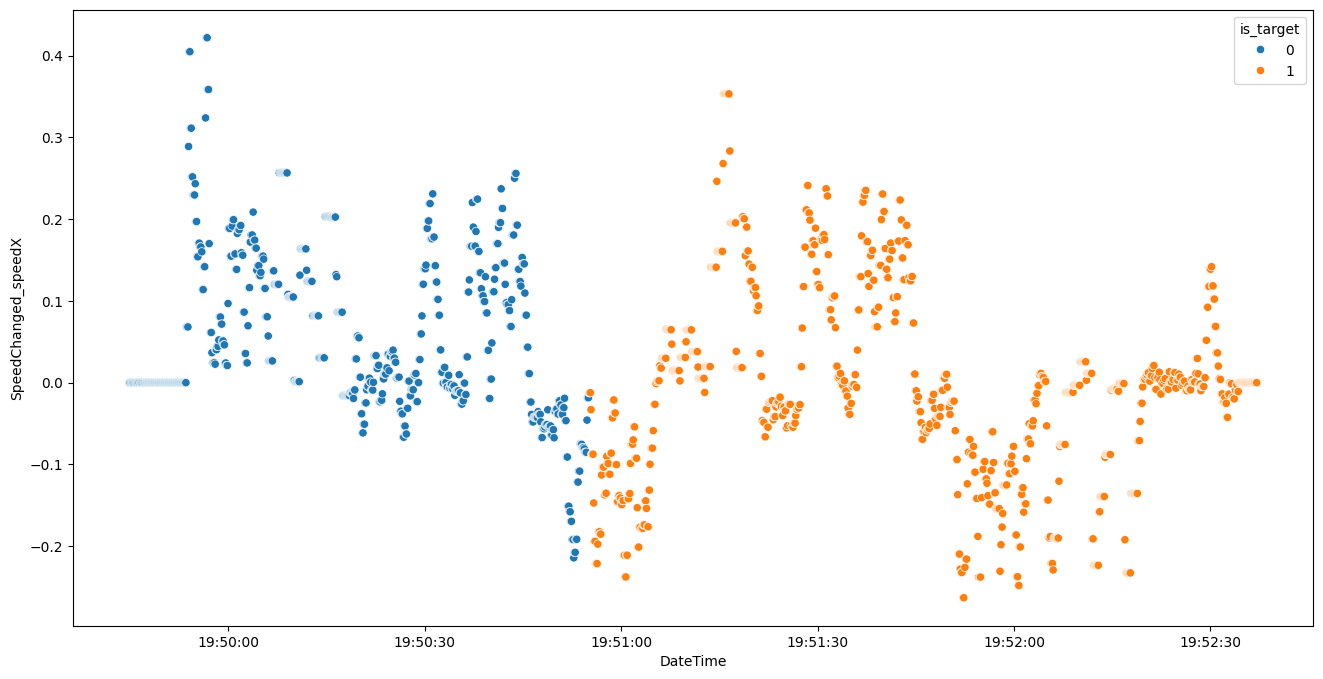

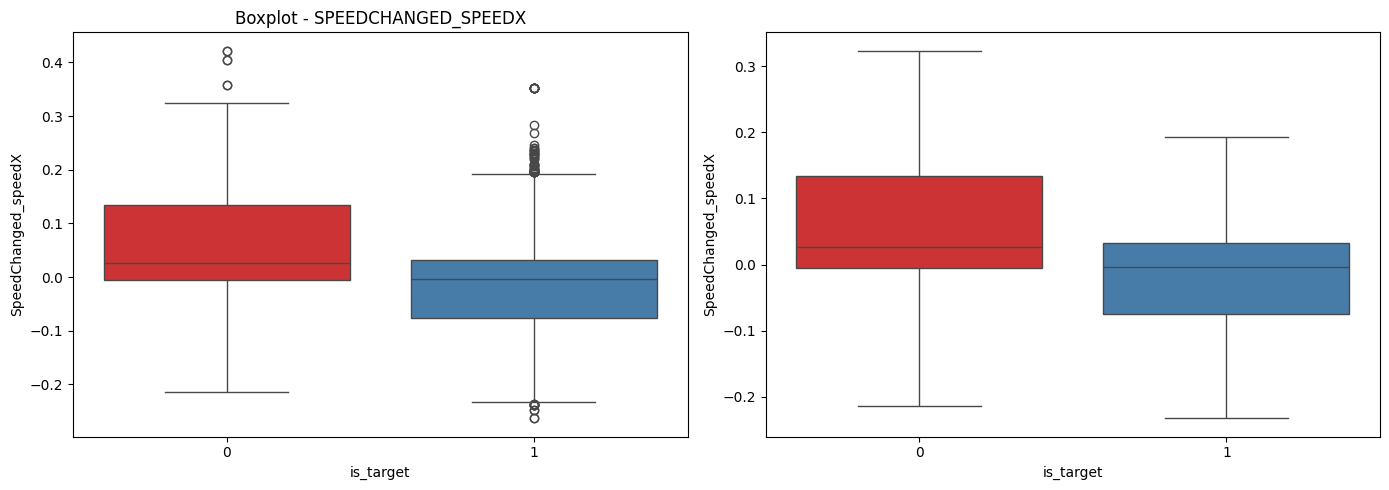

count  mean  std   min   25%   50%  75%  90%  95%  max
is_target                                                        
0         649.00  0.06 0.10 -0.21 -0.01  0.03 0.13 0.19 0.23 0.42
1         912.00 -0.01 0.11 -0.26 -0.08 -0.00 0.03 0.16 0.20 0.35



>> SpeedChanged_speedY:



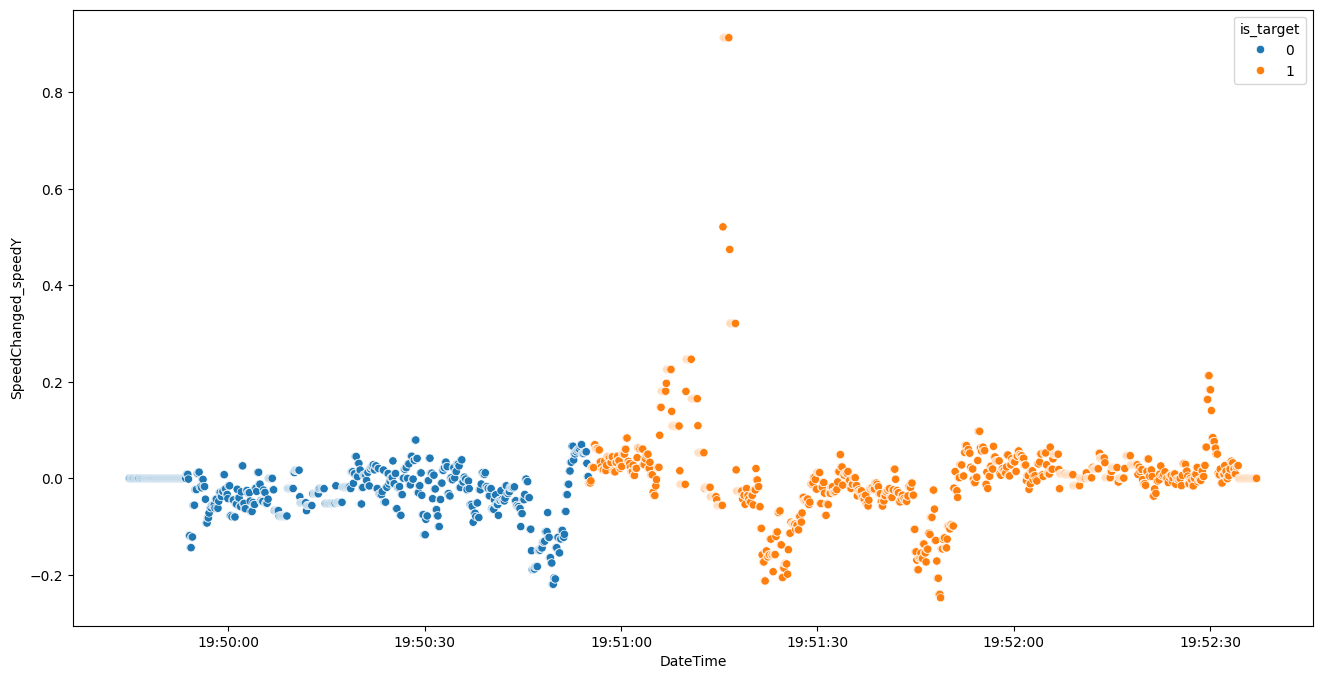

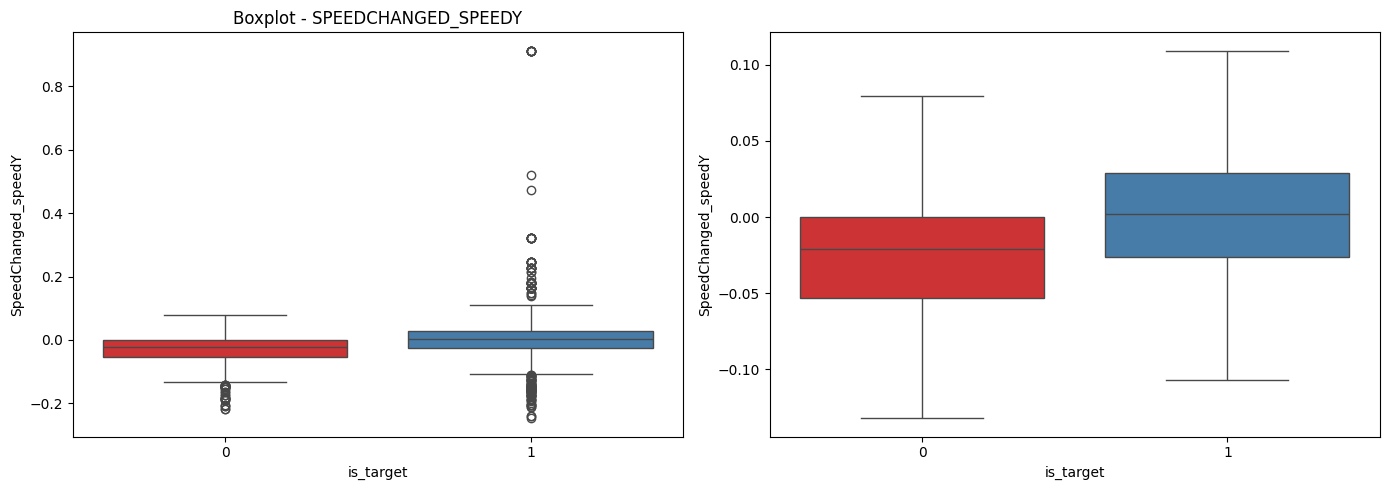

count  mean  std   min   25%   50%  75%  90%  95%  max
is_target                                                        
0         649.00 -0.03 0.05 -0.22 -0.05 -0.02 0.00 0.02 0.04 0.08
1         912.00  0.01 0.12 -0.25 -0.03  0.00 0.03 0.06 0.17 0.91



>> SpeedChanged_speedZ:



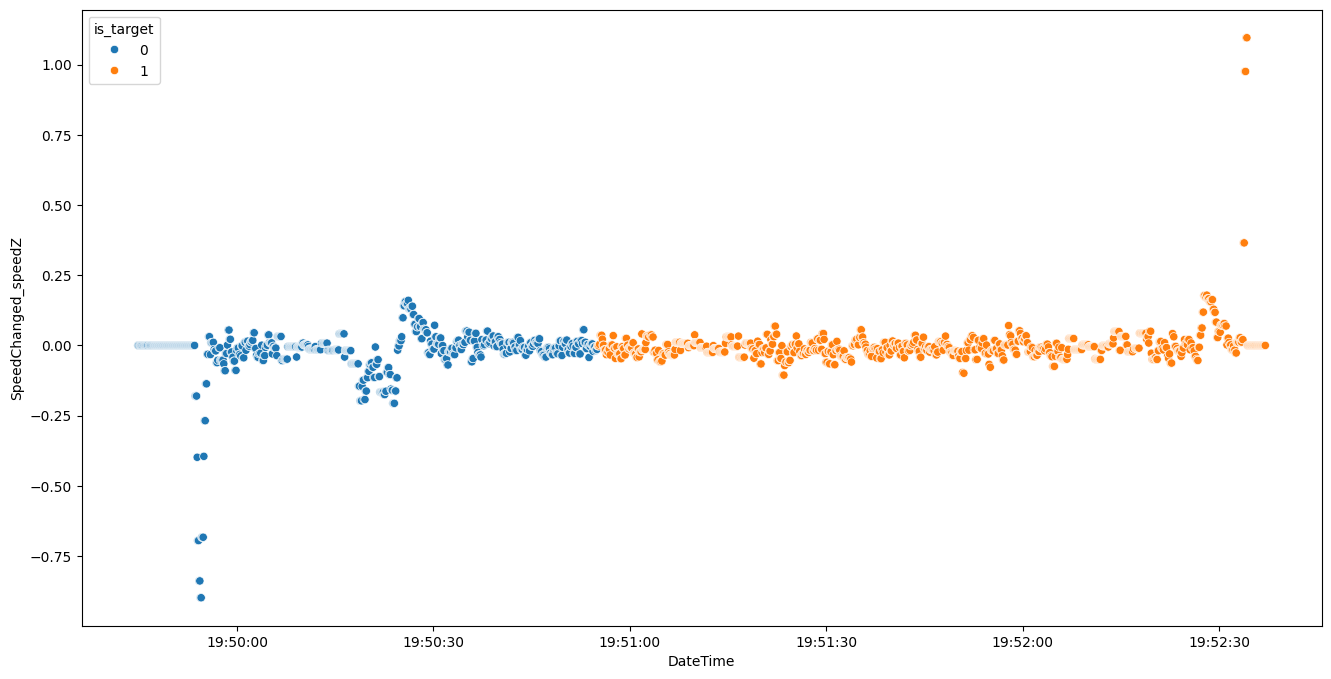

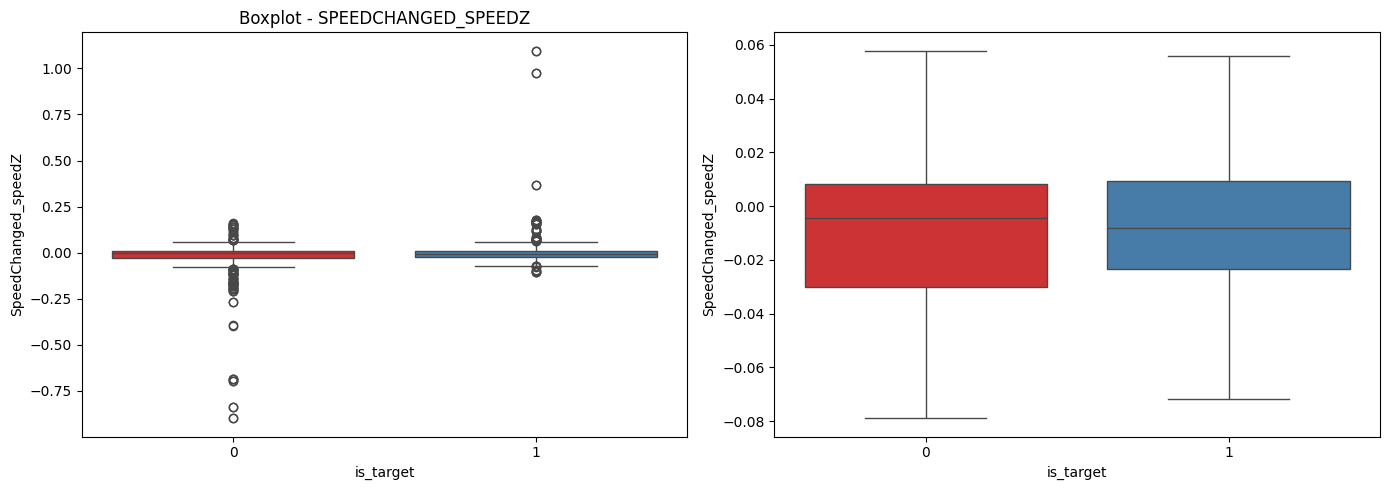

count  mean  std   min   25%   50%  75%  90%  95%  max
is_target                                                        
0         649.00 -0.03 0.11 -0.90 -0.03 -0.00 0.01 0.03 0.06 0.16
1         912.00  0.00 0.08 -0.11 -0.02 -0.01 0.01 0.03 0.05 1.10



>> WifiSignalChanged_rssi:



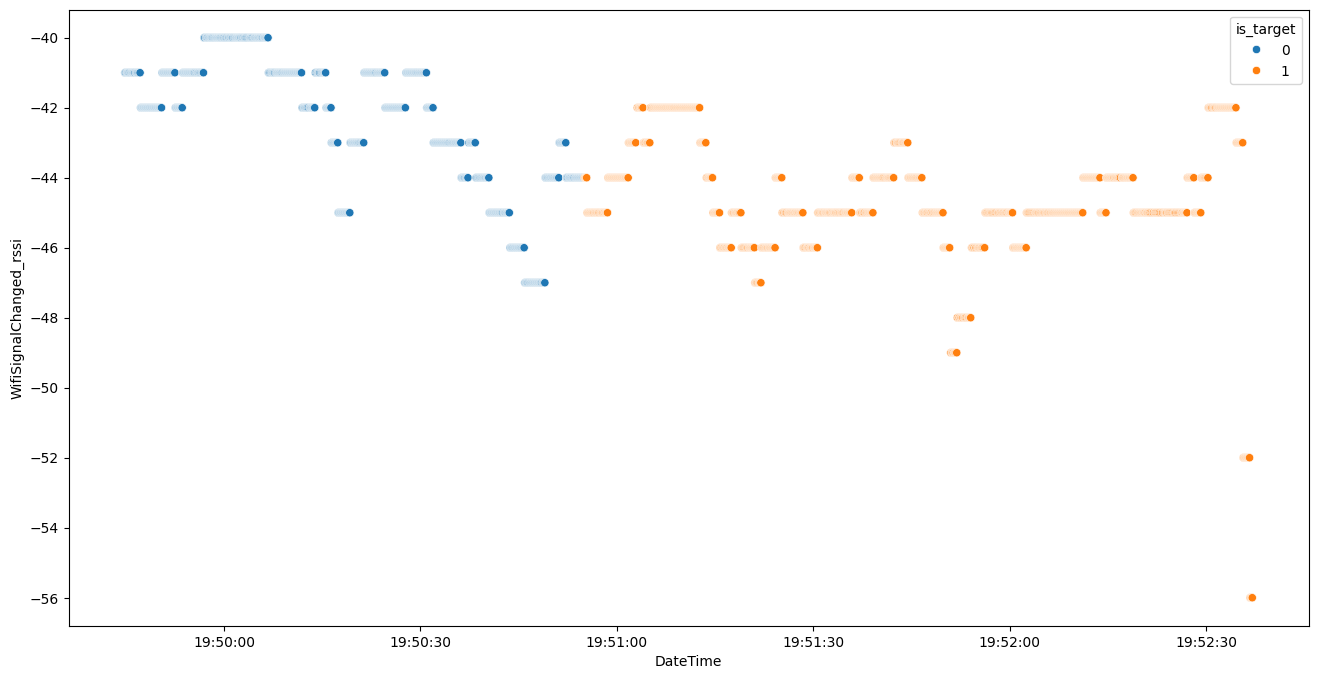

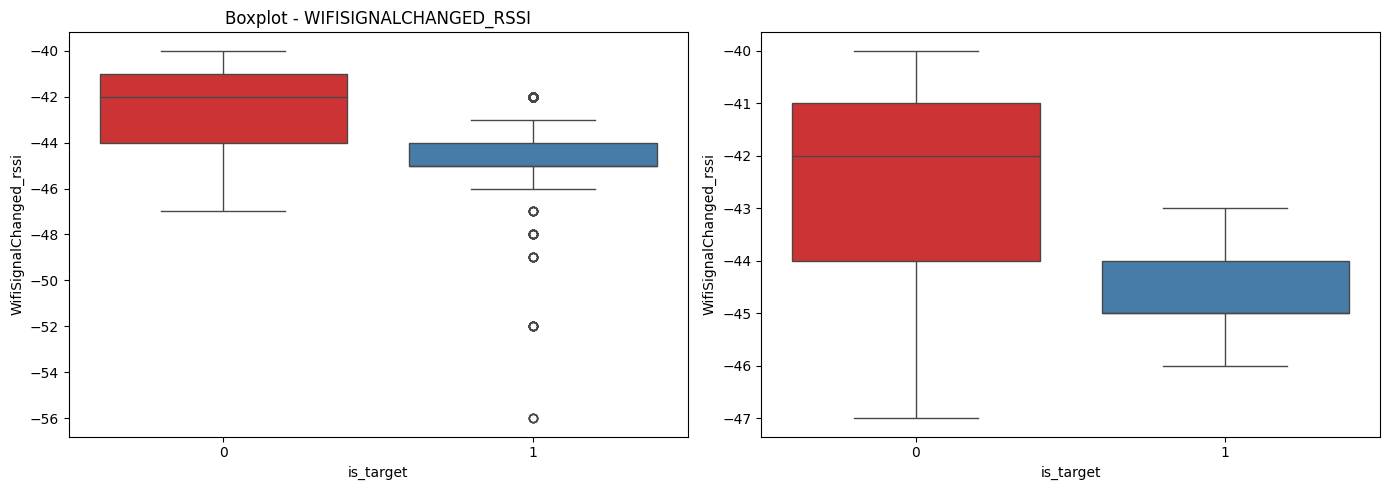

count   mean  std    min    25%    50%    75%    90%    95%    max
is_target                                                                    
0         649.00 -42.38 1.89 -47.00 -44.00 -42.00 -41.00 -40.00 -40.00 -40.00
1         912.00 -44.63 1.75 -56.00 -45.00 -45.00 -44.00 -42.00 -42.00 -42.00



>> moveByEnd_dPsi:



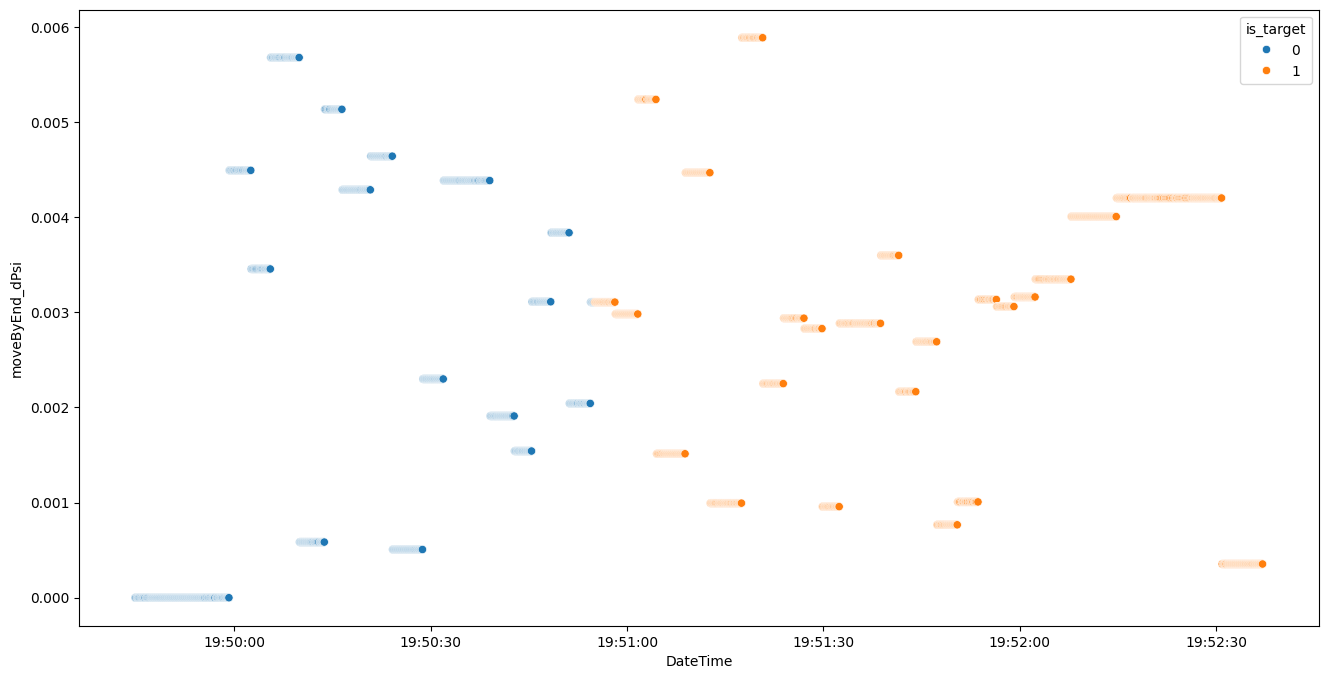

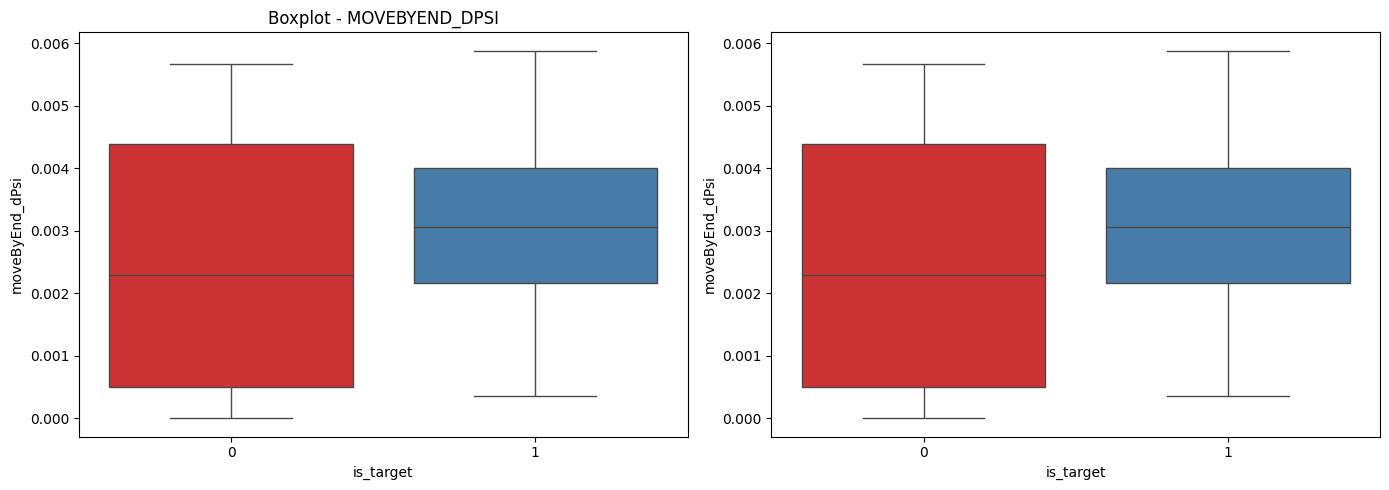

count  mean  std  min  25%  50%  75%  90%  95%  max
is_target                                                     
0         649.00  0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.01 0.01
1         912.00  0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.01 0.01



>> moveByEnd_dX:



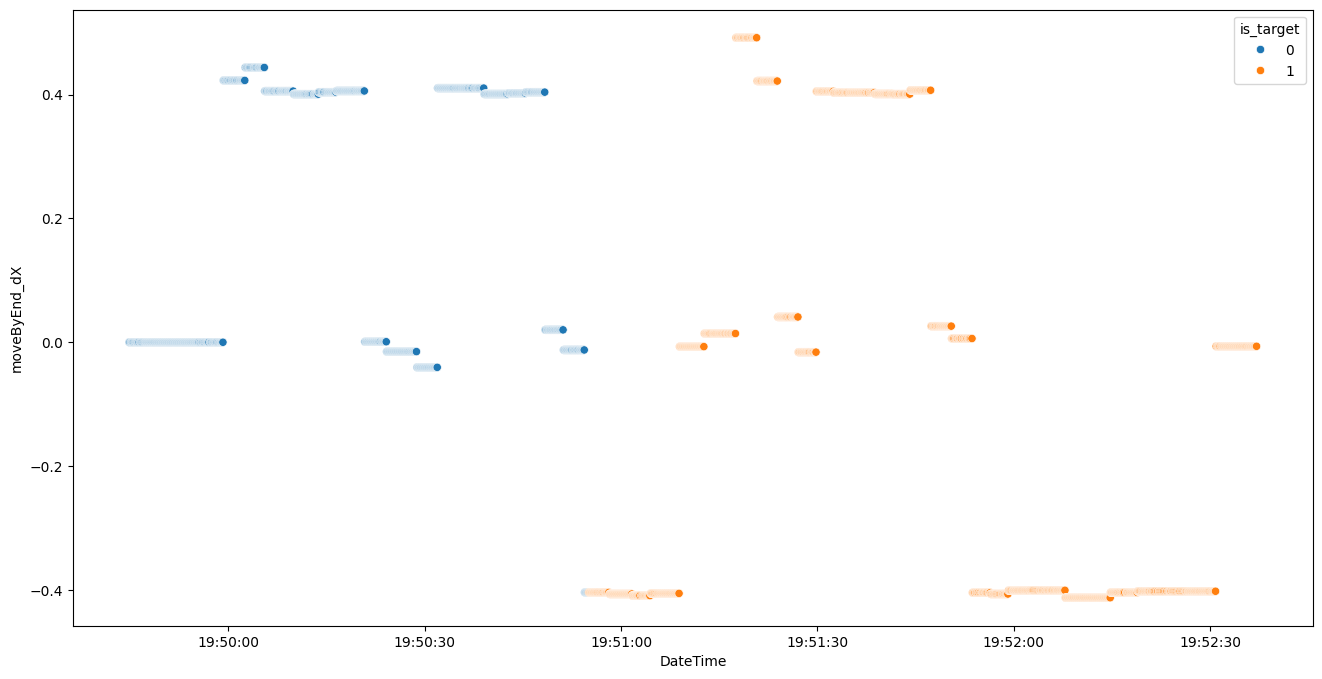

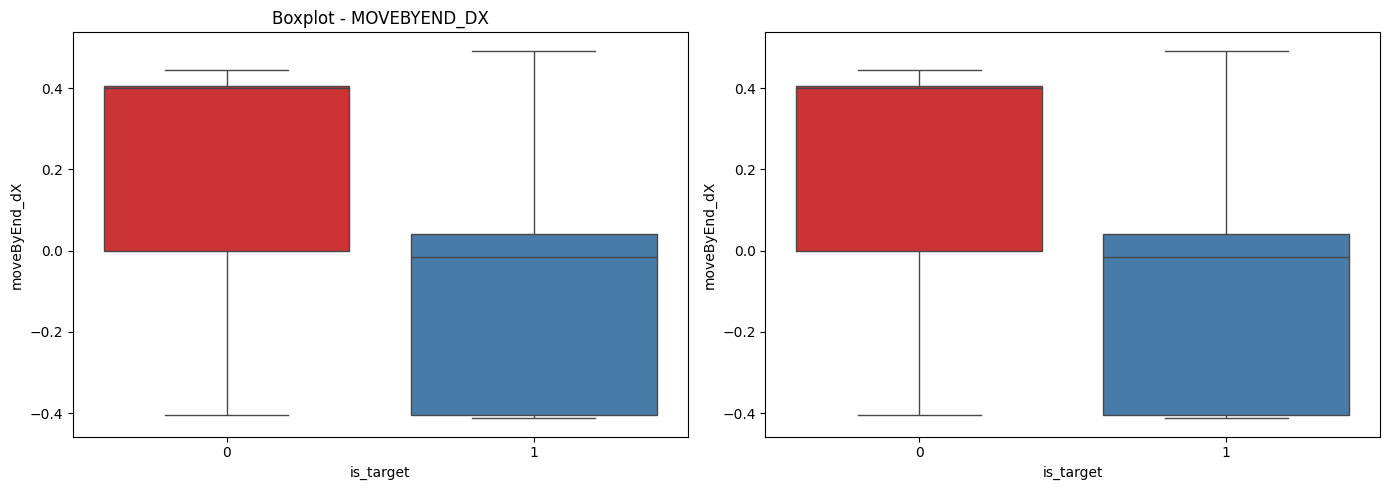

count  mean  std   min   25%   50%  75%  90%  95%  max
is_target                                                        
0         649.00  0.21 0.22 -0.40  0.00  0.40 0.41 0.41 0.42 0.44
1         912.00 -0.10 0.34 -0.41 -0.40 -0.02 0.04 0.41 0.42 0.49



>> moveByEnd_dY:



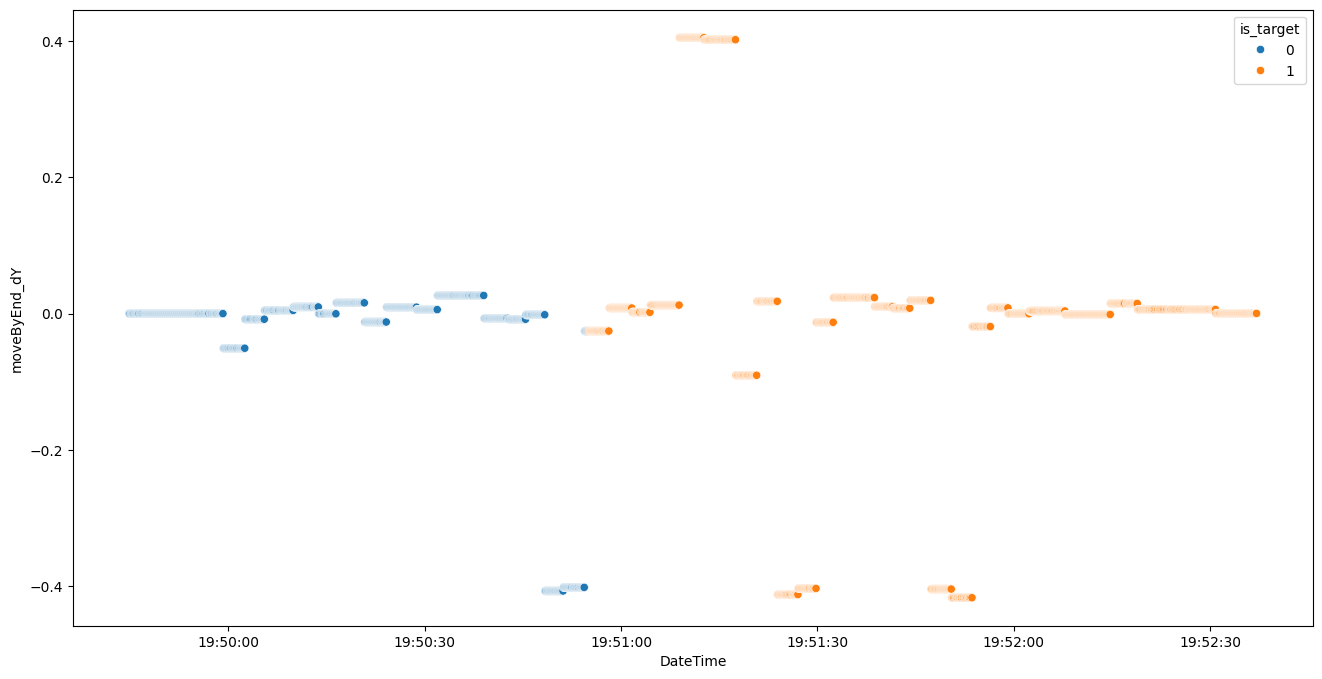

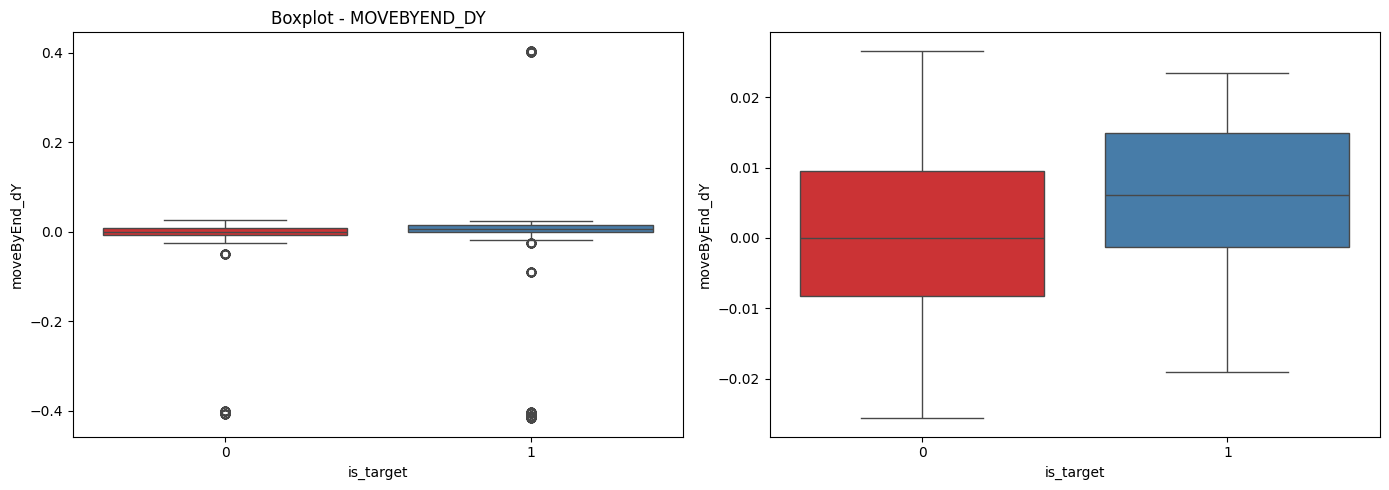

count  mean  std   min   25%  50%  75%  90%  95%  max
is_target                                                       
0         649.00 -0.03 0.11 -0.41 -0.01 0.00 0.01 0.02 0.03 0.03
1         912.00 -0.01 0.18 -0.42 -0.00 0.01 0.01 0.02 0.40 0.40



>> moveByEnd_dZ:



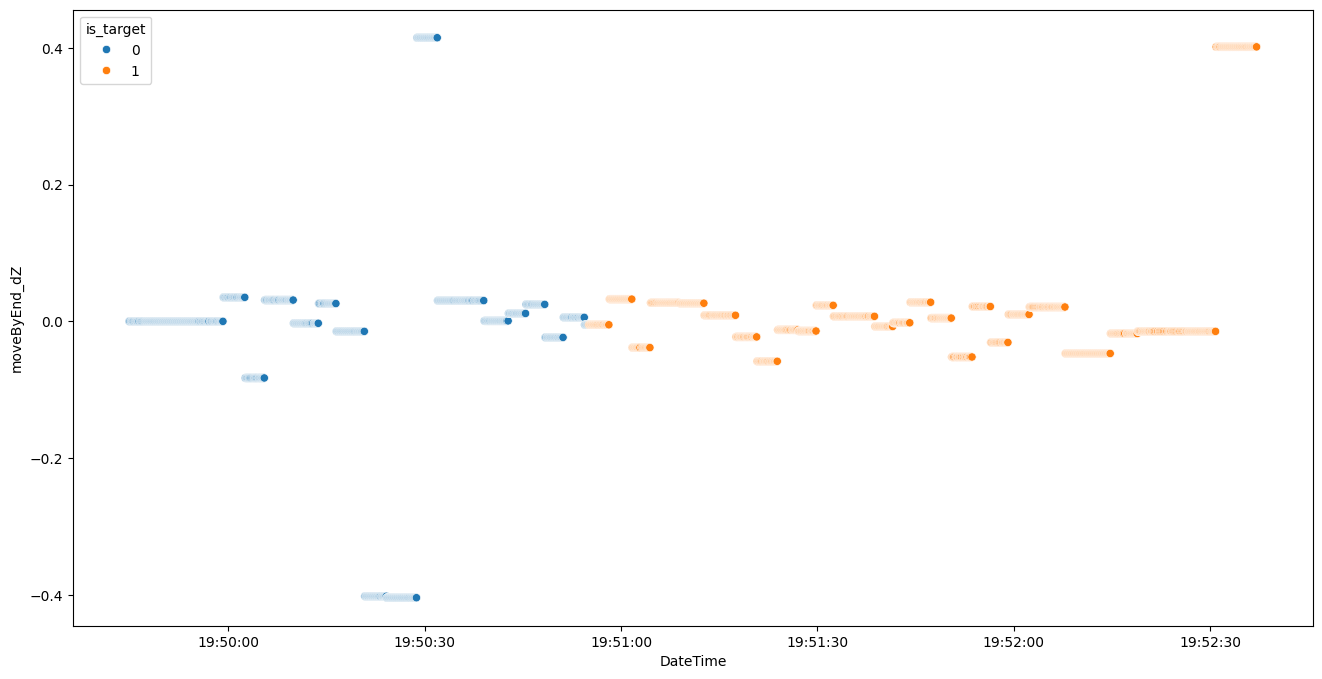

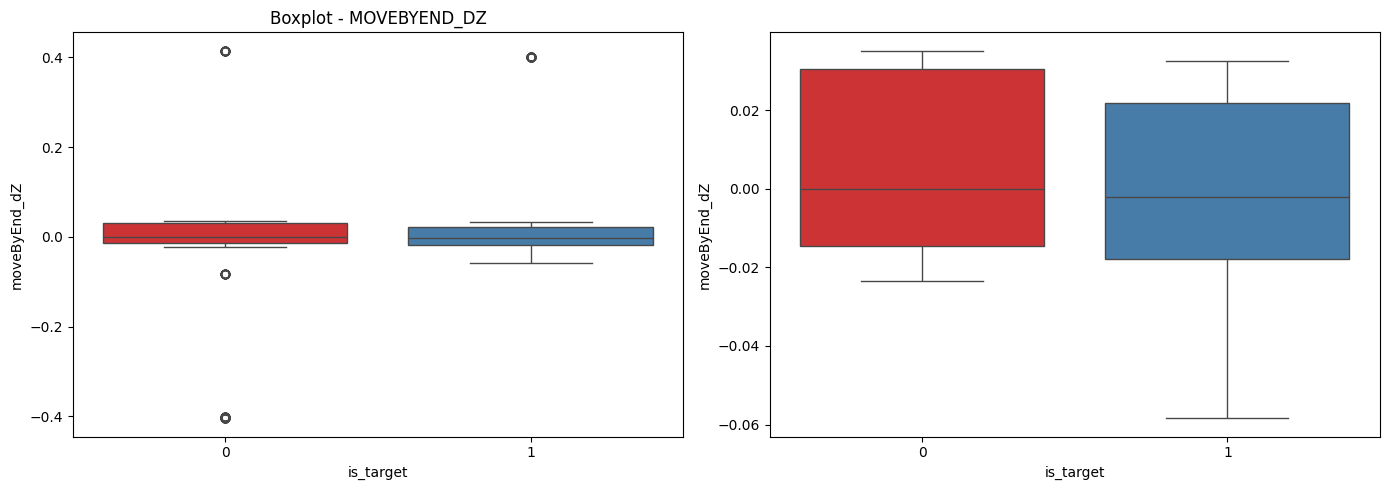

count  mean  std   min   25%   50%  75%  90%  95%  max
is_target                                                        
0         649.00 -0.02 0.17 -0.40 -0.01  0.00 0.03 0.03 0.04 0.41
1         912.00  0.02 0.10 -0.06 -0.02 -0.00 0.02 0.03 0.40 0.40

In [10]:
for col in numerical_cols:  # Numerical
    print(f"\n\n>> {col}:\n")
    show_scatterplot(jamming_flight_df, "DateTime", col, category="is_target")
    show_boxplot(jamming_flight_df, col, category="is_target")



>> FlyingStateChanged_state_unknown:



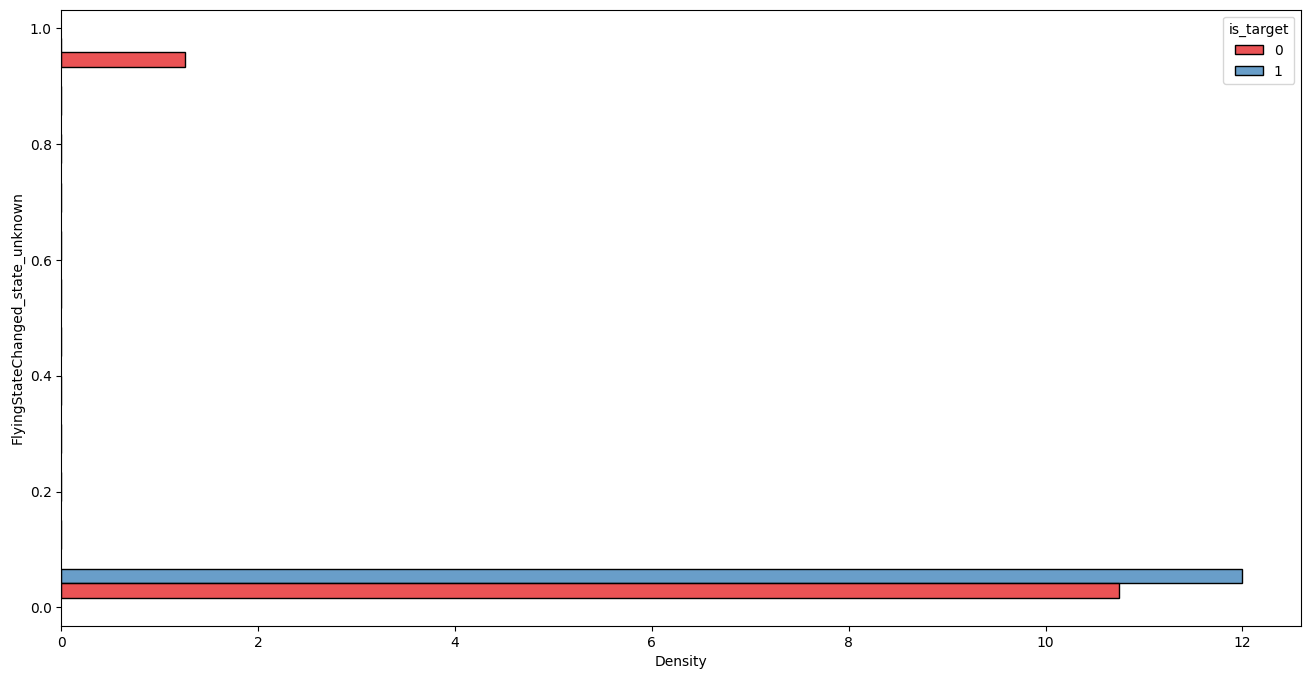

count  unique  top  freq
is_target                          
0            649       2    0   581
1            912       1    0   912



>> FlyingStateChanged_state_landed:



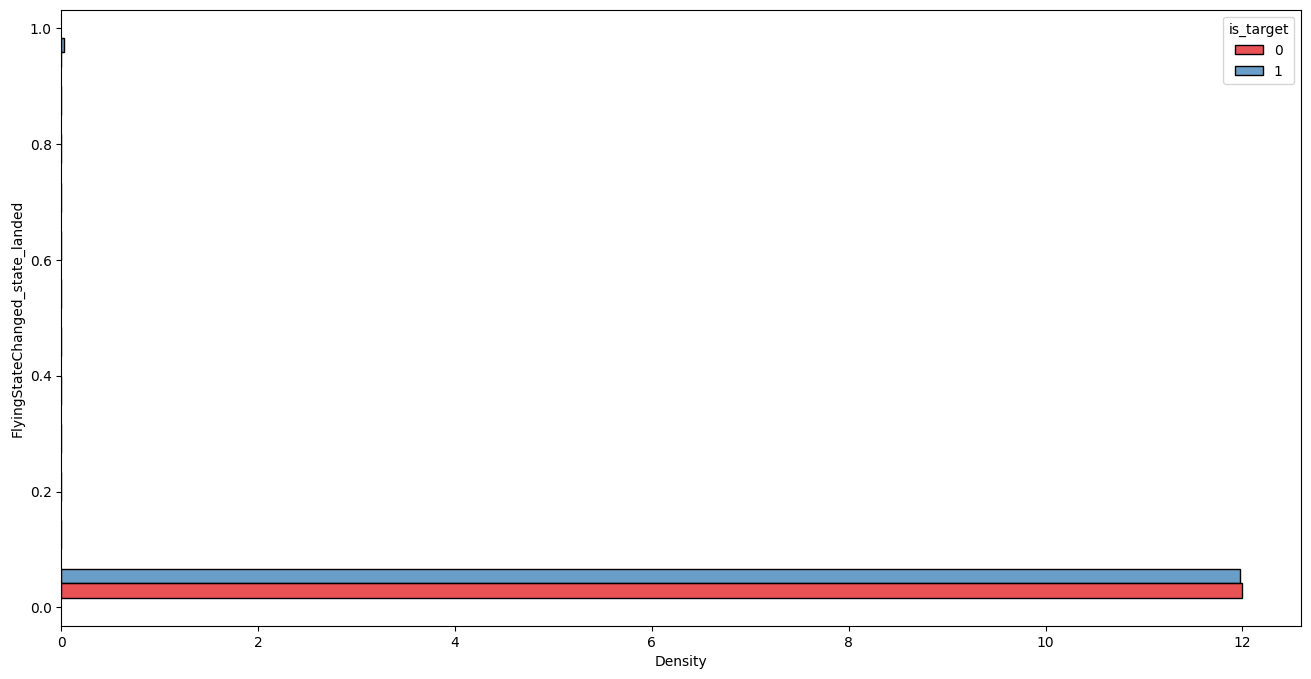

count  unique  top  freq
is_target                          
0            649       1    0   649
1            912       2    0   910



>> FlyingStateChanged_state_takingoff:



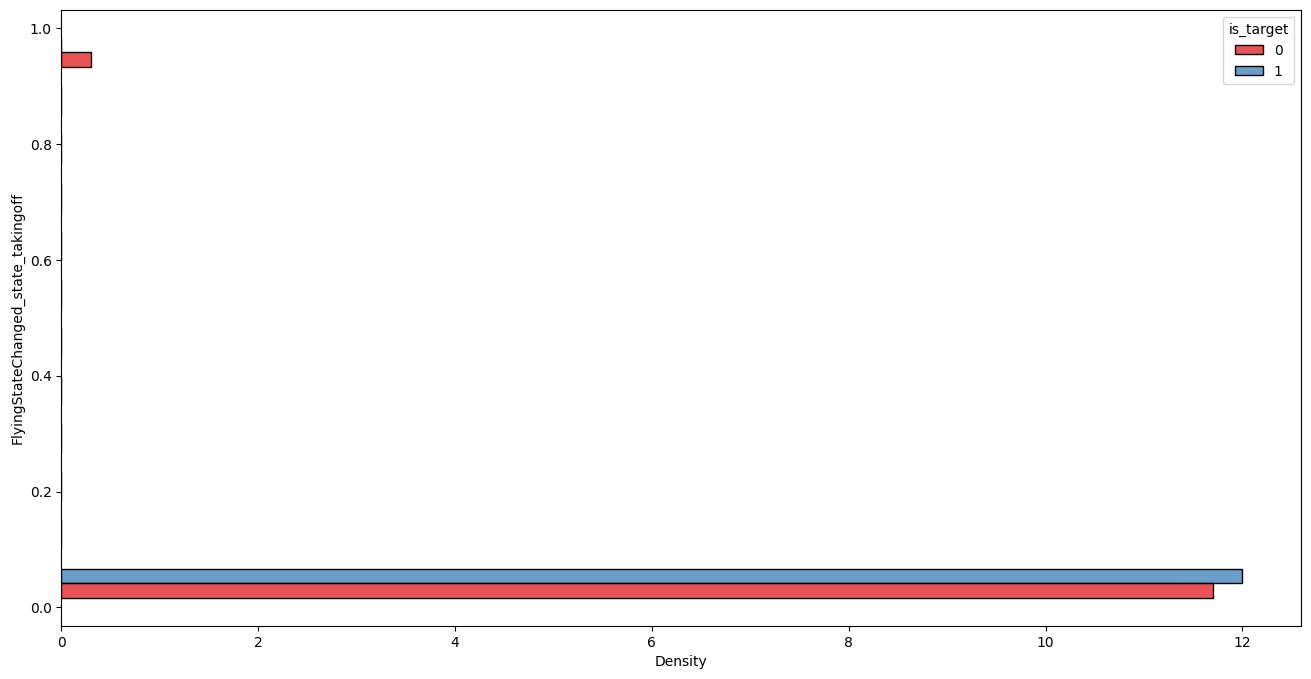

count  unique  top  freq
is_target                          
0            649       2    0   633
1            912       1    0   912



>> FlyingStateChanged_state_hovering:



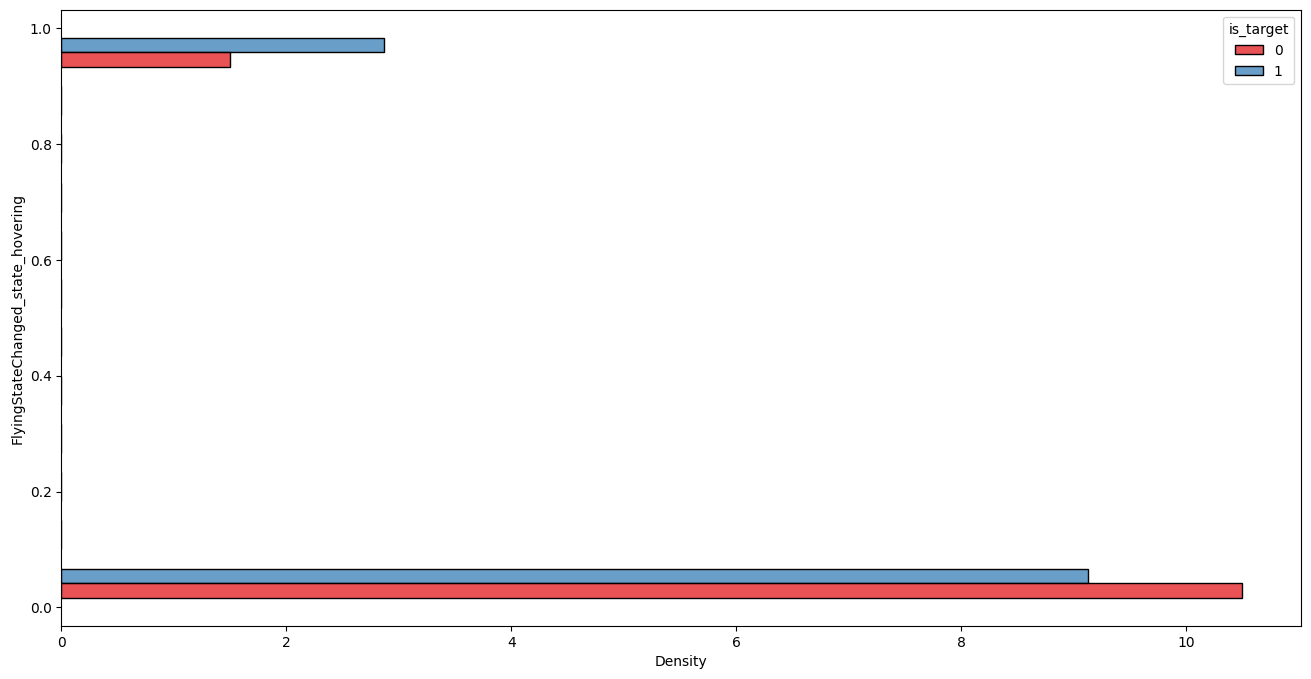

count  unique  top  freq
is_target                          
0            649       2    0   568
1            912       2    0   694



>> FlyingStateChanged_state_flying:



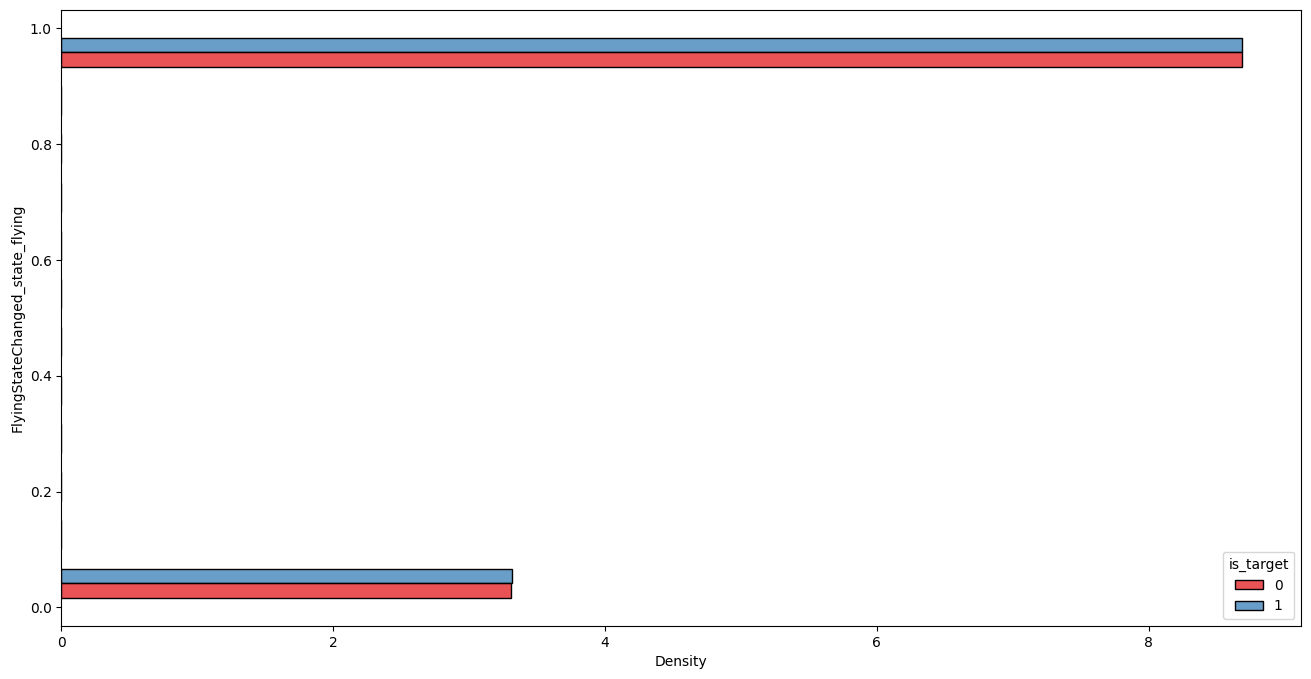

count  unique  top  freq
is_target                          
0            649       2    1   470
1            912       2    1   660



>> FlyingStateChanged_state_landing:



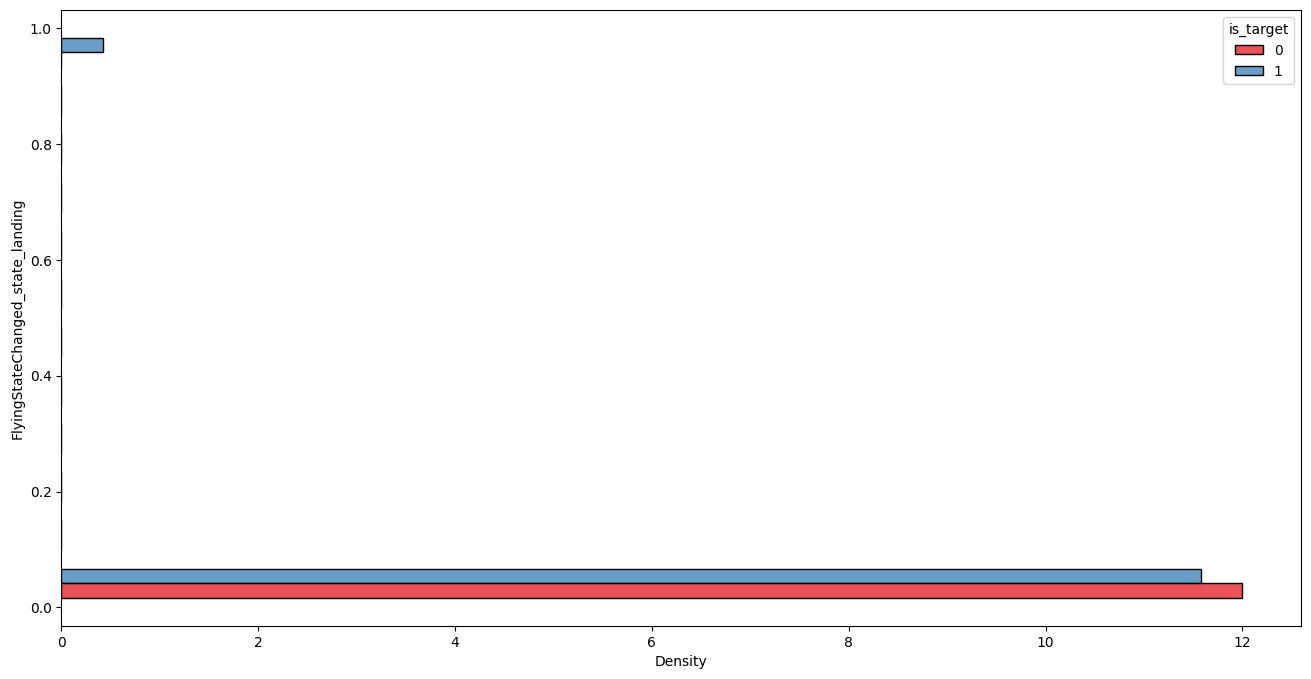

count  unique  top  freq
is_target                          
0            649       1    0   649
1            912       2    0   880



>> FlyingStateChanged_state_emergency:



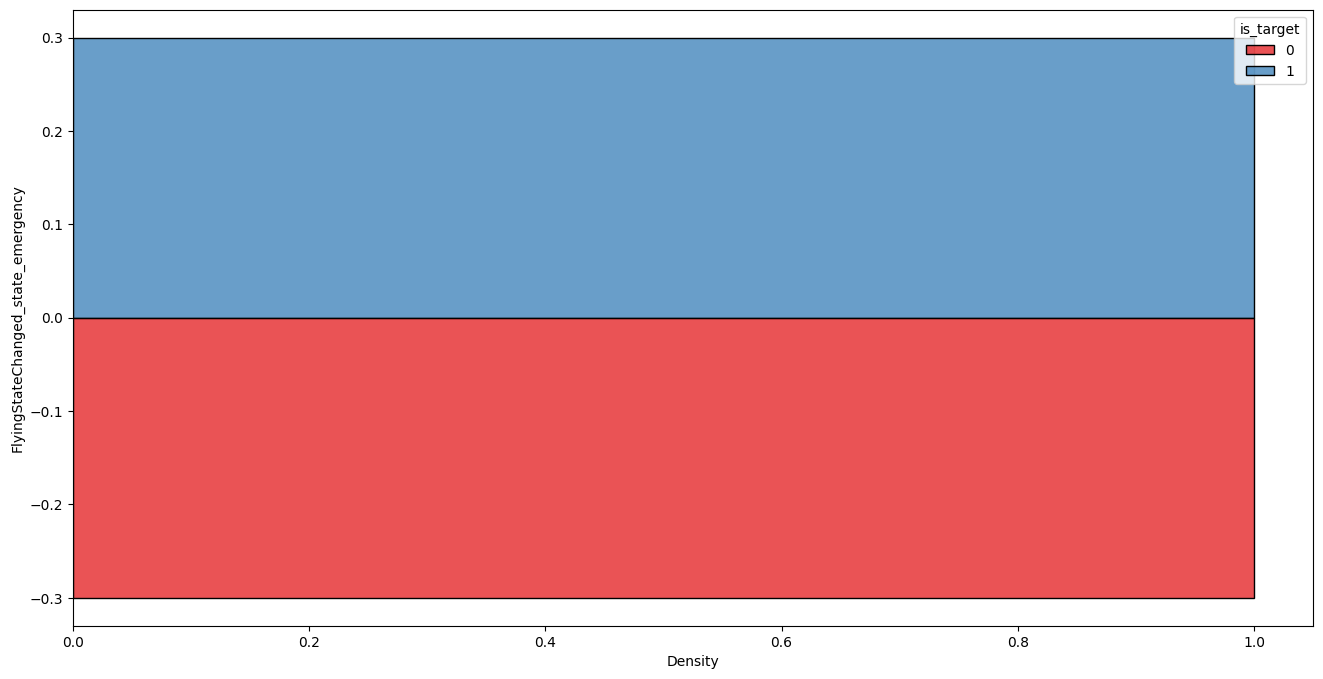

count  unique  top  freq
is_target                          
0            649       1    0   649
1            912       1    0   912



>> FlyingStateChanged_state_usertakeoff:



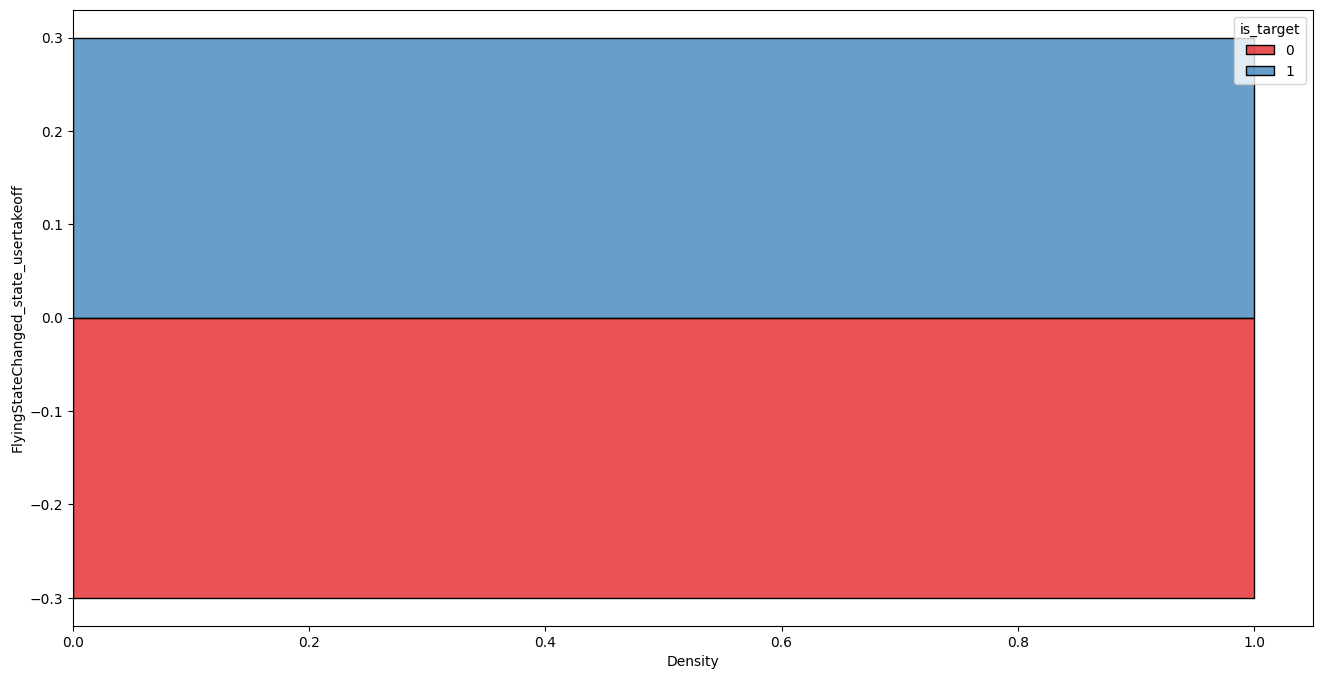

count  unique  top  freq
is_target                          
0            649       1    0   649
1            912       1    0   912



>> FlyingStateChanged_state_motor_ramping:



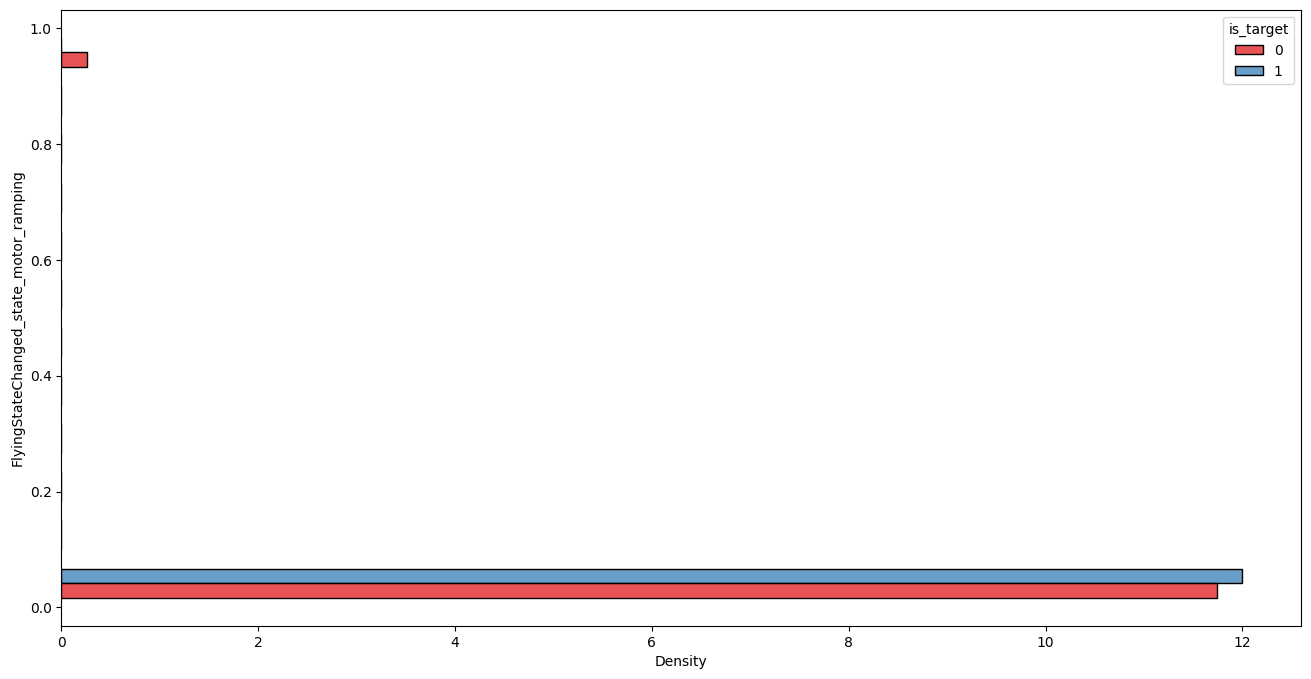

count  unique  top  freq
is_target                          
0            649       2    0   635
1            912       1    0   912



>> FlyingStateChanged_state_motor_emergency_landing:



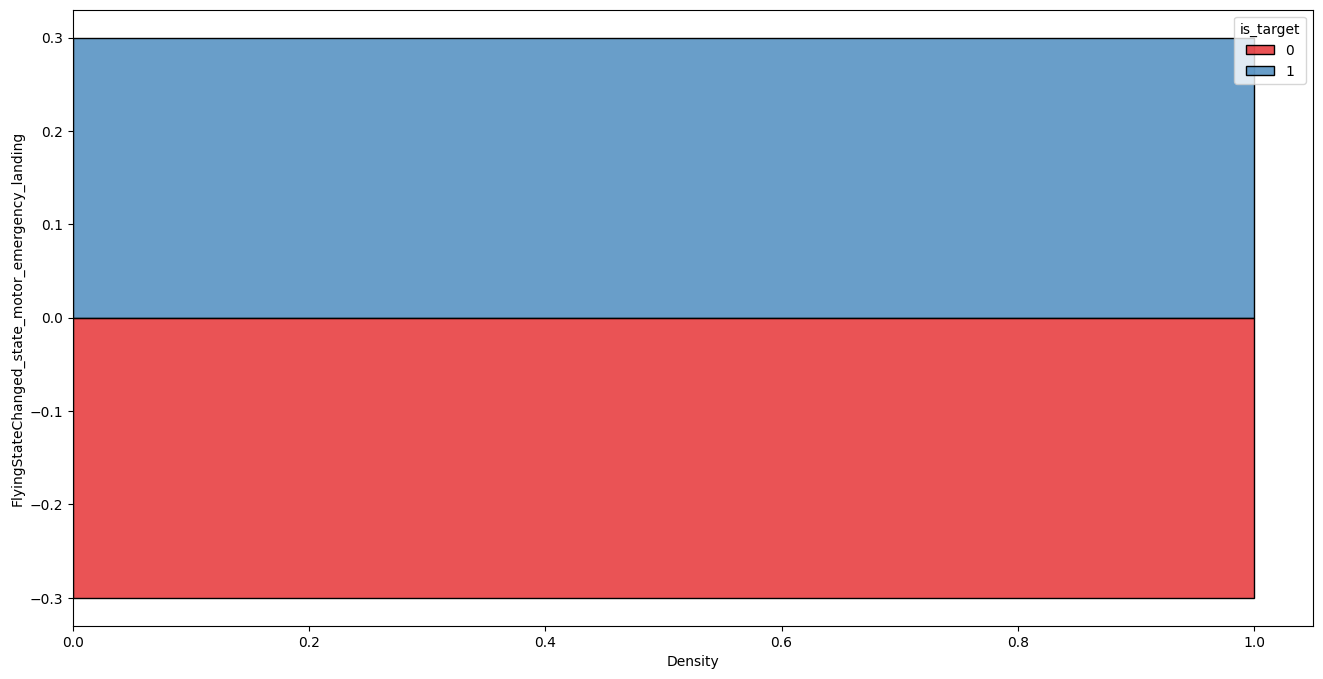

count  unique  top  freq
is_target                          
0            649       1    0   649
1            912       1    0   912



>> HomeTypeAvailabilityChanged_type_UNKNOWN:



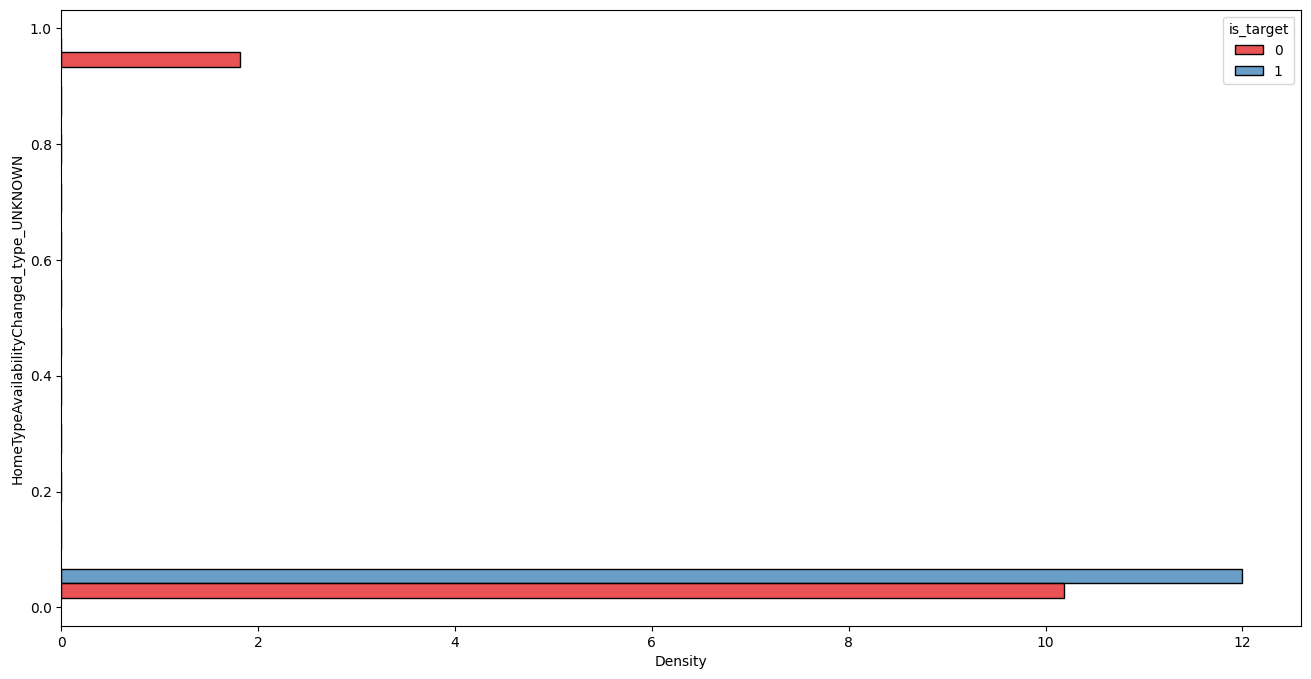

count  unique  top  freq
is_target                          
0            649       2    0   551
1            912       1    0   912



>> HomeTypeAvailabilityChanged_type_TAKEOFF:



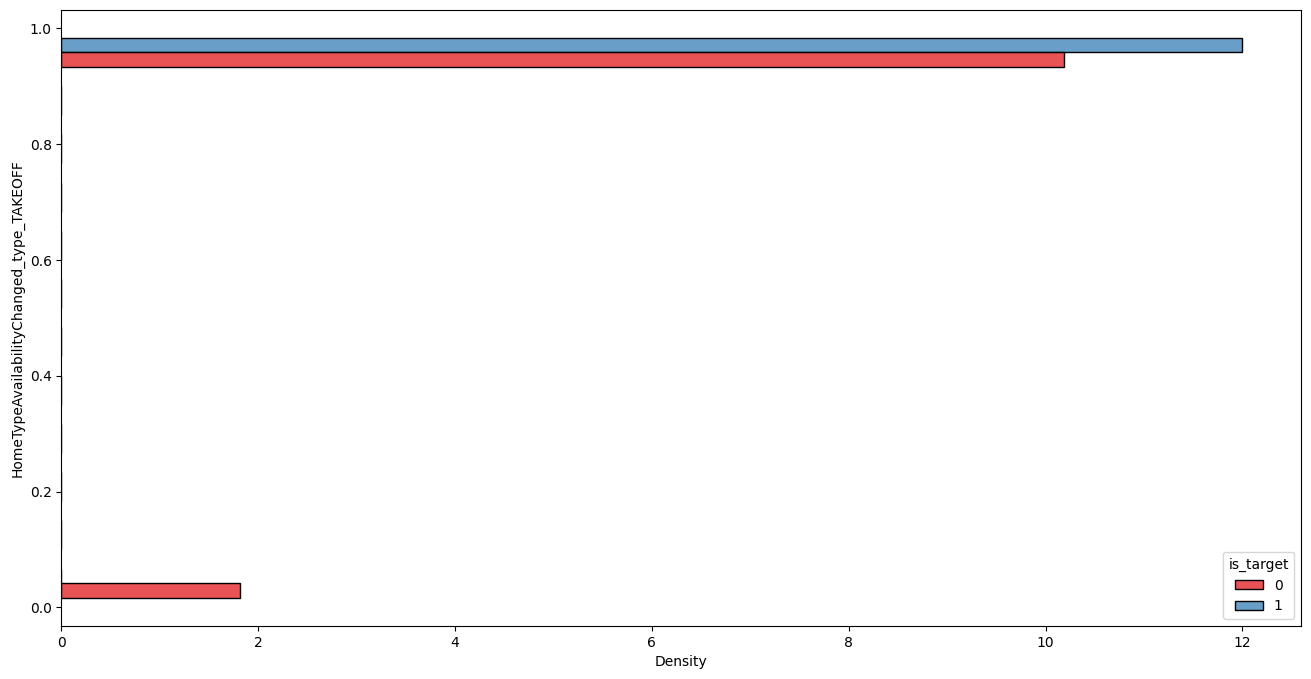

count  unique  top  freq
is_target                          
0            649       2    1   551
1            912       1    1   912



>> HomeTypeAvailabilityChanged_type_PILOT:



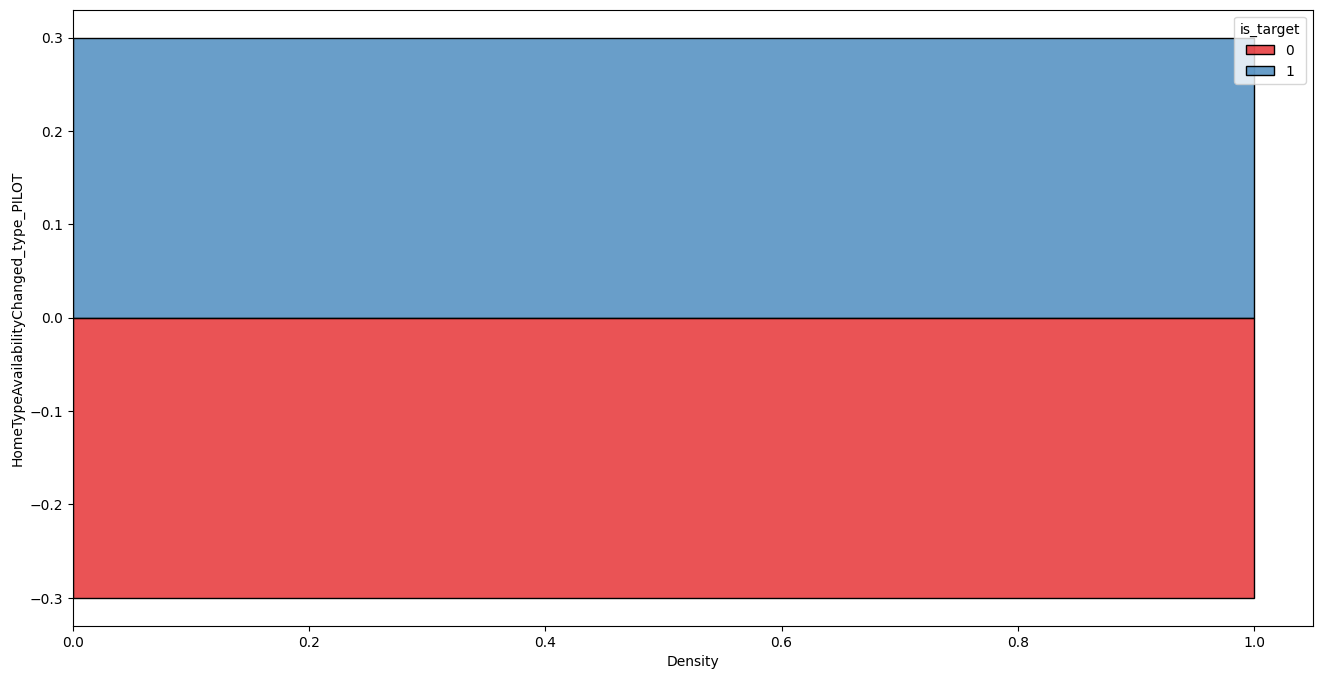

count  unique  top  freq
is_target                          
0            649       1    0   649
1            912       1    0   912



>> HomeTypeAvailabilityChanged_type_FIRST_FIX:



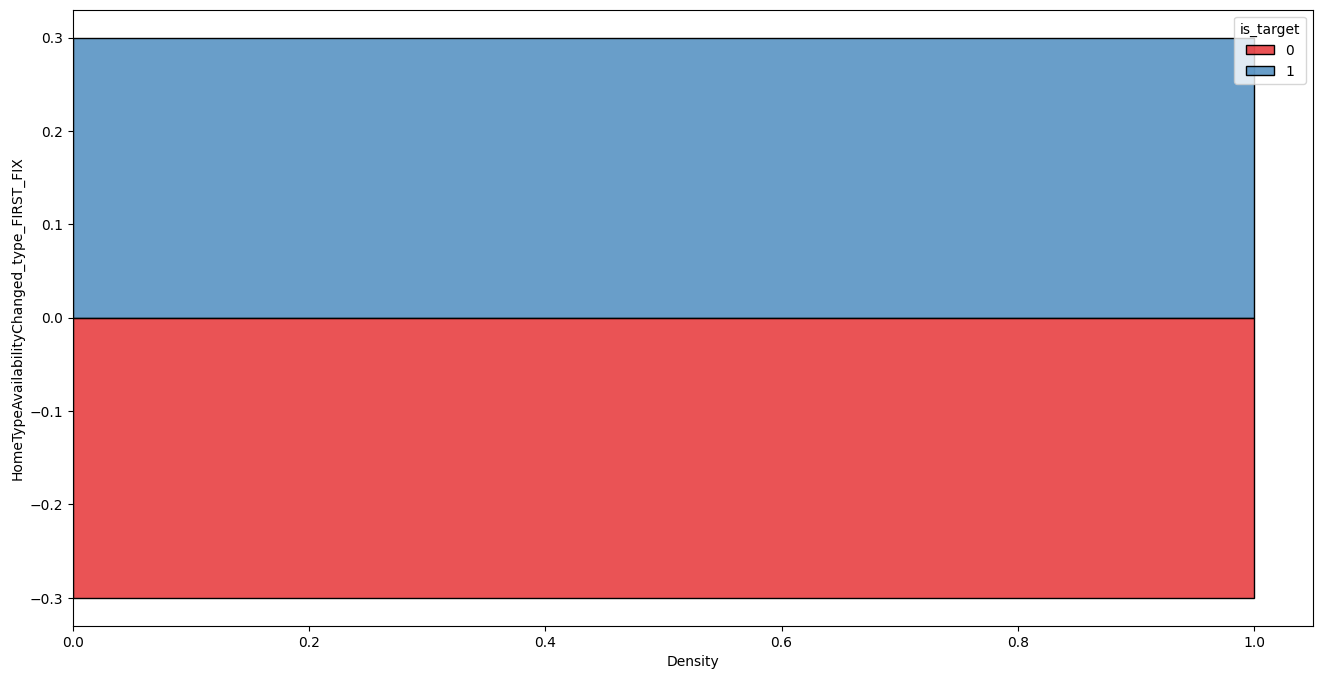

count  unique  top  freq
is_target                          
0            649       1    0   649
1            912       1    0   912



>> HomeTypeAvailabilityChanged_type_FOLLOWEE:



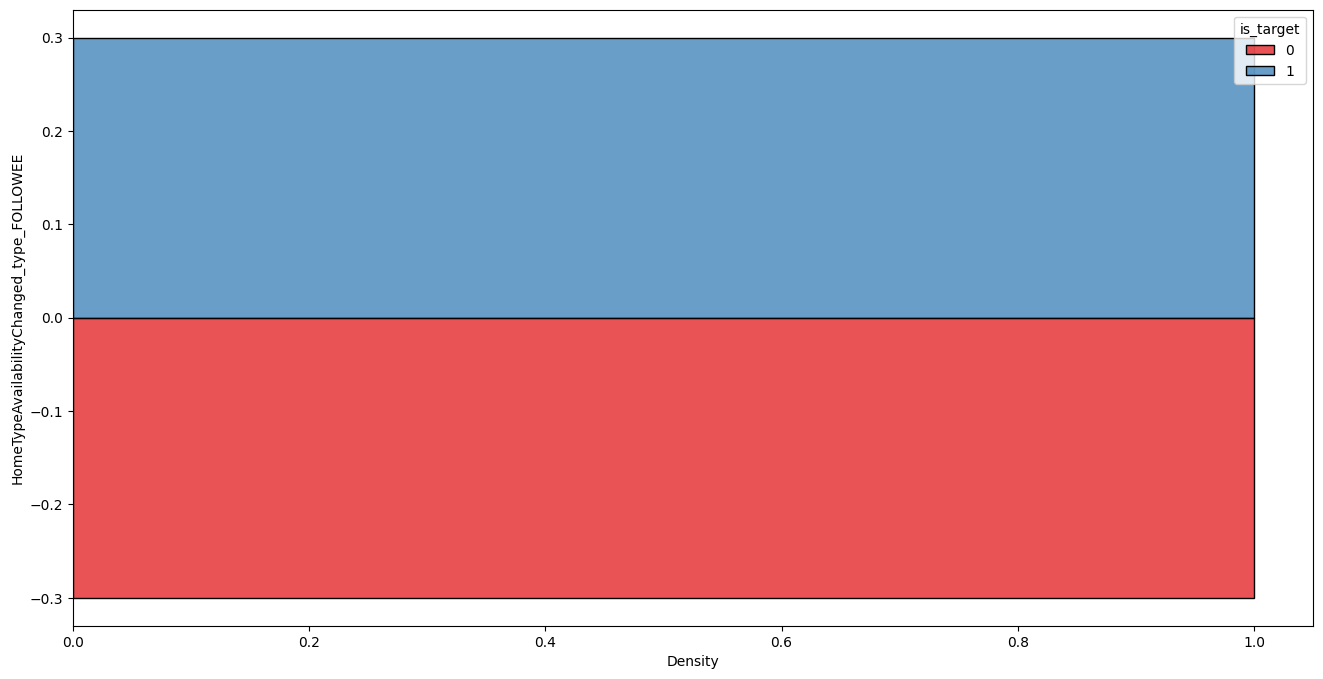

count  unique  top  freq
is_target                          
0            649       1    0   649
1            912       1    0   912

In [11]:
for col in categorical_cols:  # Categorical
    print(f"\n\n>> {col}:\n")
    show_histogram(jamming_flight_df, col, orient_h=False, describe=True, category="is_target")

### 04.2. Spoofing Flight



>> AltitudeChanged_altitude:



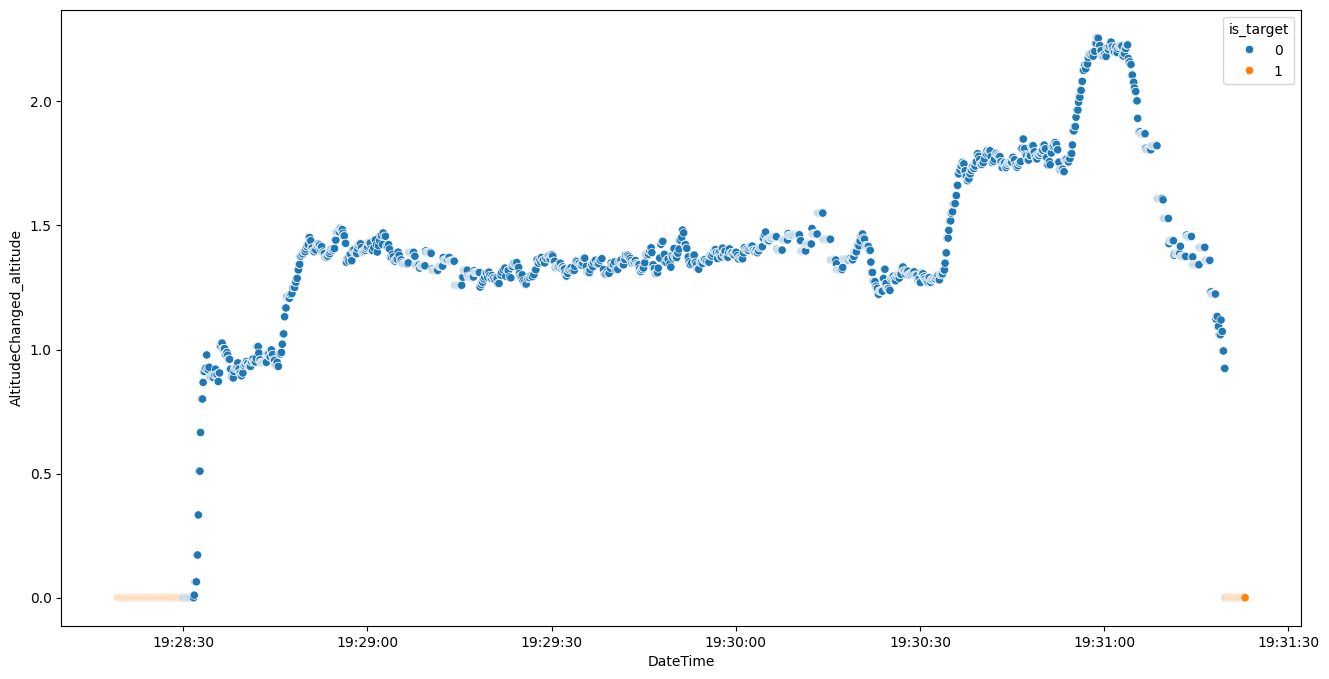

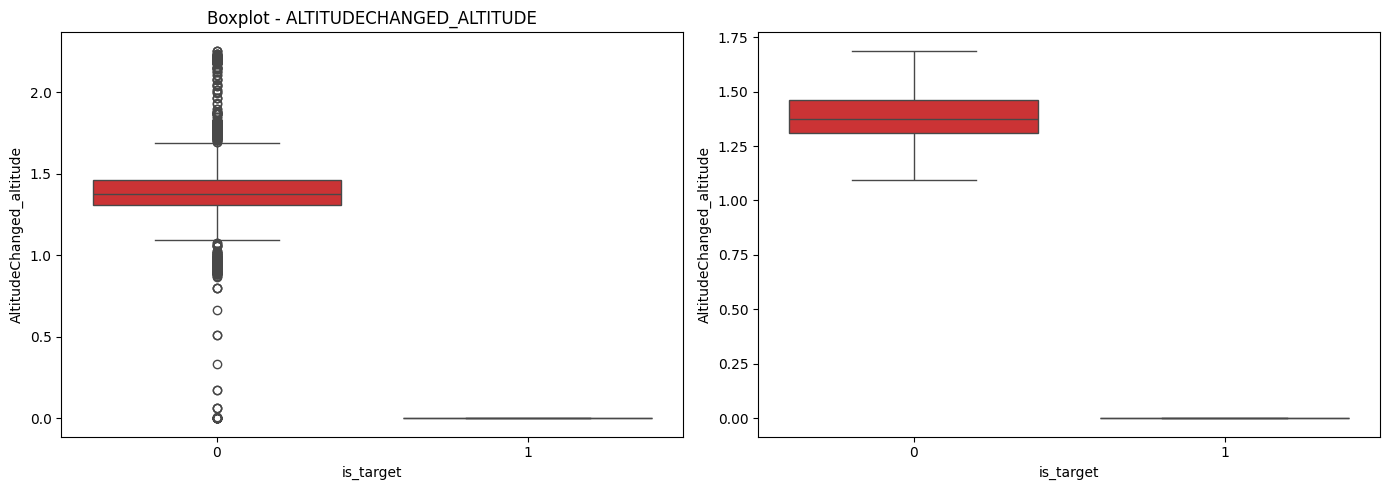

count  mean  std  min  25%  50%  75%  90%  95%  max
is_target                                                      
0         1486.00  1.41 0.34 0.00 1.31 1.38 1.46 1.80 2.08 2.26
1          130.00  0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00



>> AttitudeChanged_pitch:



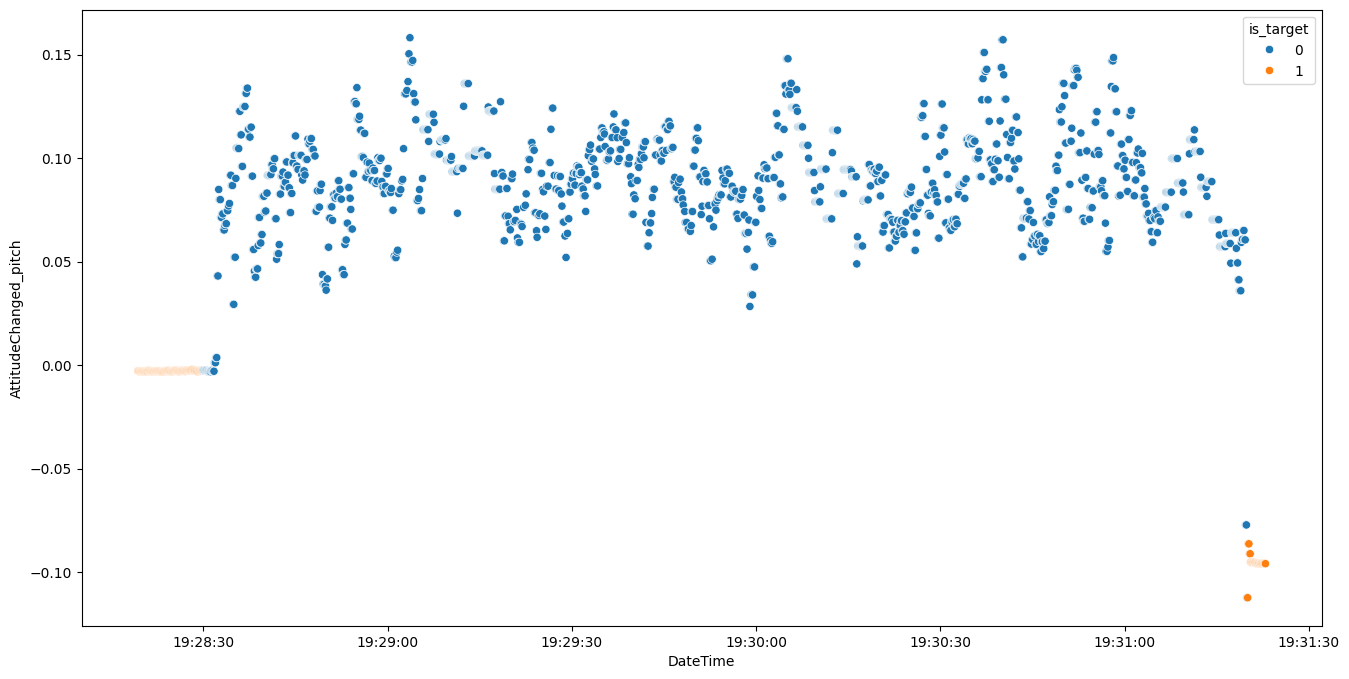

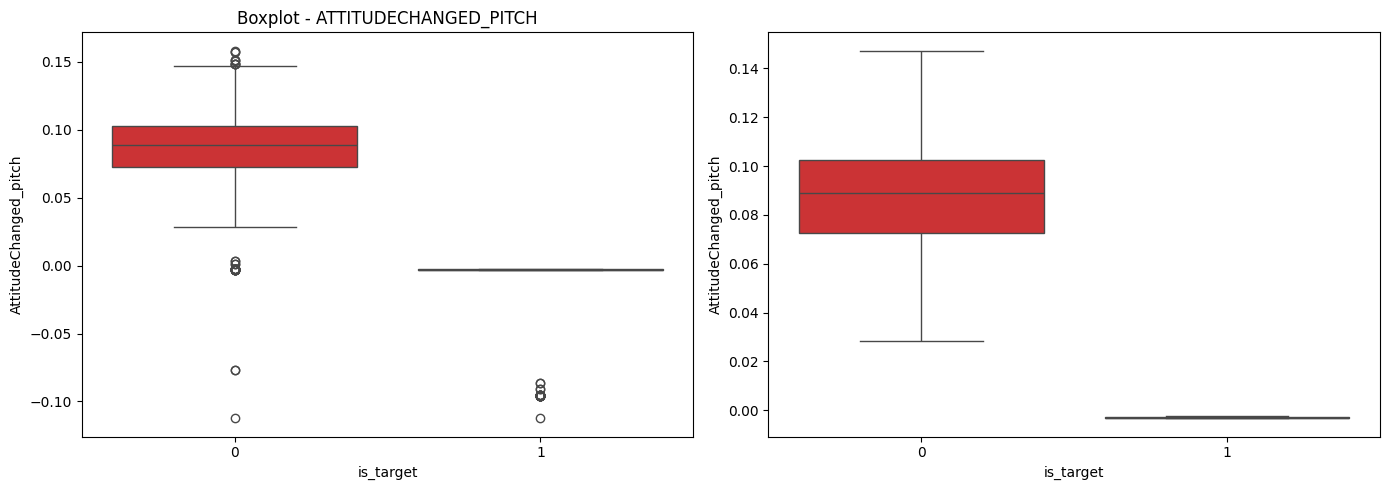

count  mean  std   min   25%   50%   75%   90%   95%   max
is_target                                                             
0         1486.00  0.09 0.03 -0.11  0.07  0.09  0.10  0.12  0.13  0.16
1          130.00 -0.02 0.04 -0.11 -0.00 -0.00 -0.00 -0.00 -0.00 -0.00



>> AttitudeChanged_roll:



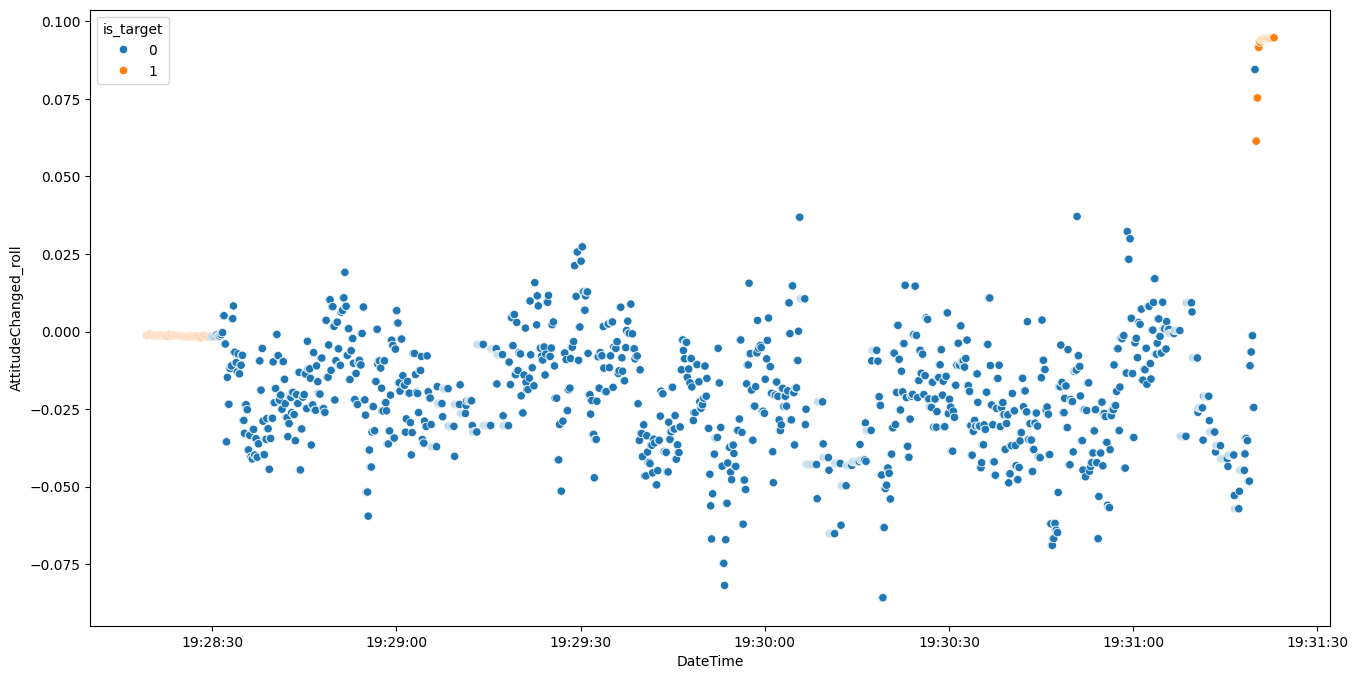

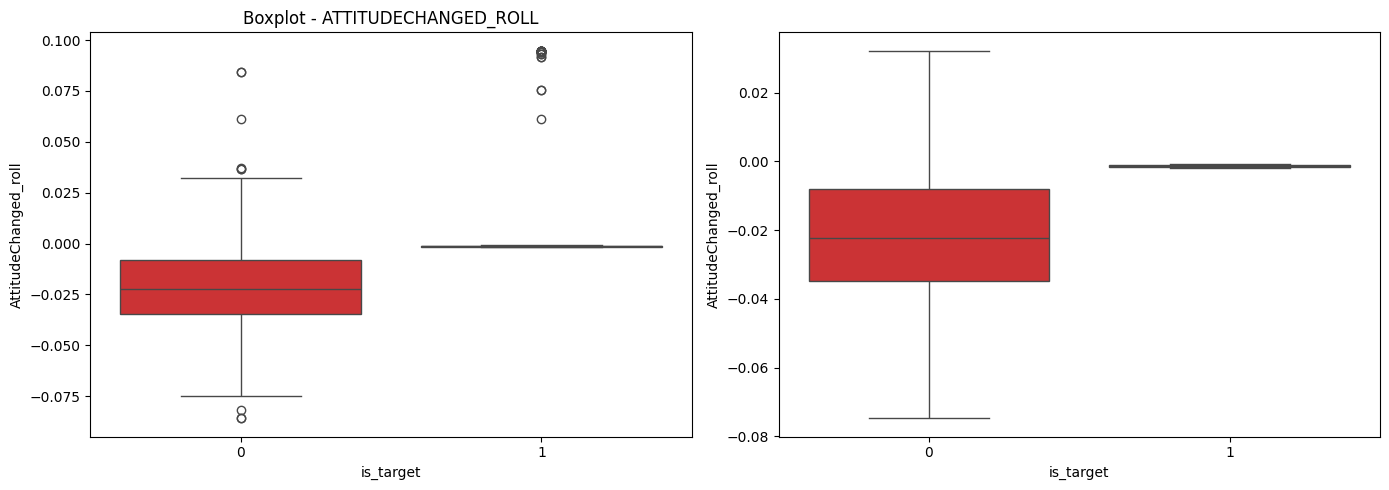

count  mean  std   min   25%   50%   75%  90%  95%  max
is_target                                                          
0         1486.00 -0.02 0.02 -0.09 -0.03 -0.02 -0.01 0.00 0.01 0.08
1          130.00  0.02 0.04 -0.00 -0.00 -0.00 -0.00 0.09 0.09 0.09



>> AttitudeChanged_yaw:



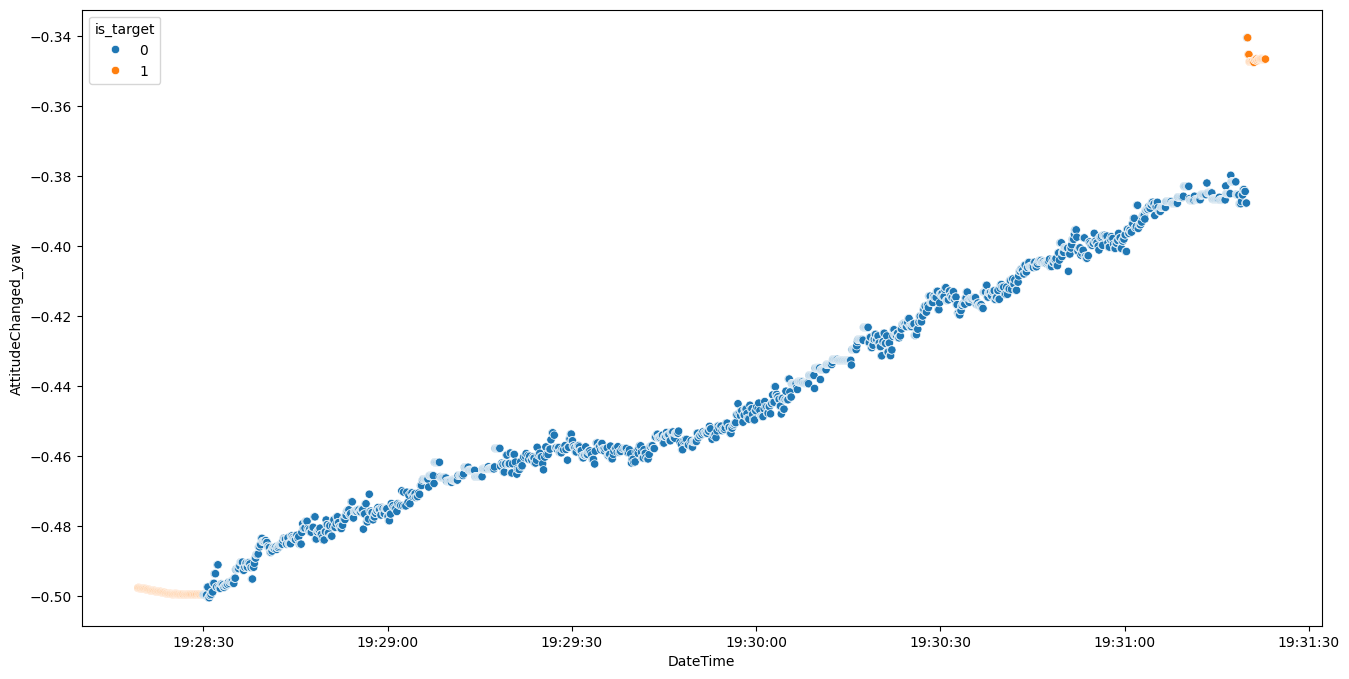

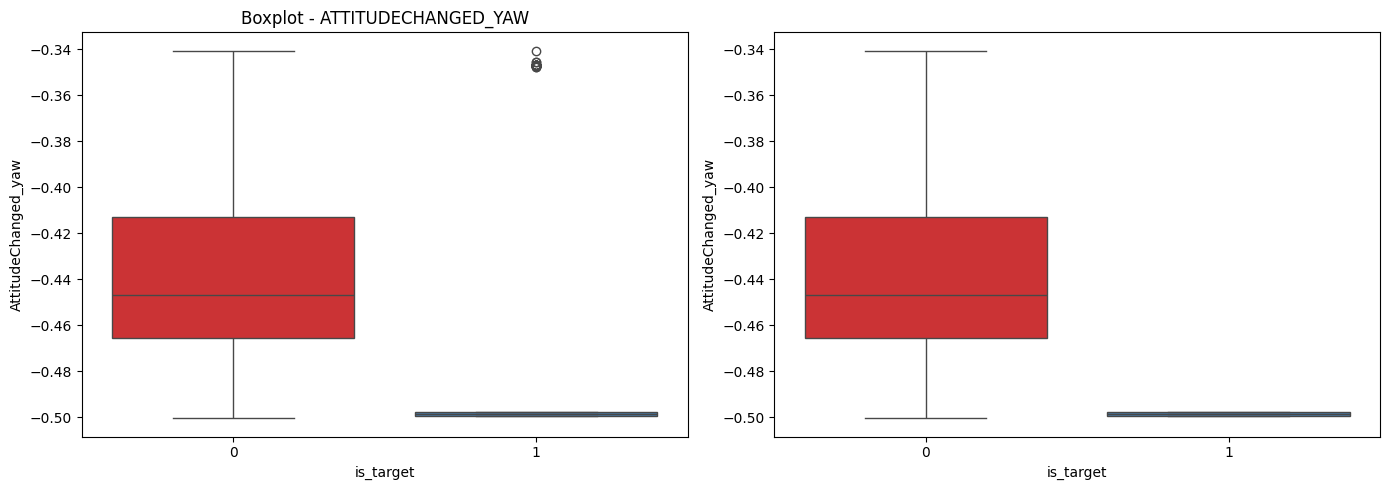

count  mean  std   min   25%   50%   75%   90%   95%   max
is_target                                                             
0         1486.00 -0.44 0.03 -0.50 -0.47 -0.45 -0.41 -0.39 -0.39 -0.34
1          130.00 -0.47 0.06 -0.50 -0.50 -0.50 -0.50 -0.35 -0.35 -0.34



>> BatteryStateChanged_percent:



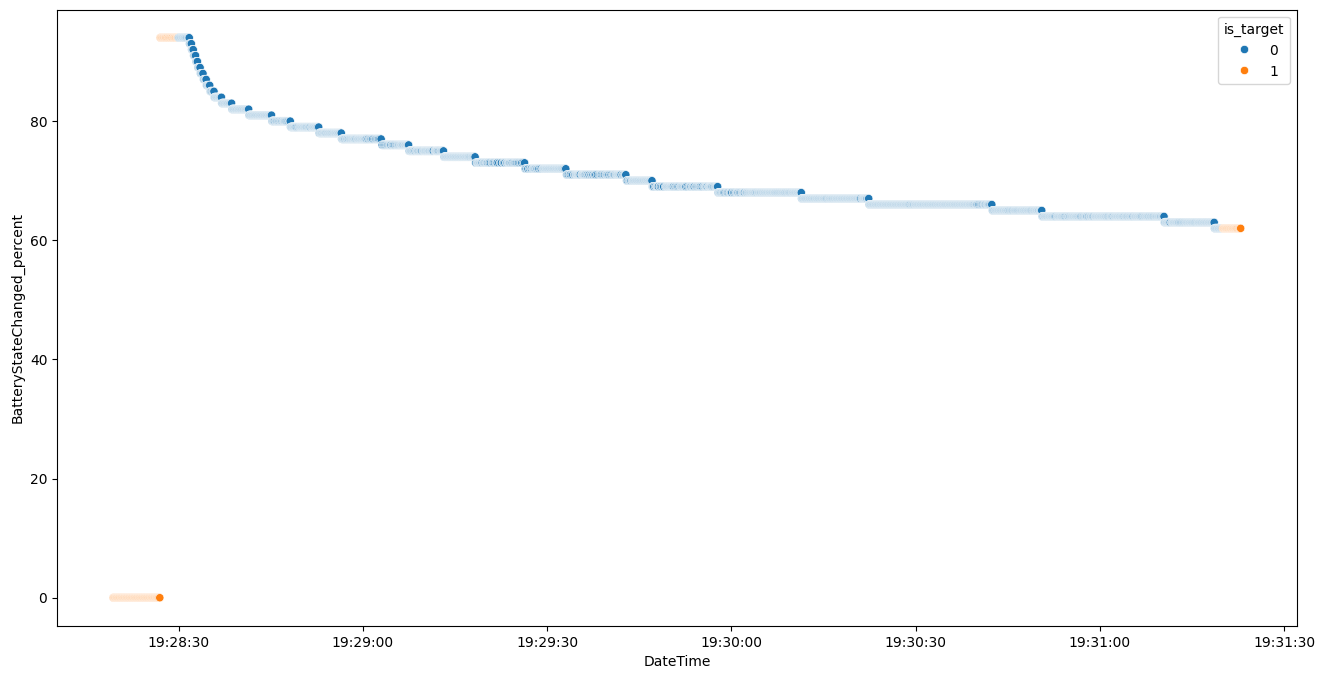

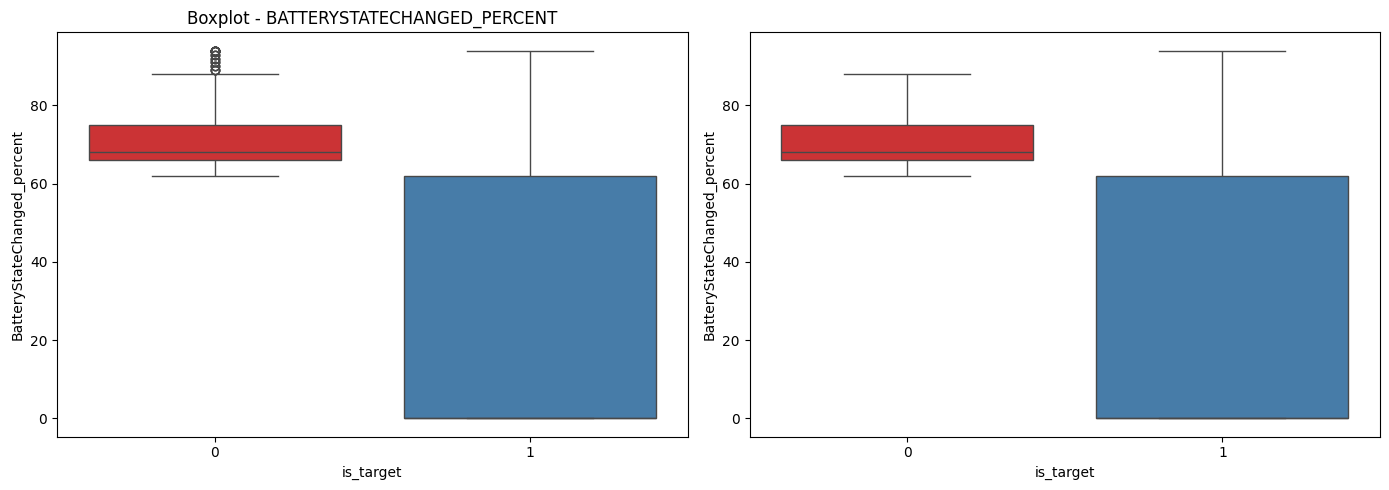

count  mean   std   min   25%   50%   75%   90%   95%   max
is_target                                                              
0         1486.00 70.61  6.71 62.00 66.00 68.00 75.00 80.00 83.00 94.00
1          130.00 32.88 39.93  0.00  0.00  0.00 62.00 94.00 94.00 94.00



>> GpsLocationChanged_altitude:



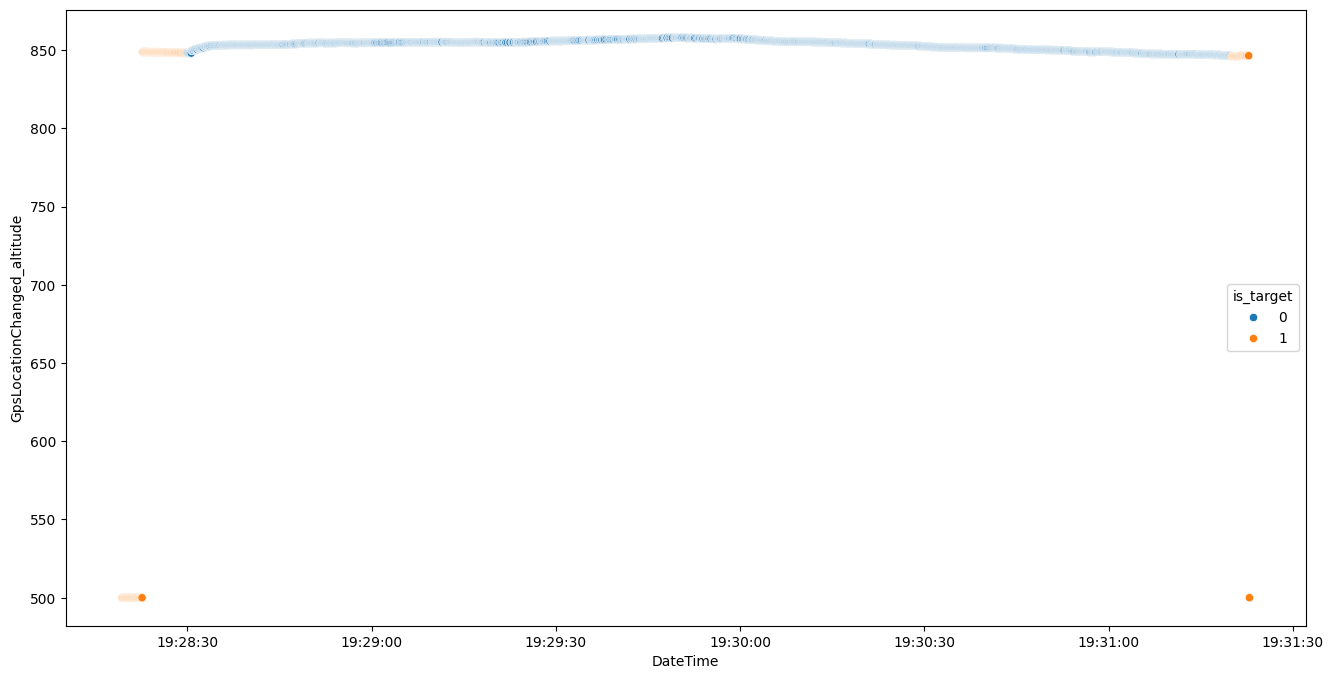

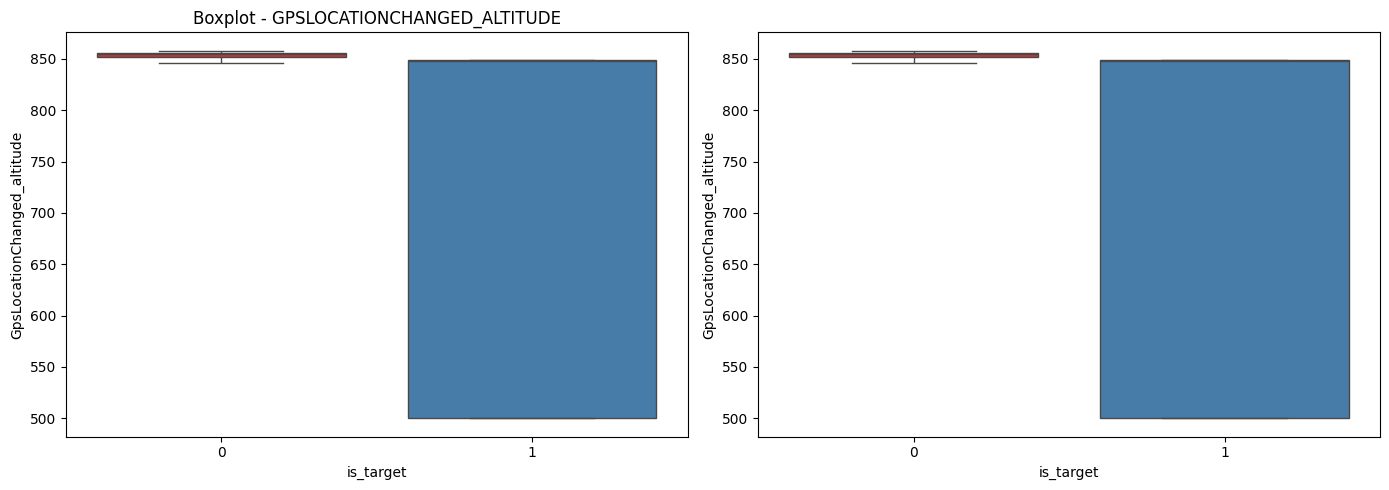

count   mean    std    min    25%    50%    75%    90%    95%  \
is_target                                                                   
0         1486.00 853.22   3.07 846.10 851.30 854.30 855.20 857.00 857.40   
1          130.00 756.90 153.48 500.00 500.00 848.20 848.60 848.70 848.80   

             max  
is_target         
0         857.90  
1         848.80



>> GpsLocationChanged_altitude_accuracy:



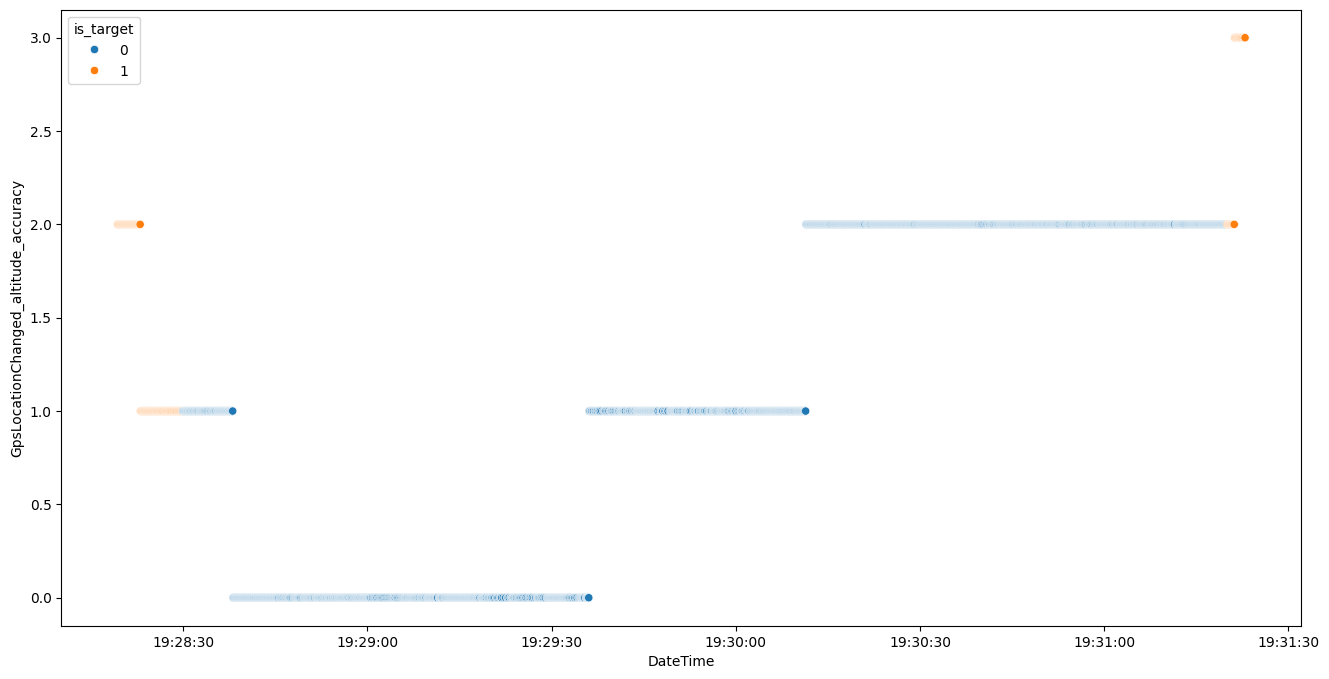

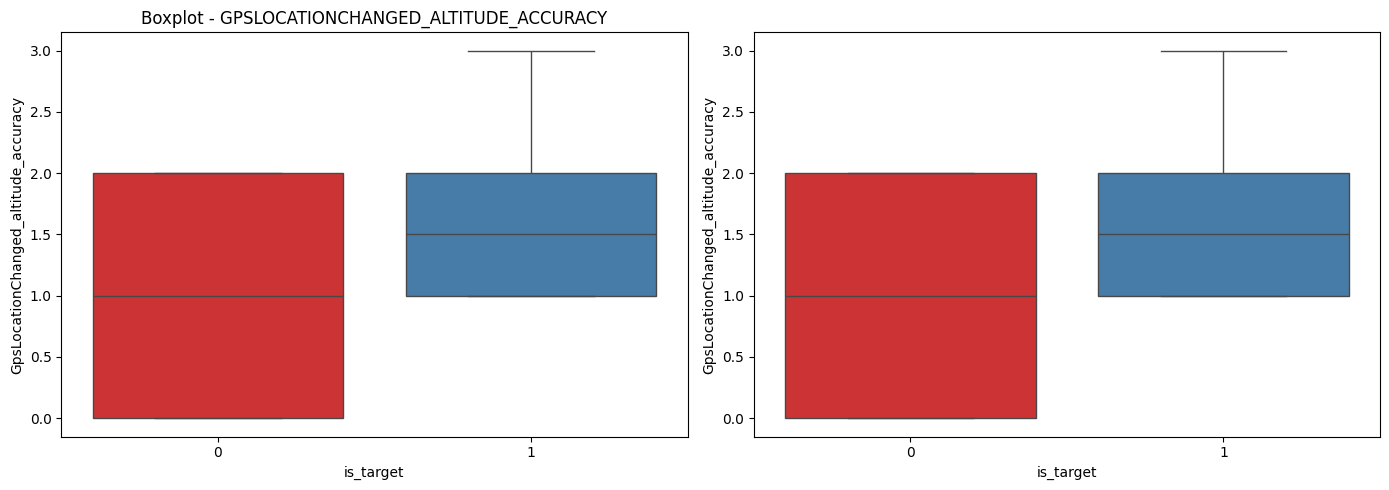

count  mean  std  min  25%  50%  75%  90%  95%  max
is_target                                                      
0         1486.00  1.10 0.87 0.00 0.00 1.00 2.00 2.00 2.00 2.00
1          130.00  1.62 0.70 1.00 1.00 1.50 2.00 3.00 3.00 3.00



>> GpsLocationChanged_latitude:



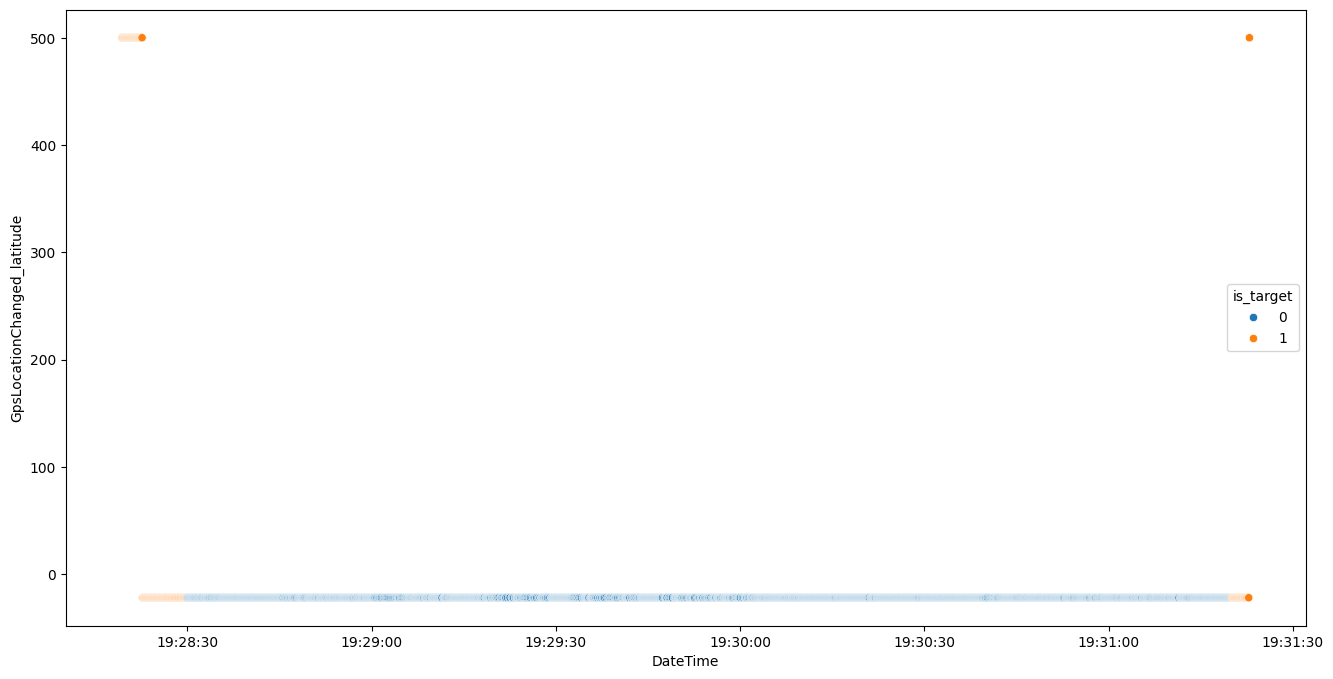

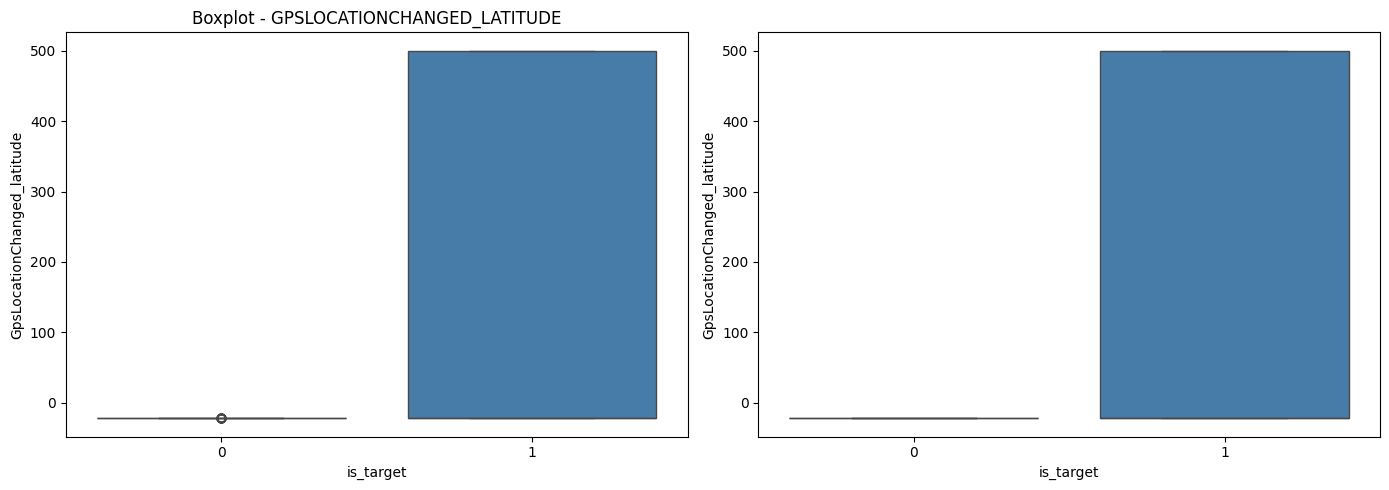

count   mean    std    min    25%    50%    75%    90%    95%  \
is_target                                                                   
0         1486.00 -22.00   0.00 -22.00 -22.00 -22.00 -22.00 -22.00 -22.00   
1          130.00 114.52 230.29 -22.00 -22.00 -22.00 500.00 500.00 500.00   

             max  
is_target         
0         -22.00  
1         500.00



>> GpsLocationChanged_latitude_accuracy:



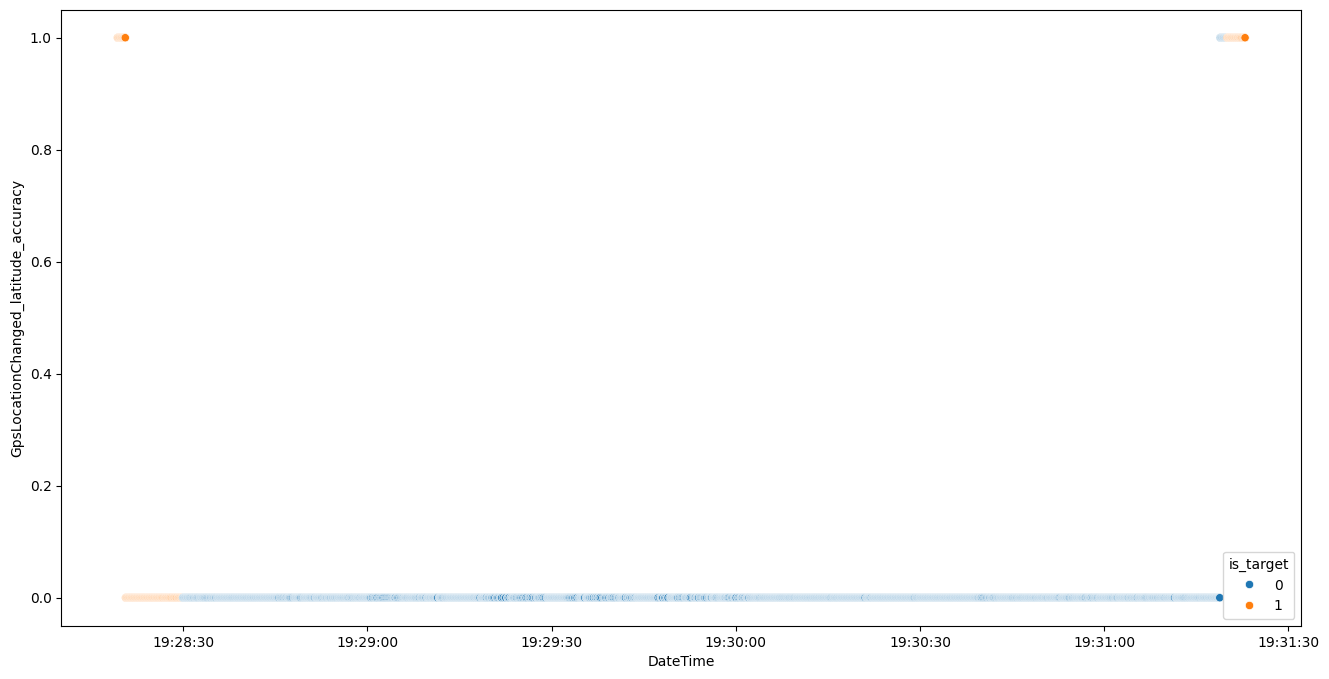

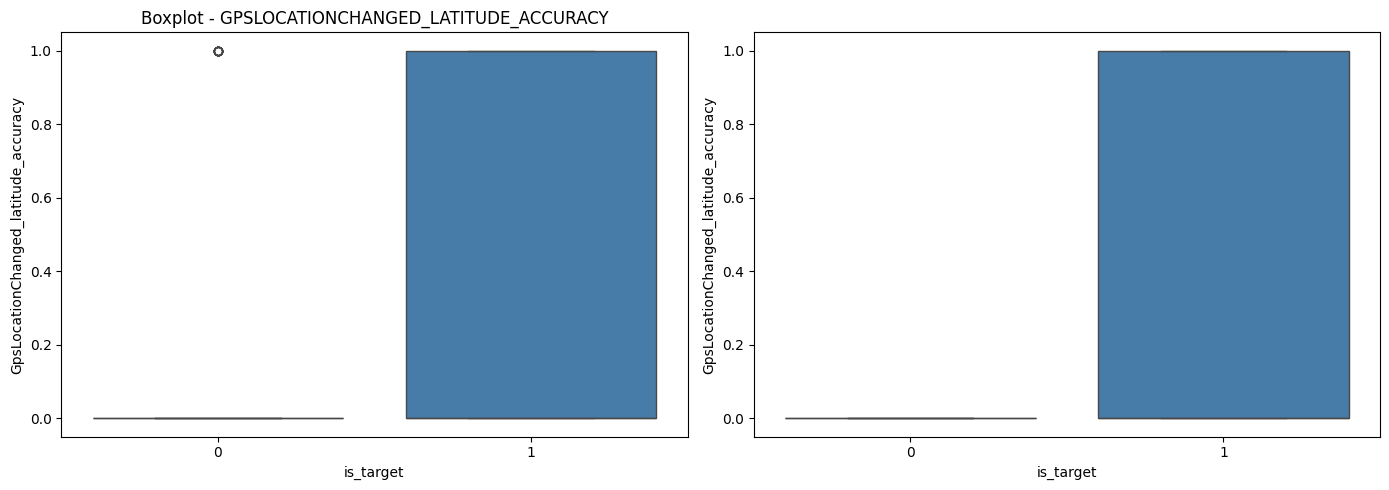

count  mean  std  min  25%  50%  75%  90%  95%  max
is_target                                                      
0         1486.00  0.01 0.09 0.00 0.00 0.00 0.00 0.00 0.00 1.00
1          130.00  0.32 0.47 0.00 0.00 0.00 1.00 1.00 1.00 1.00



>> GpsLocationChanged_longitude:



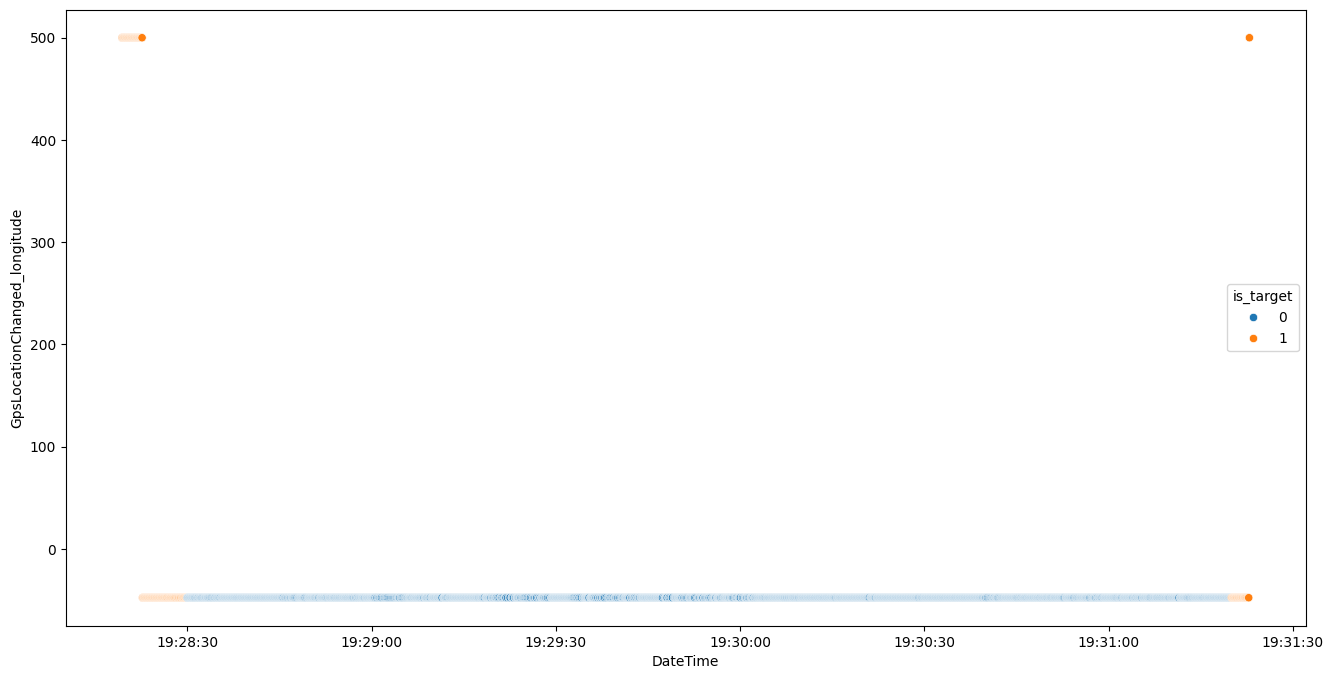

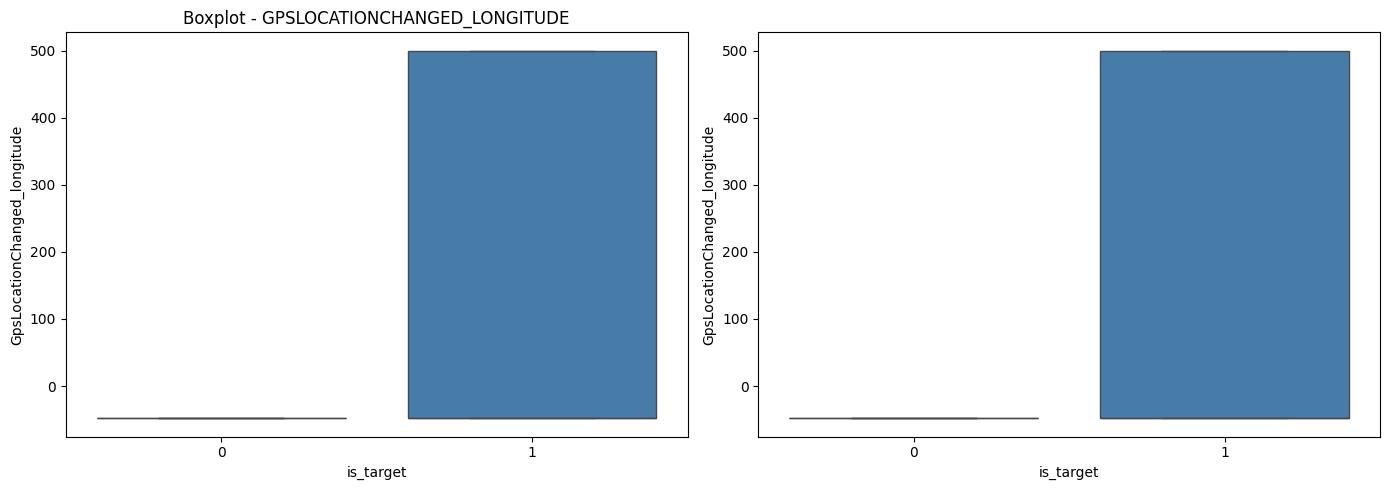

count   mean    std    min    25%    50%    75%    90%    95%  \
is_target                                                                   
0         1486.00 -47.93   0.00 -47.93 -47.93 -47.93 -47.93 -47.93 -47.93   
1          130.00  95.37 241.73 -47.93 -47.93 -47.93 500.00 500.00 500.00   

             max  
is_target         
0         -47.93  
1         500.00



>> GpsLocationChanged_longitude_accuracy:



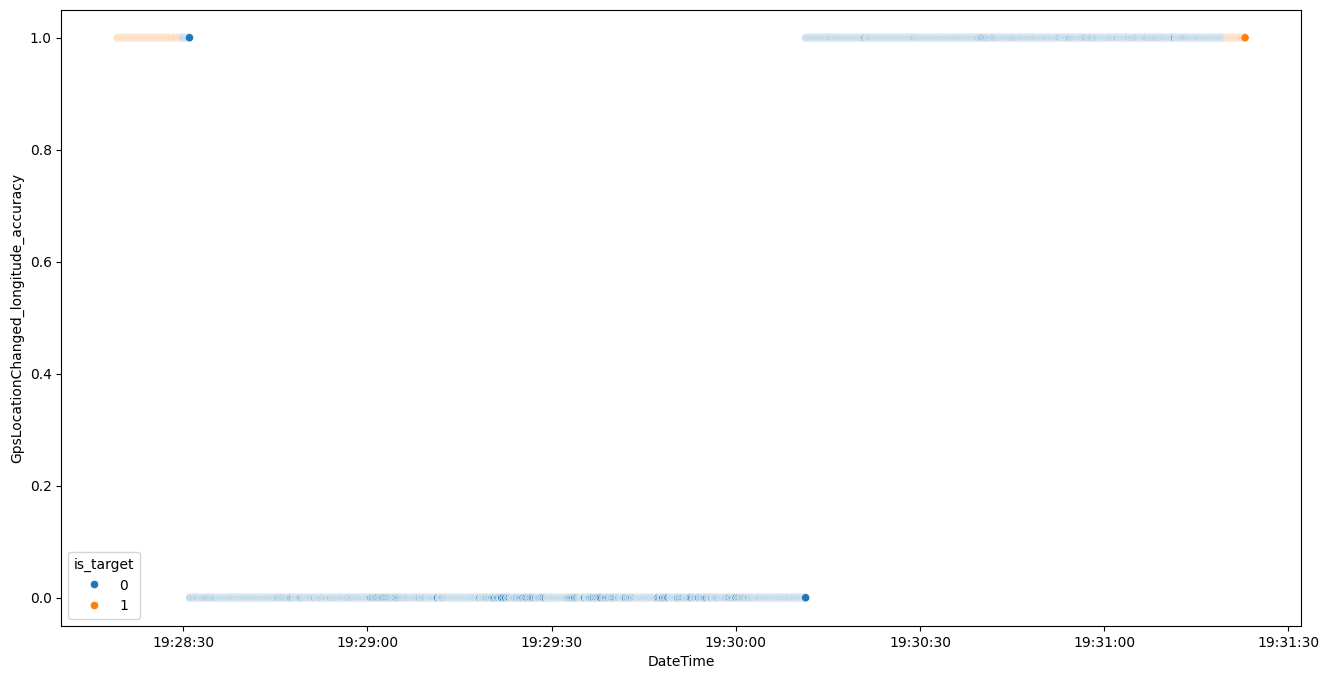

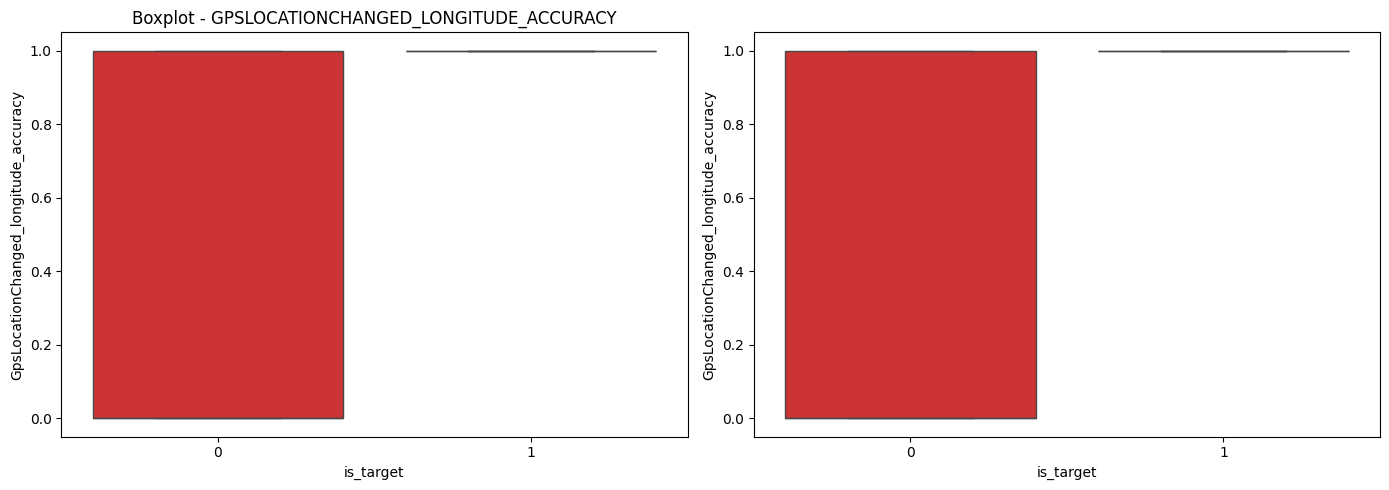

count  mean  std  min  25%  50%  75%  90%  95%  max
is_target                                                      
0         1486.00  0.44 0.50 0.00 0.00 0.00 1.00 1.00 1.00 1.00
1          130.00  1.00 0.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00



>> HomeChanged_altitude:



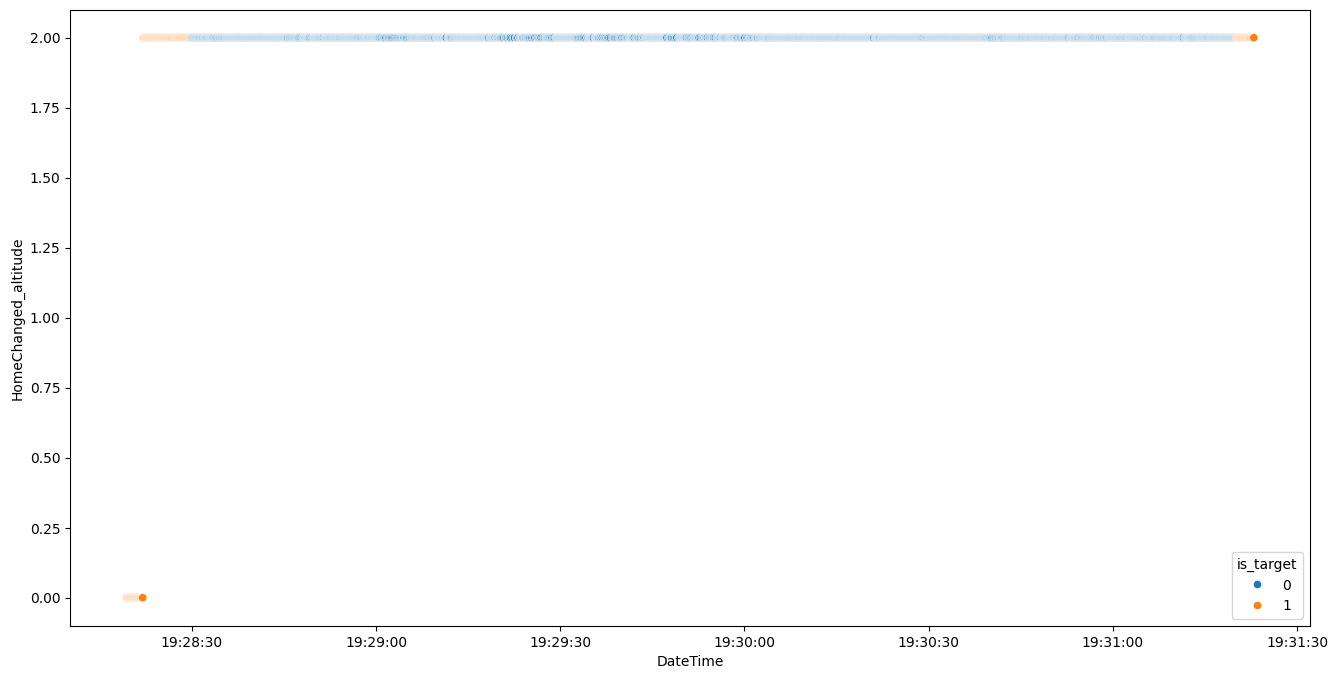

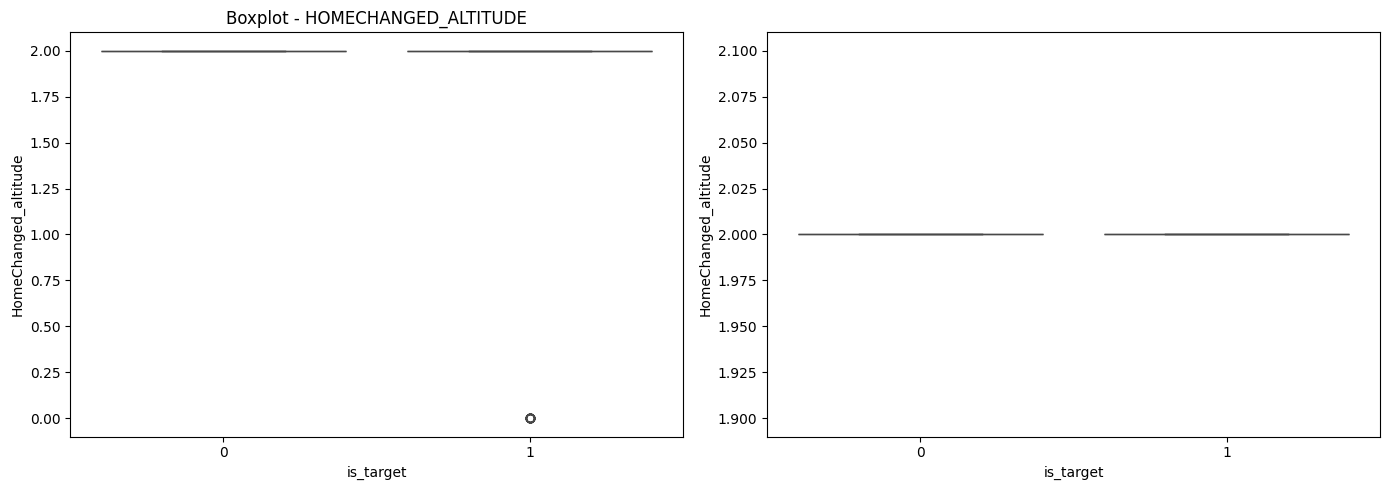

count  mean  std  min  25%  50%  75%  90%  95%  max
is_target                                                      
0         1486.00  2.00 0.00 2.00 2.00 2.00 2.00 2.00 2.00 2.00
1          130.00  1.58 0.81 0.00 2.00 2.00 2.00 2.00 2.00 2.00



>> HomeChanged_latitude:



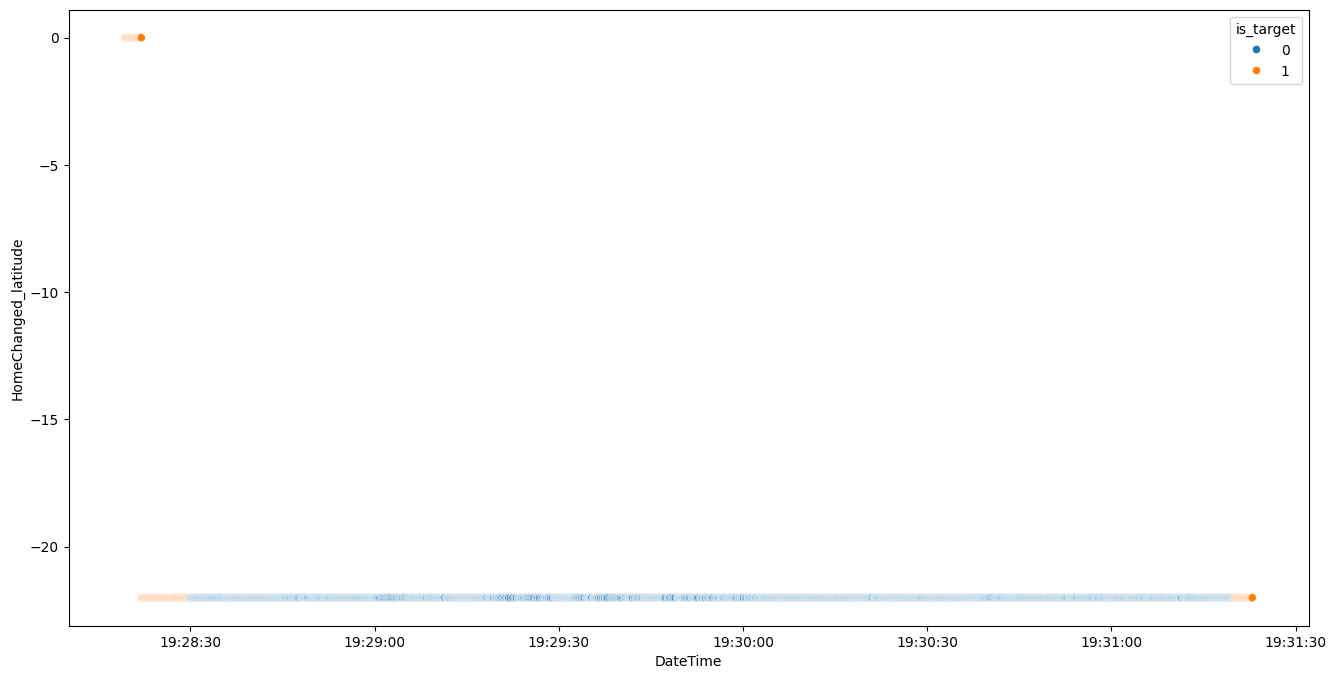

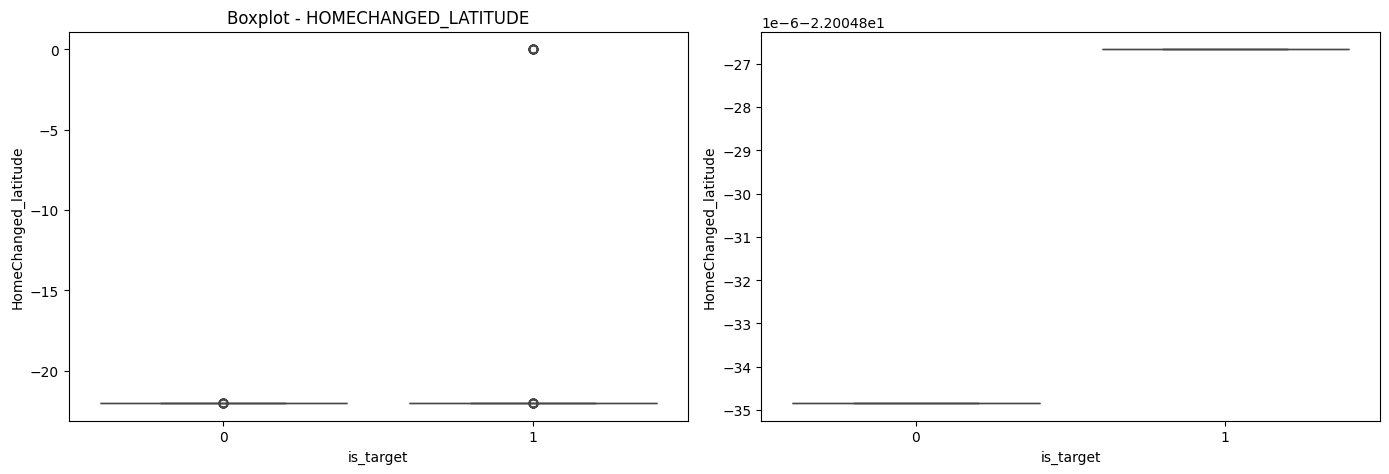

count   mean  std    min    25%    50%    75%    90%    95%    max
is_target                                                                     
0         1486.00 -22.00 0.00 -22.00 -22.00 -22.00 -22.00 -22.00 -22.00 -22.00
1          130.00 -17.43 8.96 -22.00 -22.00 -22.00 -22.00   0.00   0.00   0.00



>> HomeChanged_longitude:



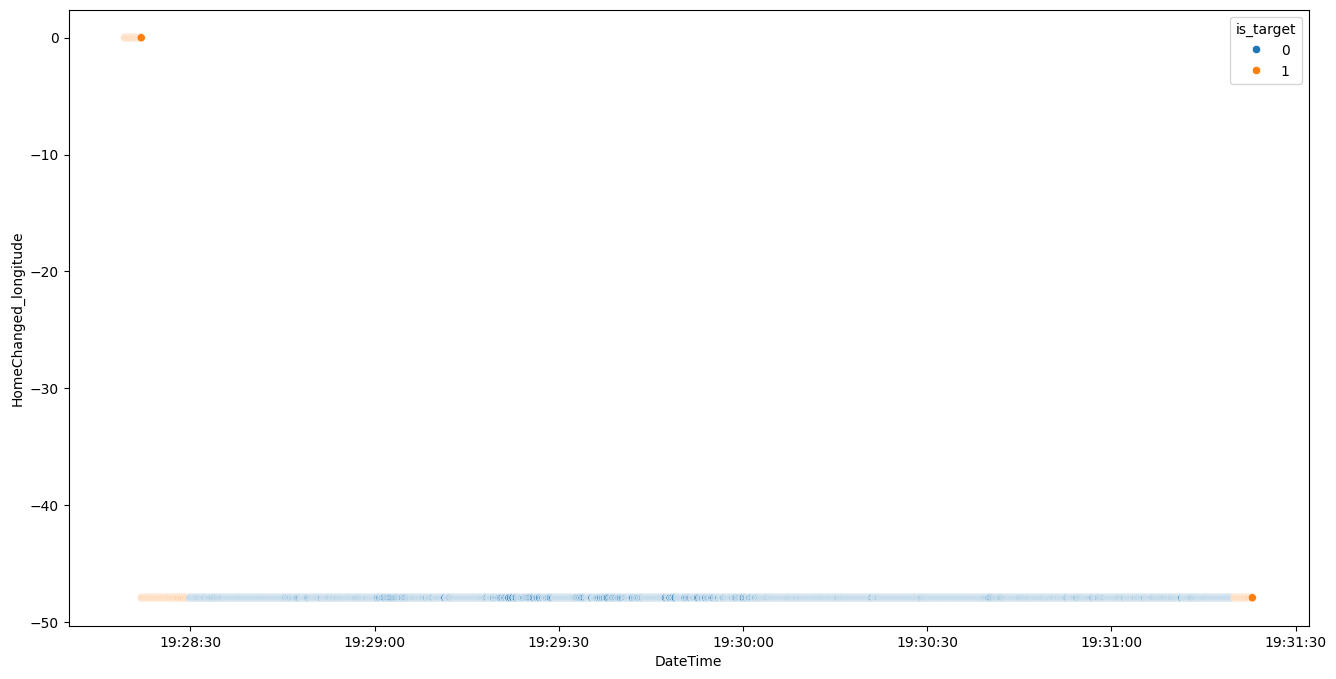

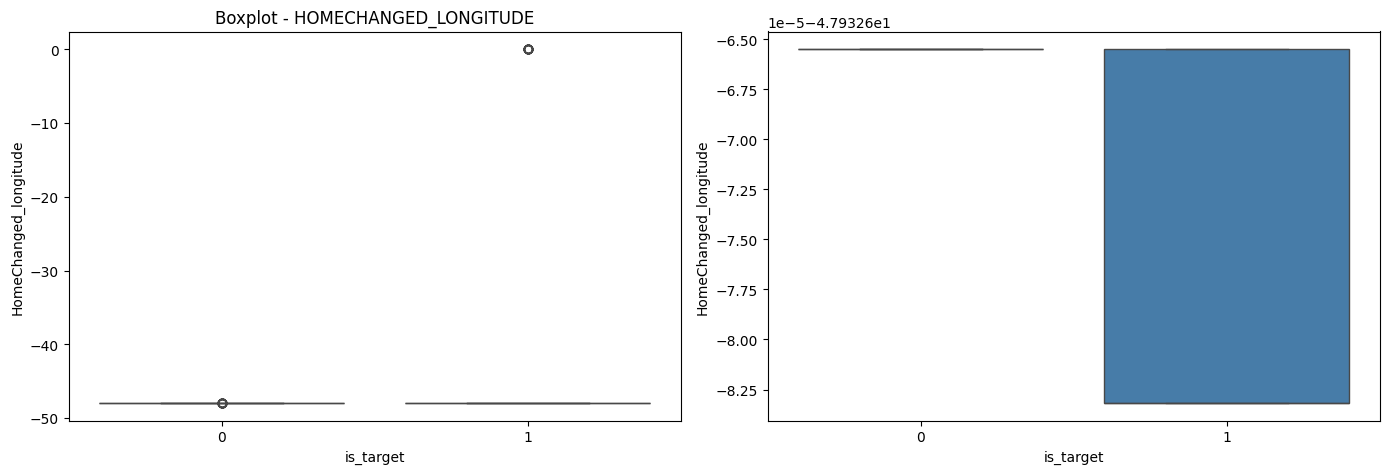

count   mean   std    min    25%    50%    75%    90%    95%  \
is_target                                                                  
0         1486.00 -47.93  0.00 -47.93 -47.93 -47.93 -47.93 -47.93 -47.93   
1          130.00 -37.98 19.52 -47.93 -47.93 -47.93 -47.93   0.00   0.00   

             max  
is_target         
0         -47.93  
1           0.00



>> SpeedChanged_speedX:



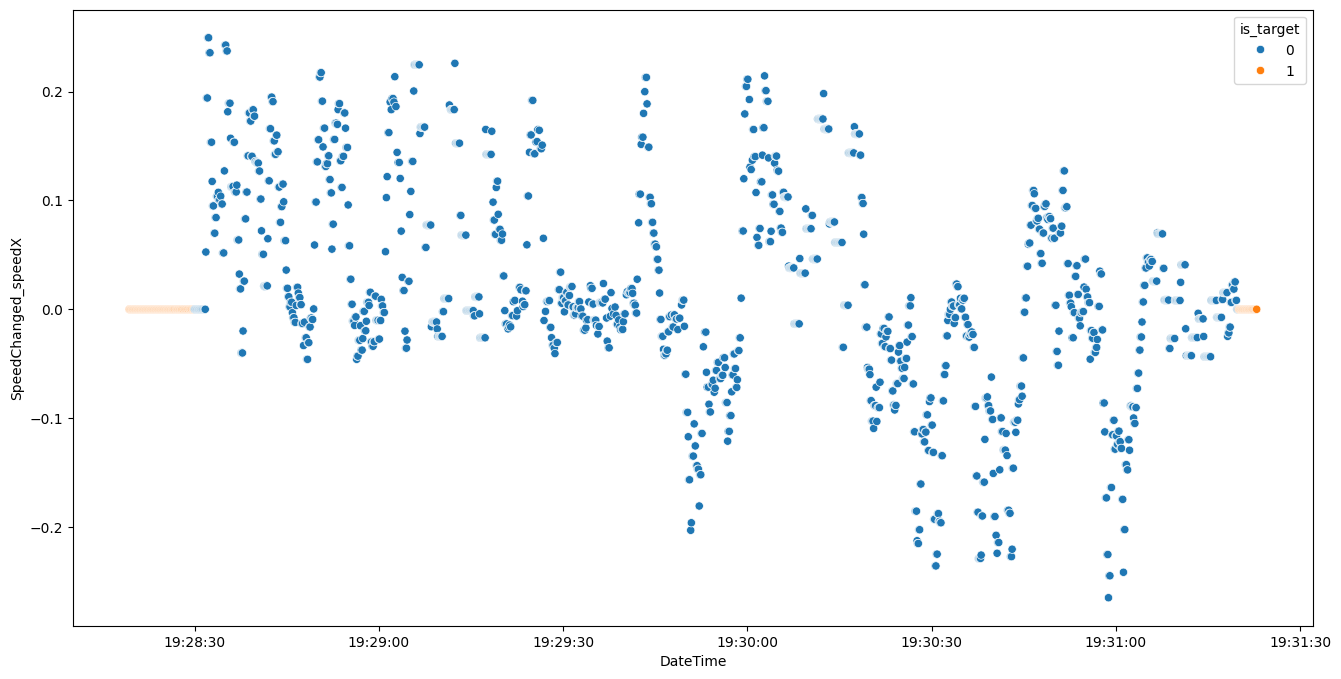

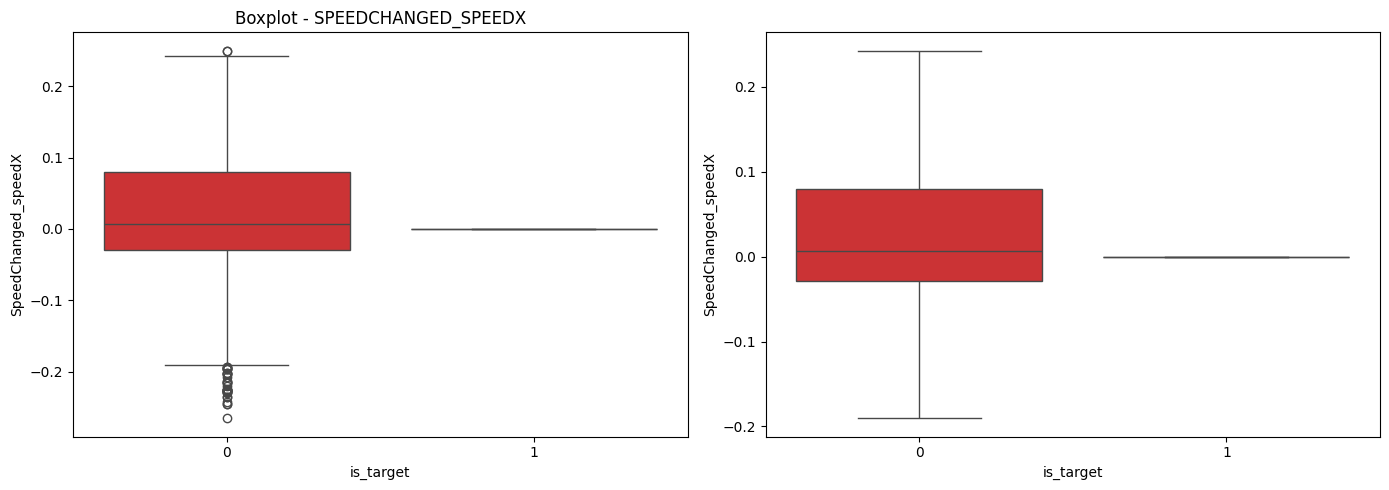

count  mean  std   min   25%  50%  75%  90%  95%  max
is_target                                                        
0         1486.00  0.02 0.10 -0.27 -0.03 0.01 0.08 0.15 0.18 0.25
1          130.00  0.00 0.00  0.00  0.00 0.00 0.00 0.00 0.00 0.00



>> SpeedChanged_speedY:



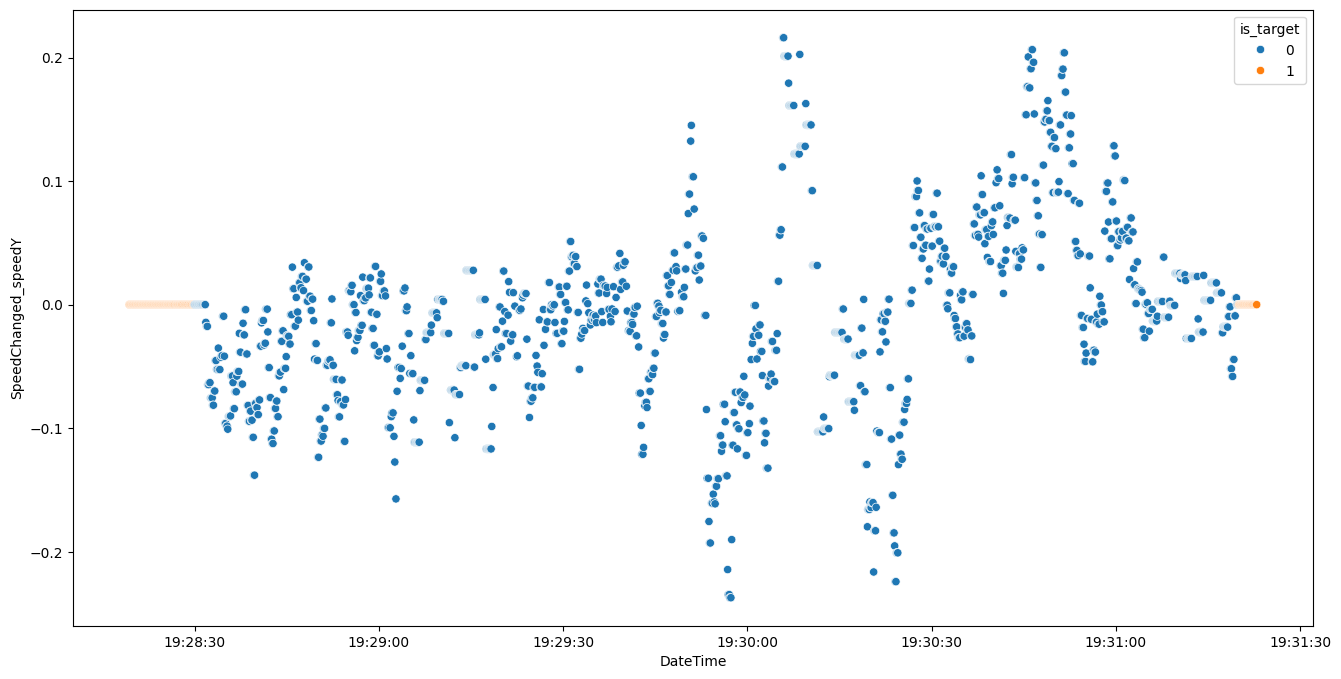

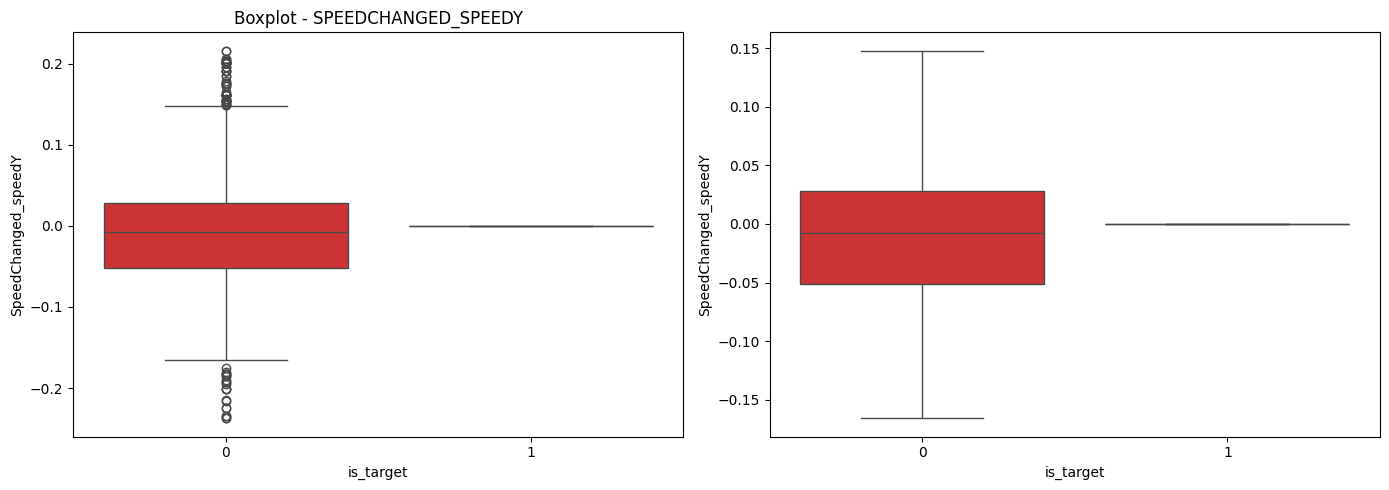

count  mean  std   min   25%   50%  75%  90%  95%  max
is_target                                                         
0         1486.00 -0.01 0.07 -0.24 -0.05 -0.01 0.03 0.09 0.13 0.22
1          130.00  0.00 0.00  0.00  0.00  0.00 0.00 0.00 0.00 0.00



>> SpeedChanged_speedZ:



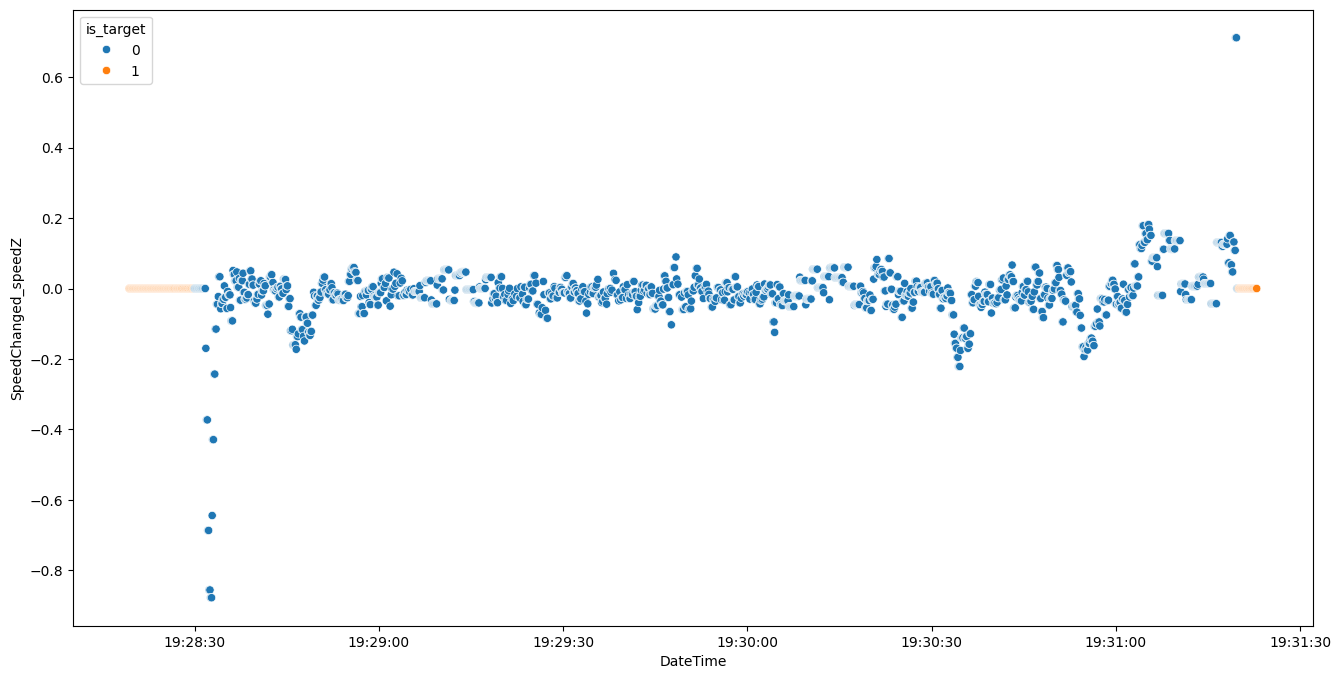

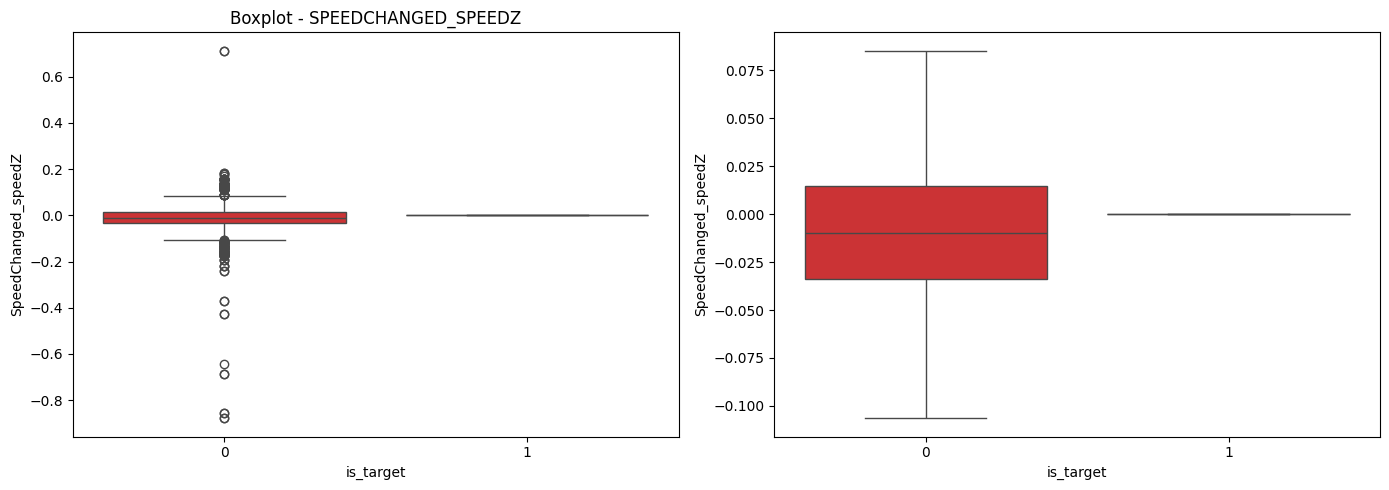

count  mean  std   min   25%   50%  75%  90%  95%  max
is_target                                                         
0         1486.00 -0.01 0.08 -0.88 -0.03 -0.01 0.01 0.05 0.09 0.71
1          130.00  0.00 0.00  0.00  0.00  0.00 0.00 0.00 0.00 0.00



>> WifiSignalChanged_rssi:



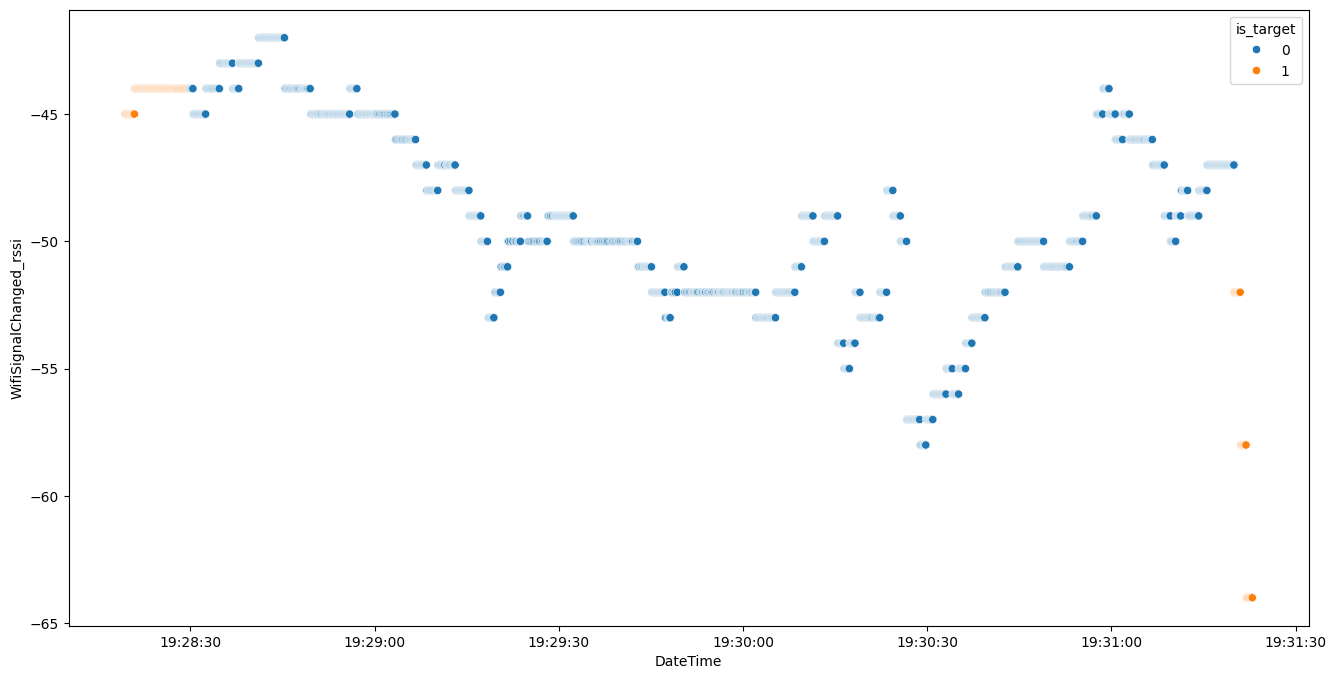

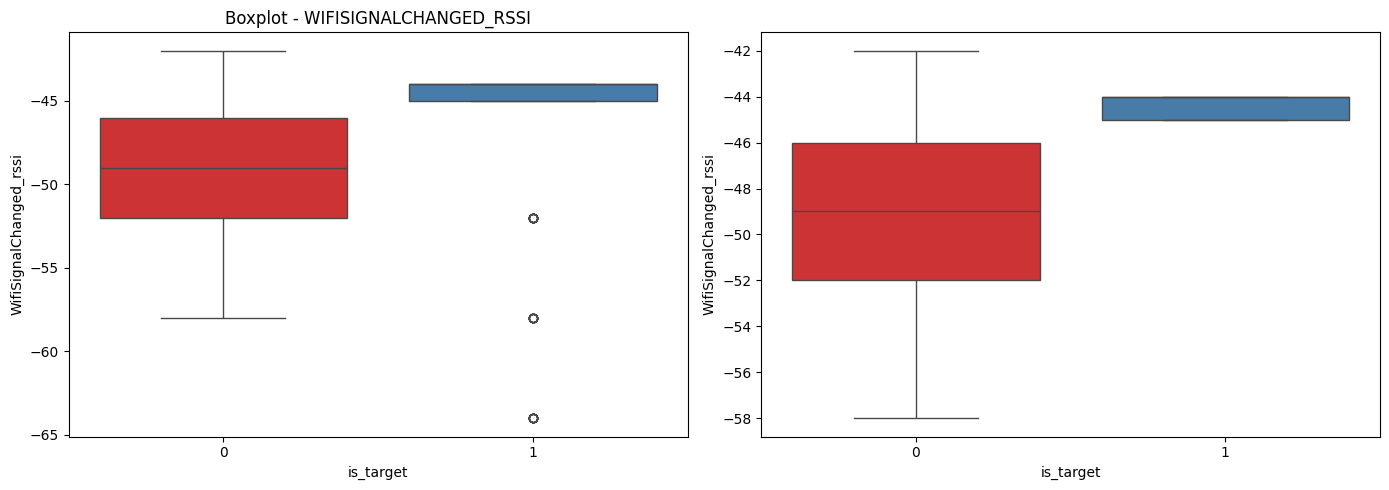

count   mean  std    min    25%    50%    75%    90%    95%    max
is_target                                                                     
0         1486.00 -49.08 3.64 -58.00 -52.00 -49.00 -46.00 -44.00 -43.00 -42.00
1          130.00 -47.09 6.09 -64.00 -45.00 -44.00 -44.00 -44.00 -44.00 -44.00



>> moveByEnd_dPsi:



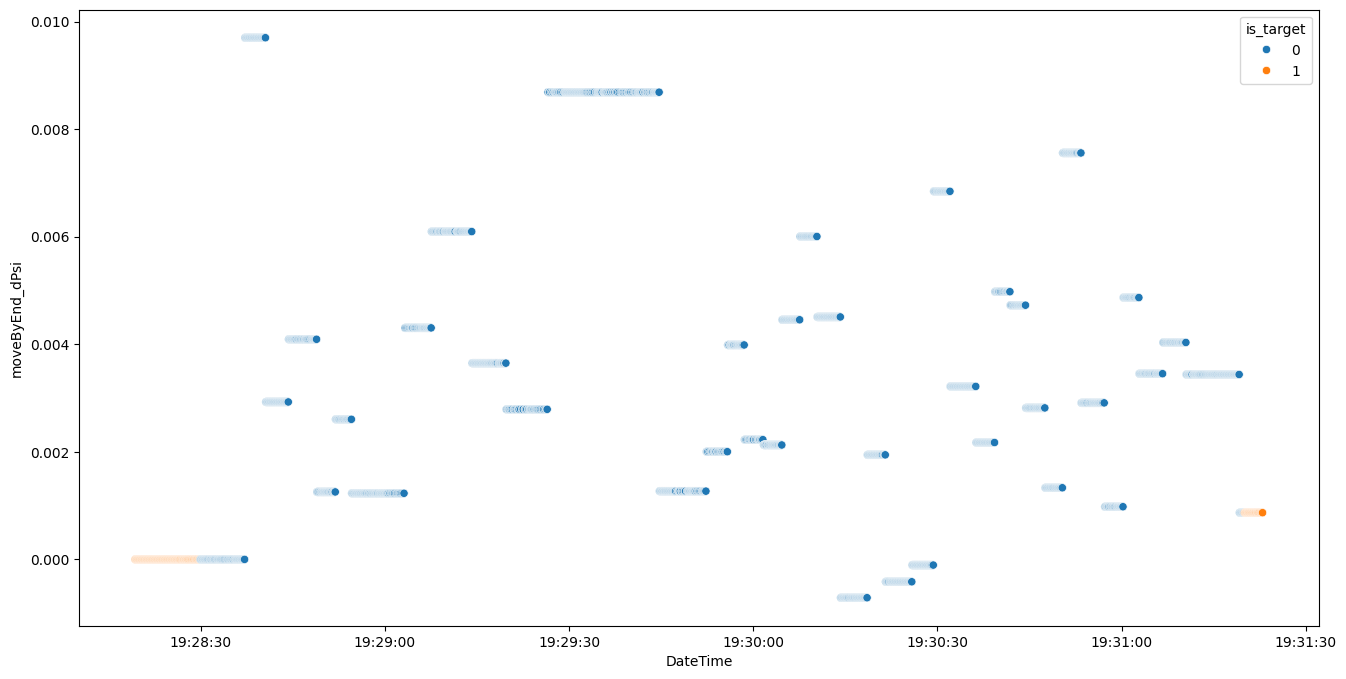

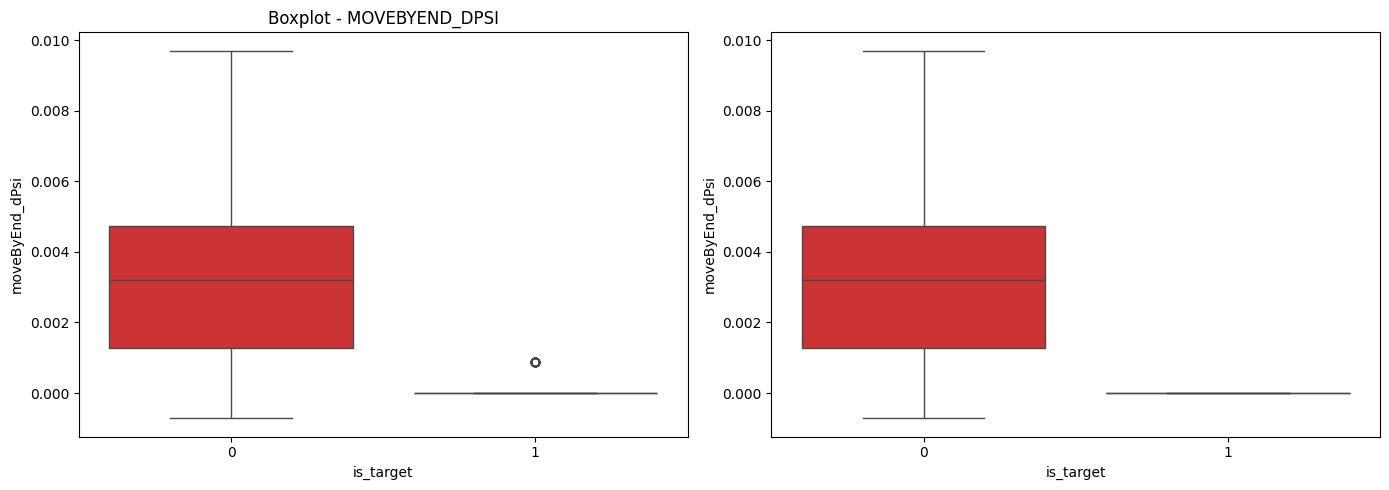

count  mean  std   min  25%  50%  75%  90%  95%  max
is_target                                                       
0         1486.00  0.00 0.00 -0.00 0.00 0.00 0.00 0.01 0.01 0.01
1          130.00  0.00 0.00  0.00 0.00 0.00 0.00 0.00 0.00 0.00



>> moveByEnd_dX:



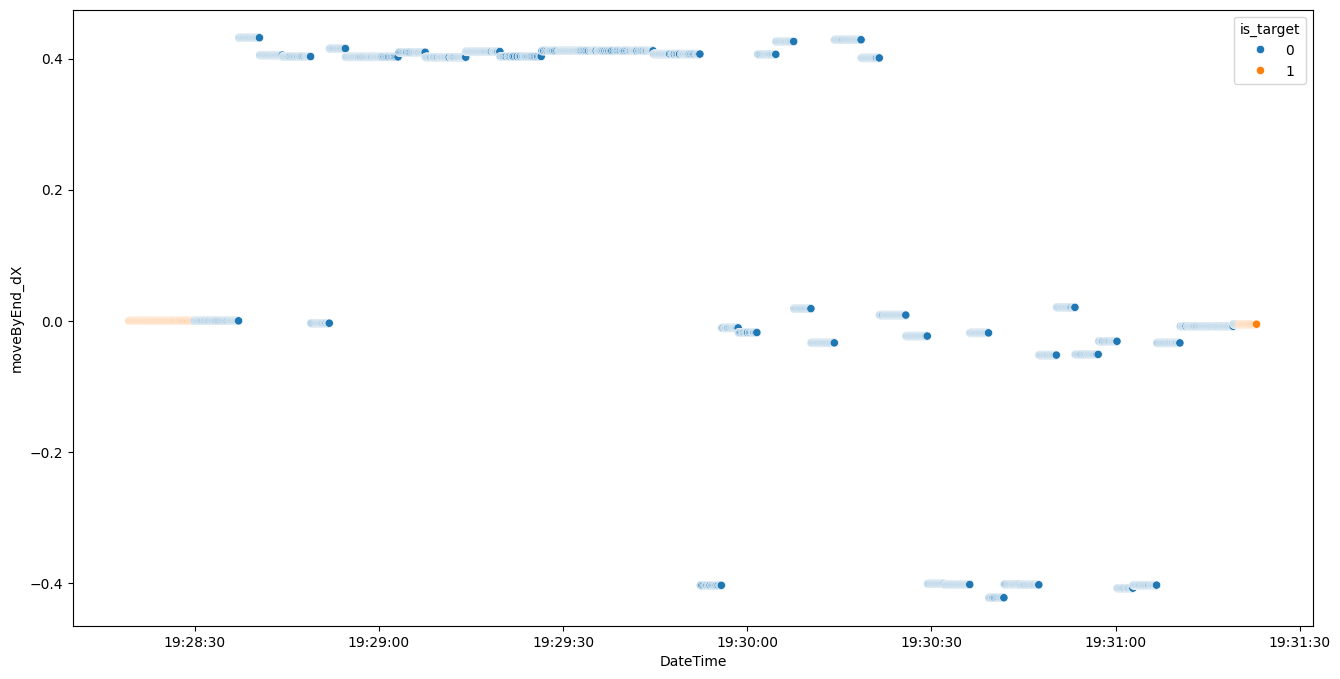

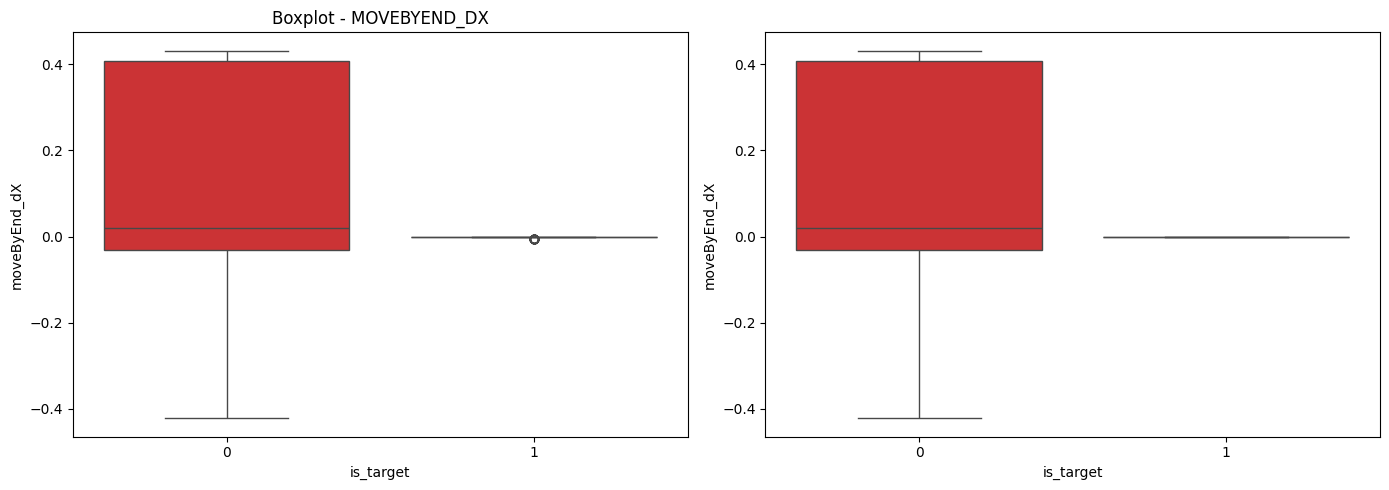

count  mean  std   min   25%  50%  75%  90%  95%  max
is_target                                                        
0         1486.00  0.13 0.30 -0.42 -0.03 0.02 0.41 0.41 0.43 0.43
1          130.00 -0.00 0.00 -0.01  0.00 0.00 0.00 0.00 0.00 0.00



>> moveByEnd_dY:



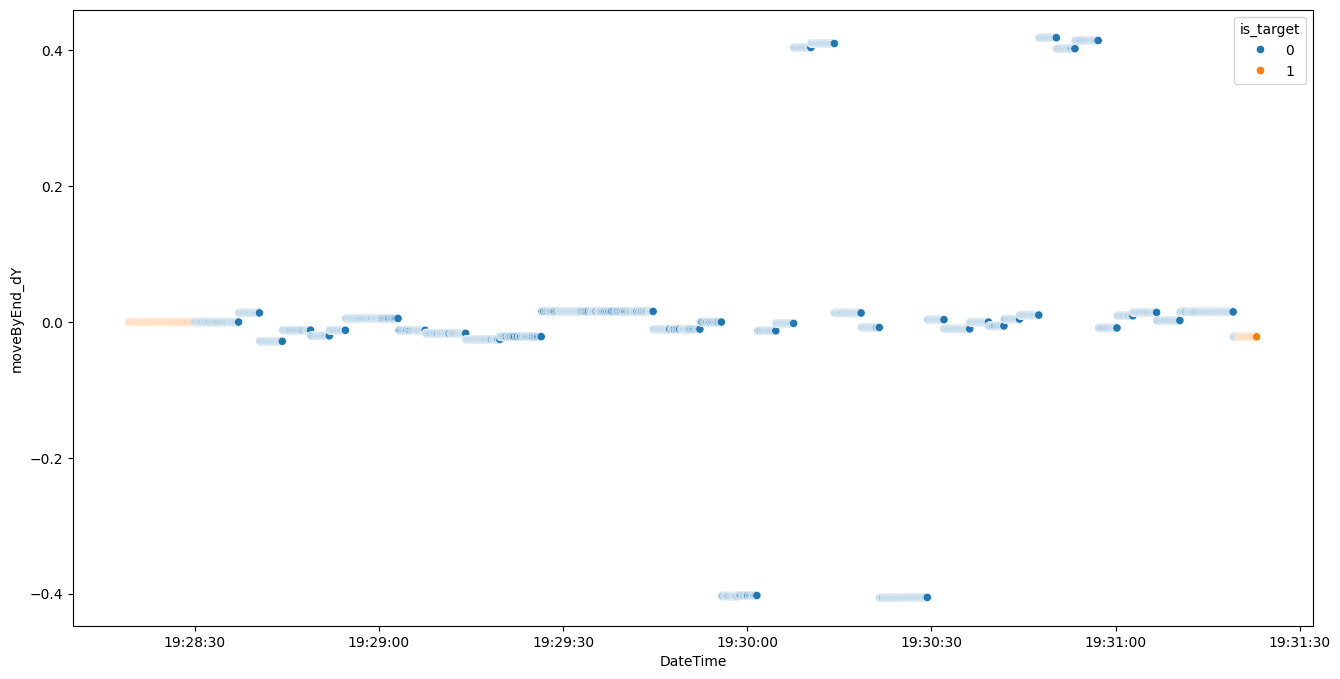

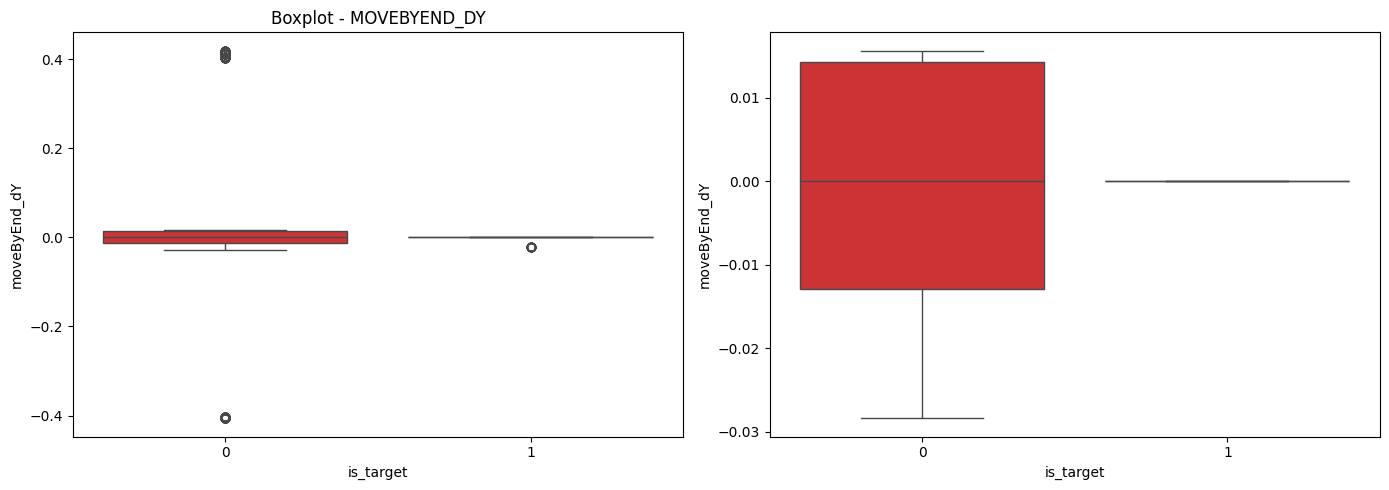

count  mean  std   min   25%  50%  75%  90%  95%  max
is_target                                                        
0         1486.00  0.01 0.18 -0.41 -0.01 0.00 0.01 0.40 0.41 0.42
1          130.00 -0.00 0.01 -0.02  0.00 0.00 0.00 0.00 0.00 0.00



>> moveByEnd_dZ:



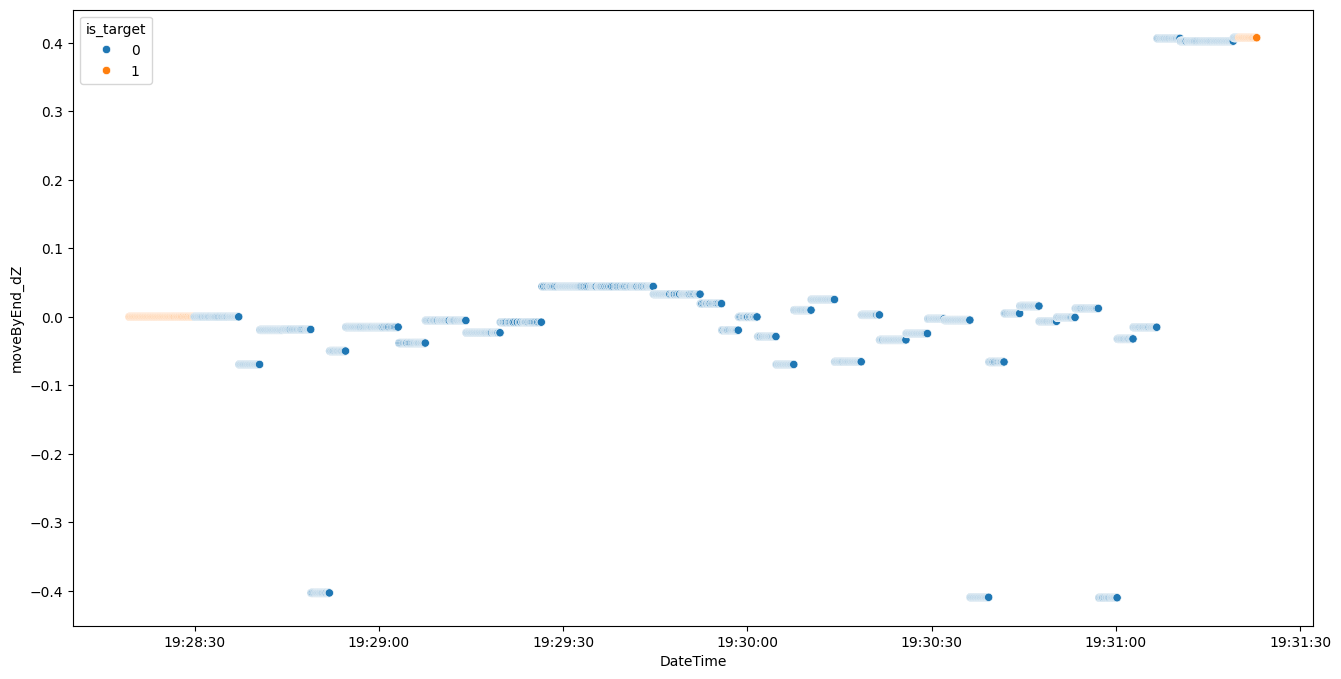

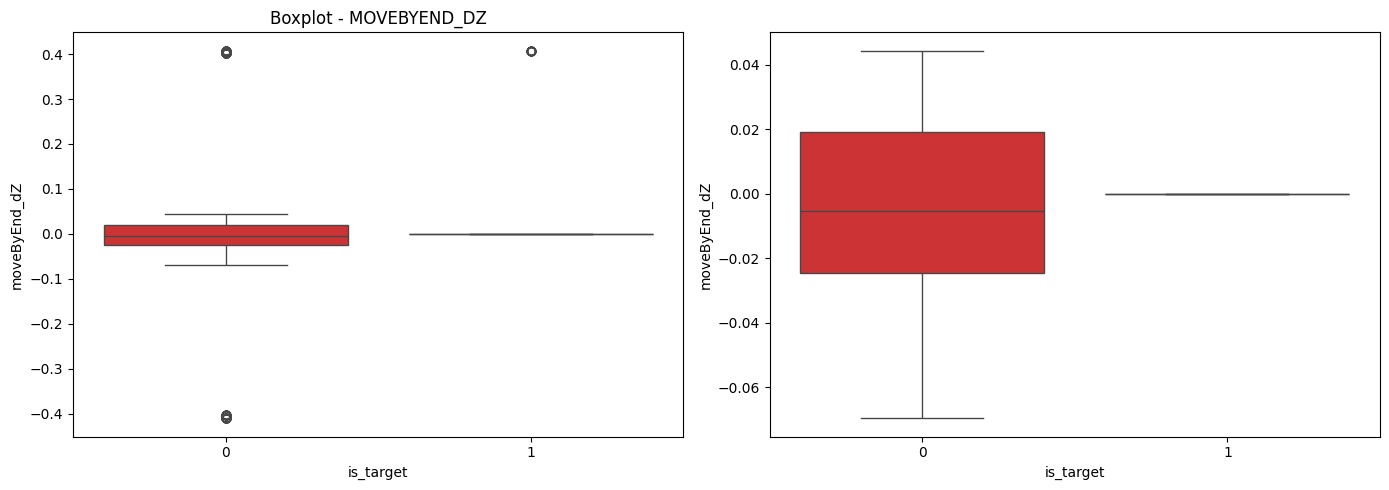

count  mean  std   min   25%   50%  75%  90%  95%  max
is_target                                                         
0         1486.00  0.00 0.15 -0.41 -0.02 -0.01 0.02 0.04 0.40 0.41
1          130.00  0.09 0.17  0.00  0.00  0.00 0.00 0.41 0.41 0.41

In [12]:
for col in numerical_cols:  # Numerical
    print(f"\n\n>> {col}:\n")
    show_scatterplot(spoofing_flight_df, "DateTime", col, category="is_target")
    show_boxplot(spoofing_flight_df, col, category="is_target")



>> FlyingStateChanged_state_unknown:



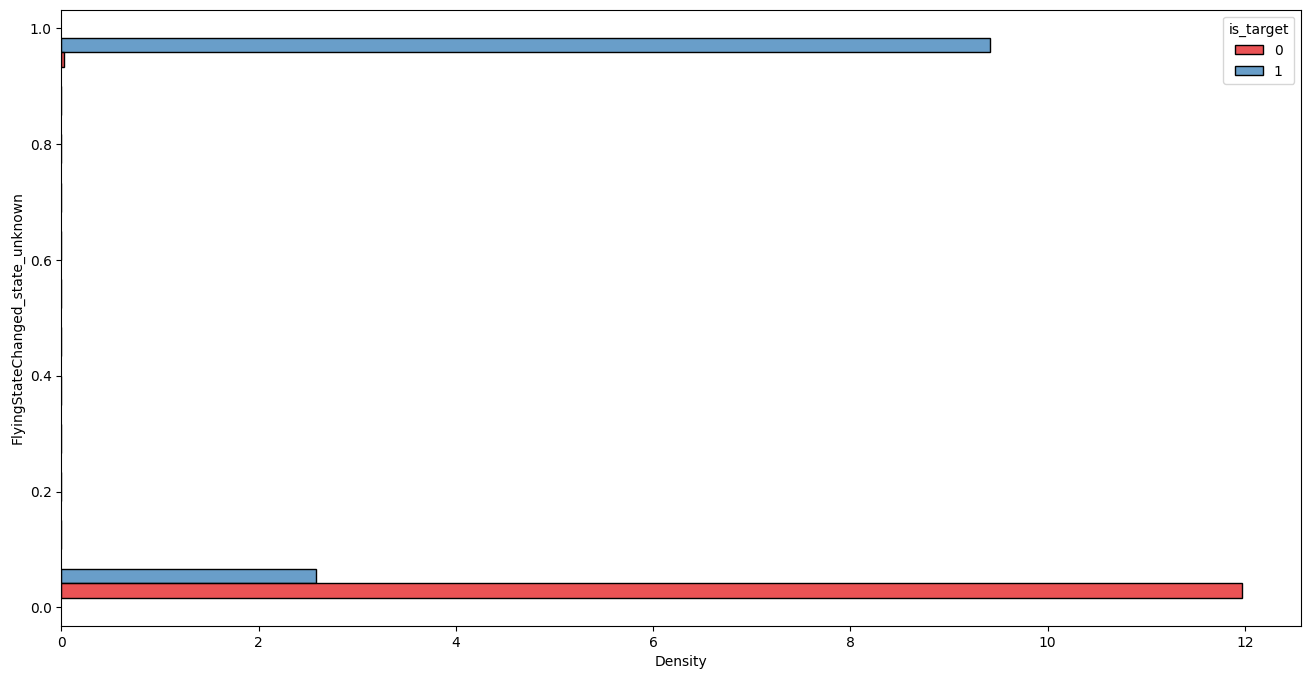

count  unique  top  freq
is_target                          
0           1486       2    0  1483
1            130       2    1   102



>> FlyingStateChanged_state_landed:



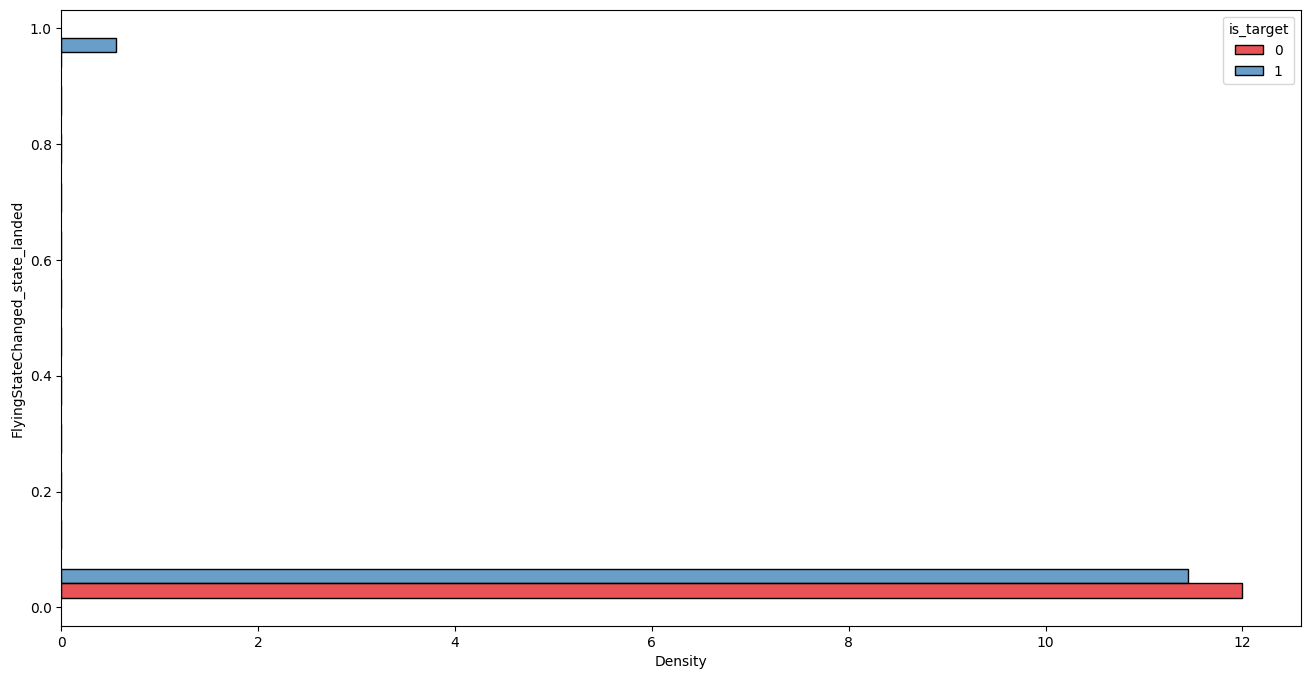

count  unique  top  freq
is_target                          
0           1486       1    0  1486
1            130       2    0   124



>> FlyingStateChanged_state_takingoff:



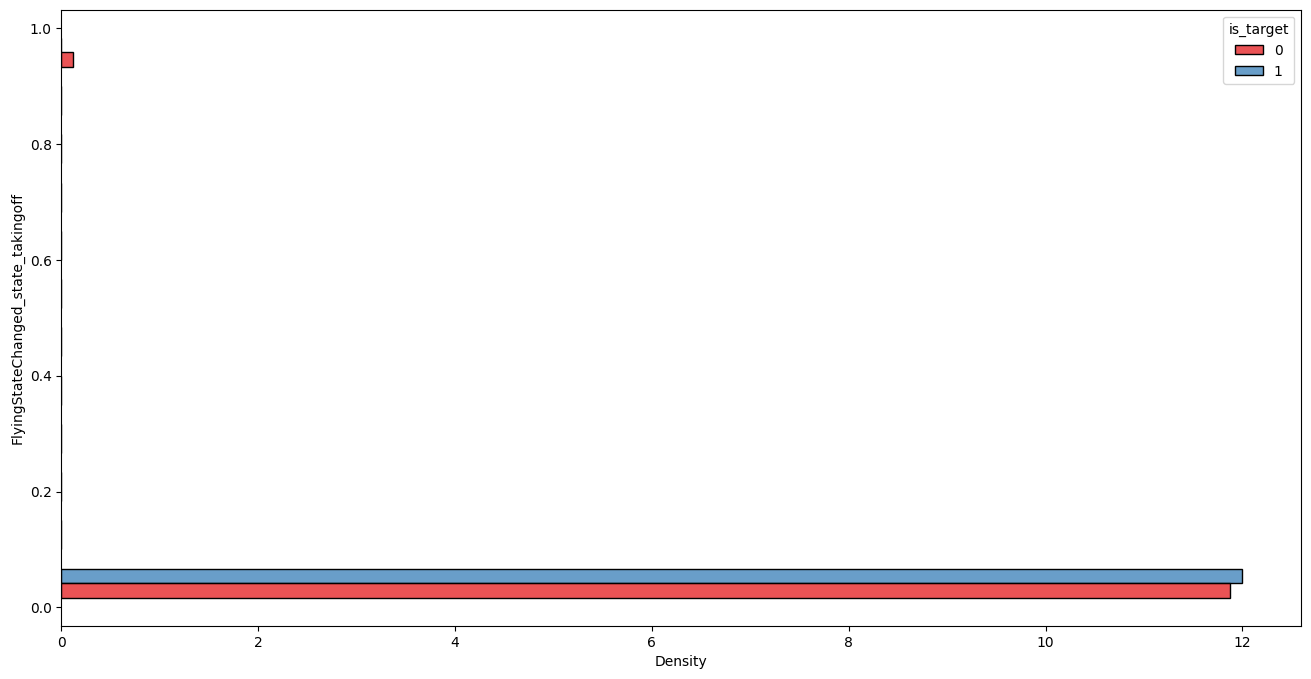

count  unique  top  freq
is_target                          
0           1486       2    0  1471
1            130       1    0   130



>> FlyingStateChanged_state_hovering:



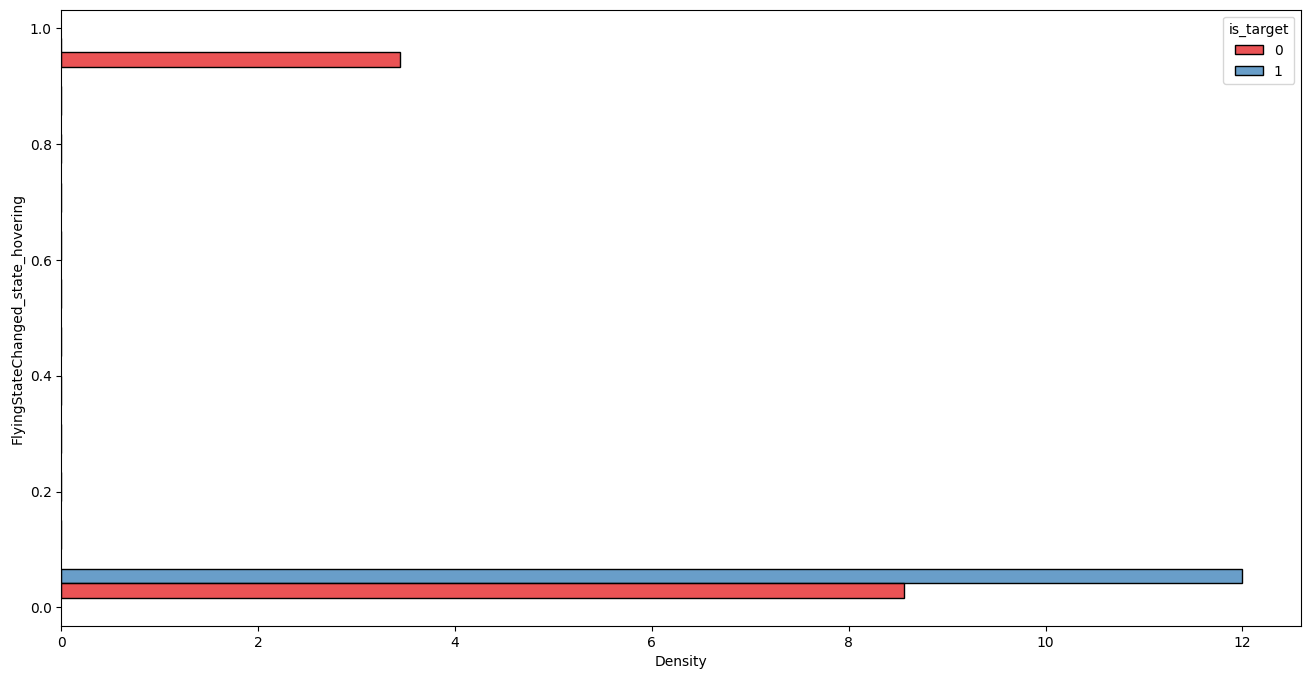

count  unique  top  freq
is_target                          
0           1486       2    0  1060
1            130       1    0   130



>> FlyingStateChanged_state_flying:



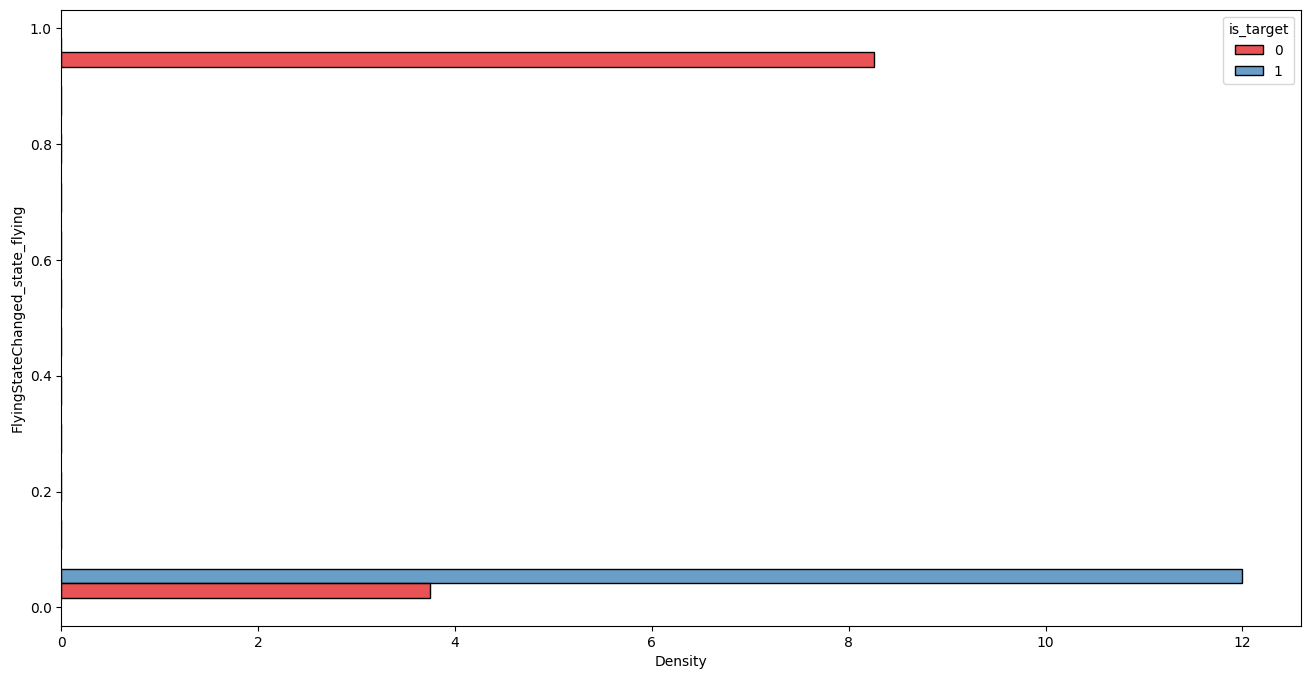

count  unique  top  freq
is_target                          
0           1486       2    1  1022
1            130       1    0   130



>> FlyingStateChanged_state_landing:



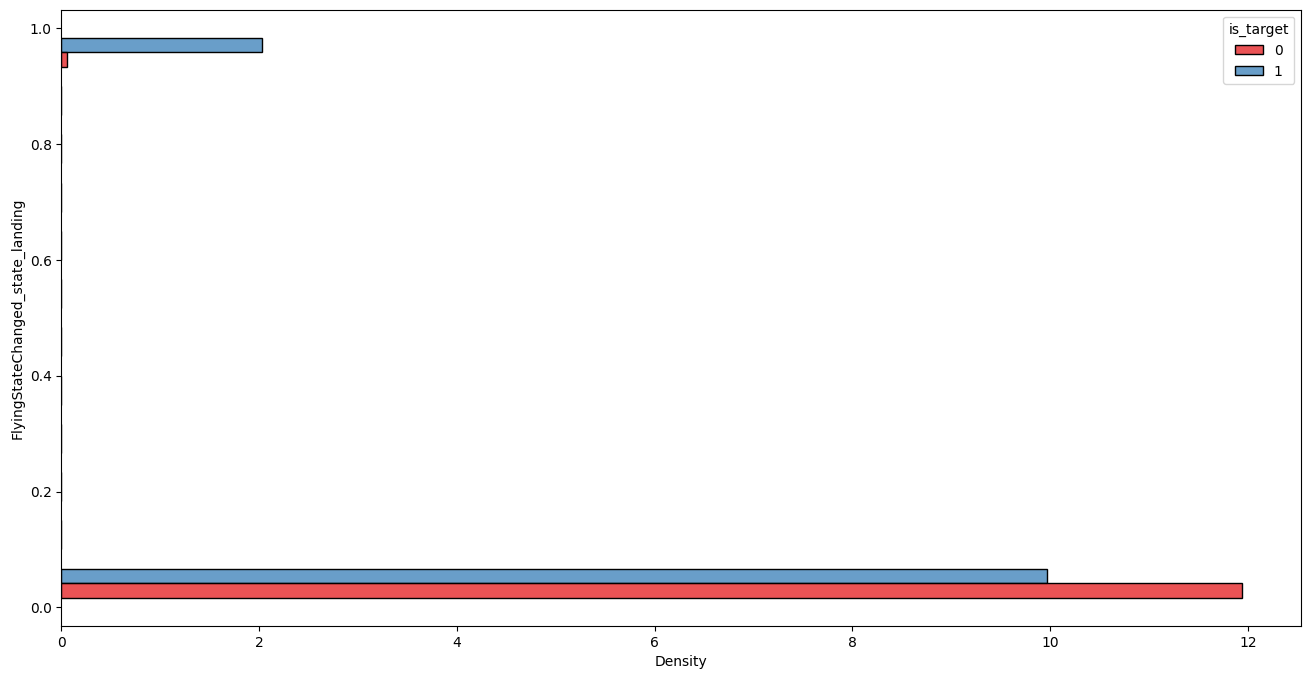

count  unique  top  freq
is_target                          
0           1486       2    0  1479
1            130       2    0   108



>> FlyingStateChanged_state_emergency:



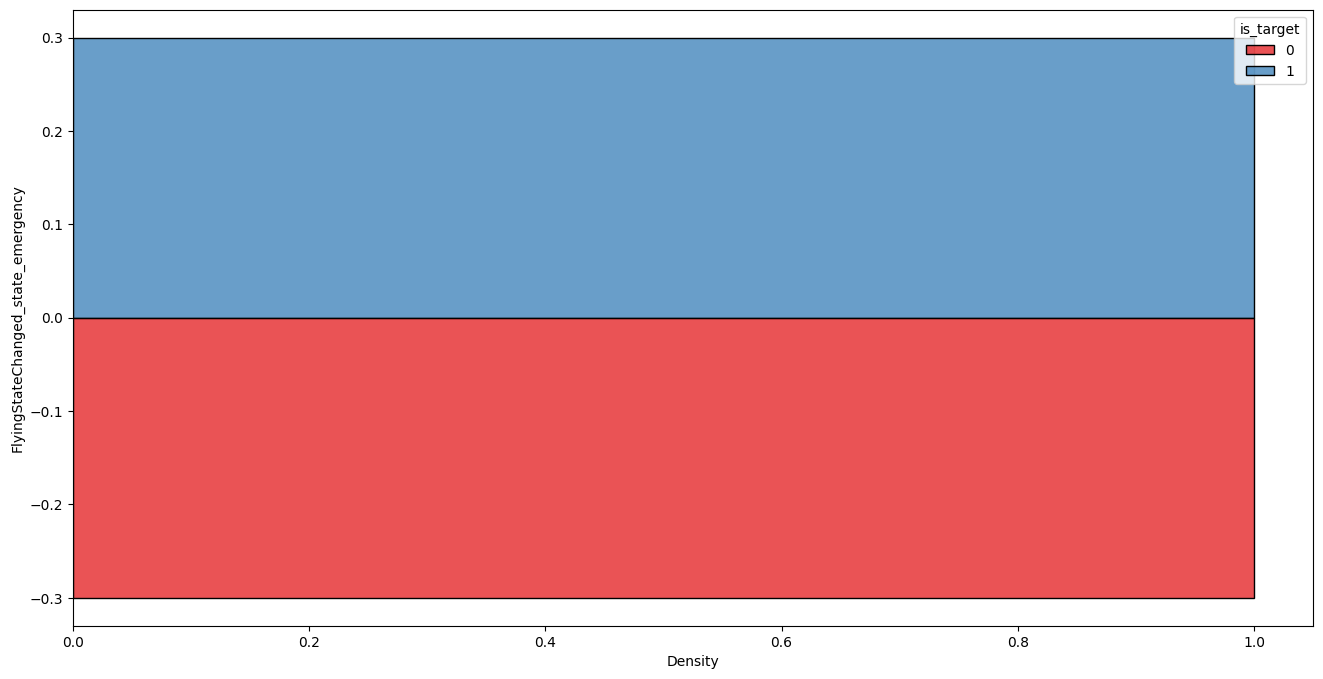

count  unique  top  freq
is_target                          
0           1486       1    0  1486
1            130       1    0   130



>> FlyingStateChanged_state_usertakeoff:



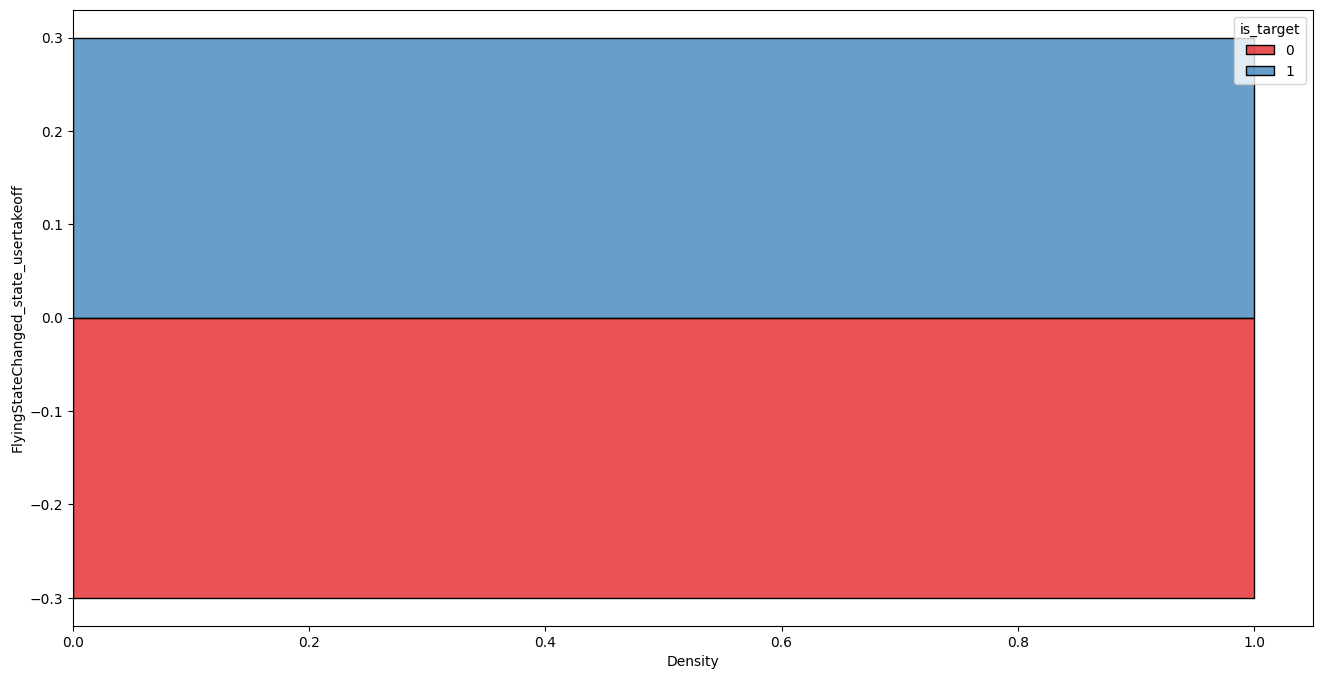

count  unique  top  freq
is_target                          
0           1486       1    0  1486
1            130       1    0   130



>> FlyingStateChanged_state_motor_ramping:



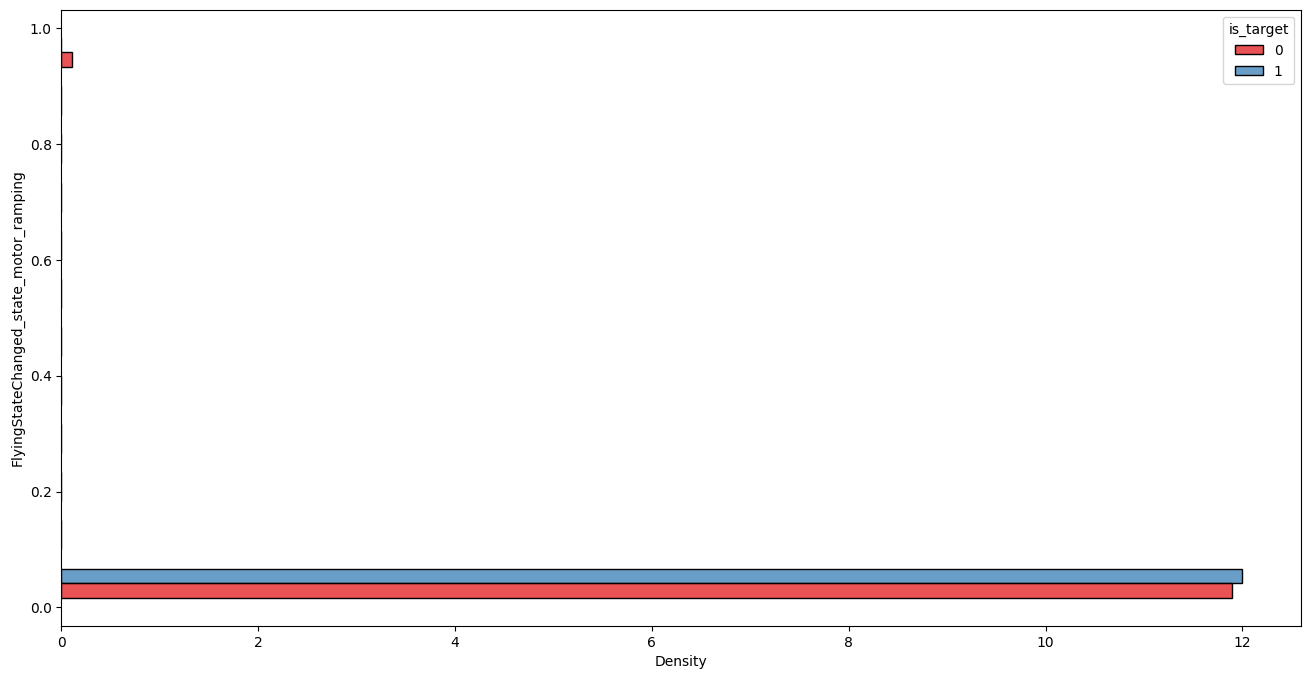

count  unique  top  freq
is_target                          
0           1486       2    0  1473
1            130       1    0   130



>> FlyingStateChanged_state_motor_emergency_landing:



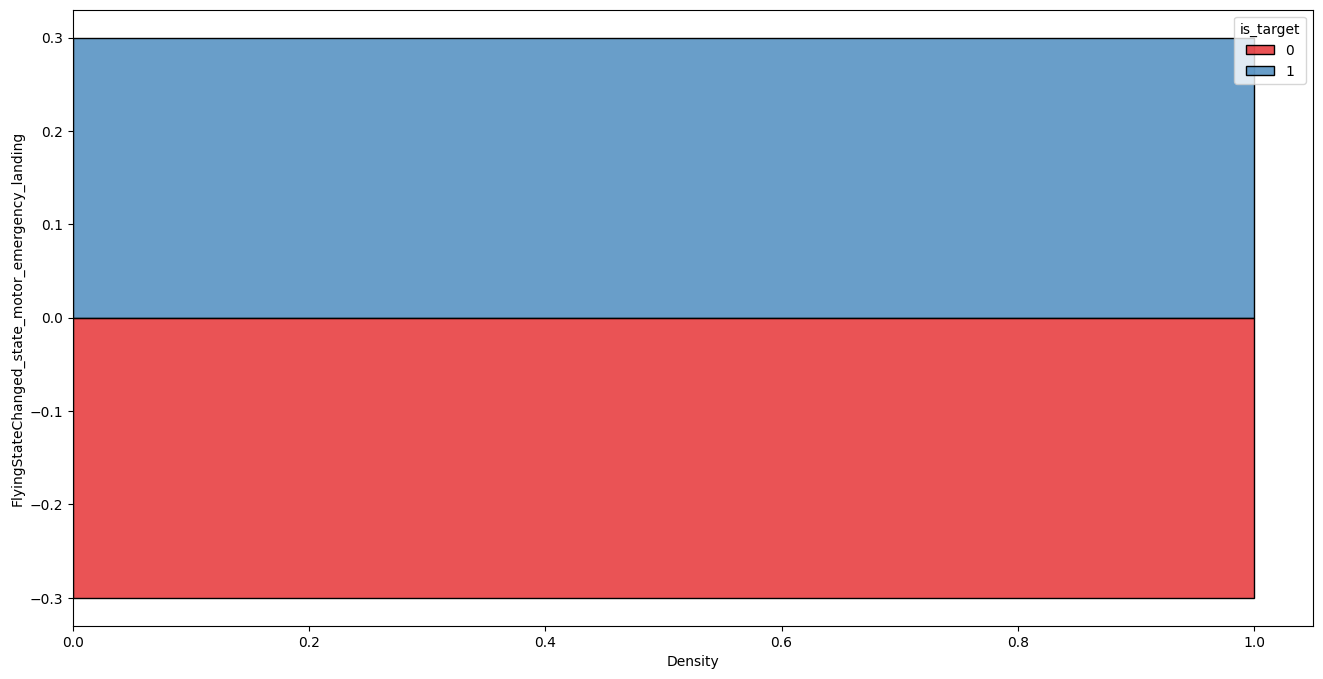

count  unique  top  freq
is_target                          
0           1486       1    0  1486
1            130       1    0   130



>> HomeTypeAvailabilityChanged_type_UNKNOWN:



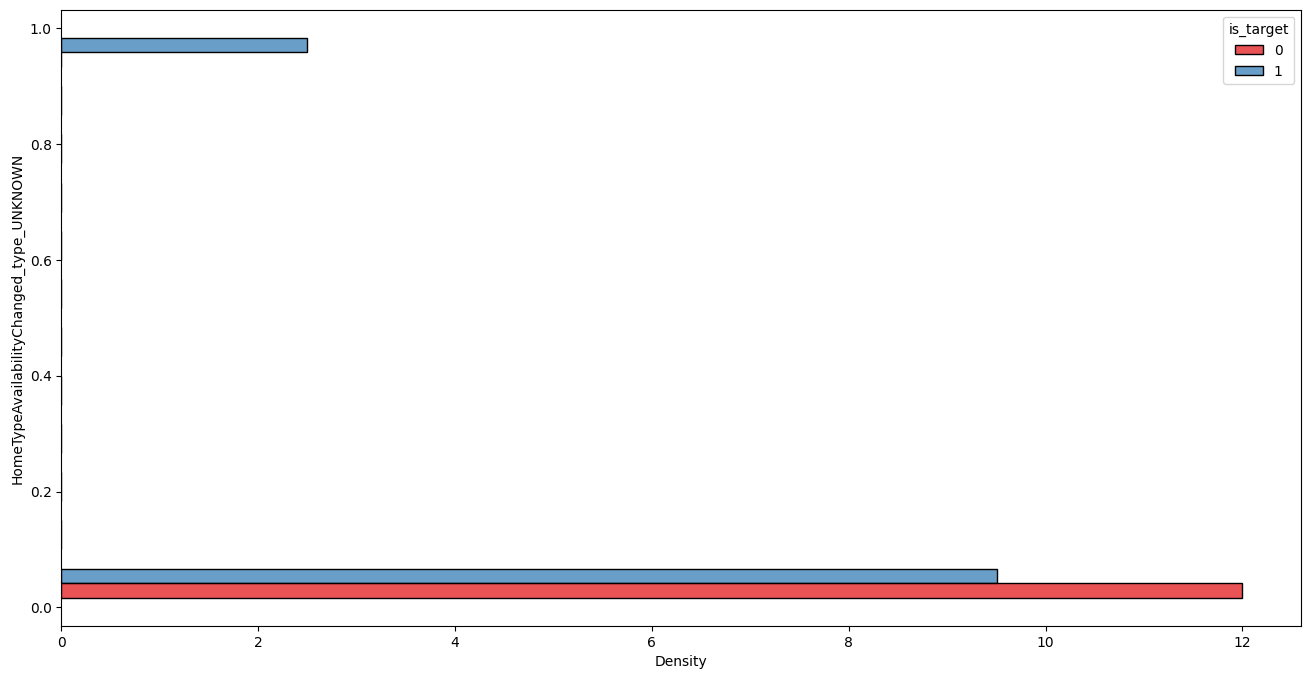

count  unique  top  freq
is_target                          
0           1486       1    0  1486
1            130       2    0   103



>> HomeTypeAvailabilityChanged_type_TAKEOFF:



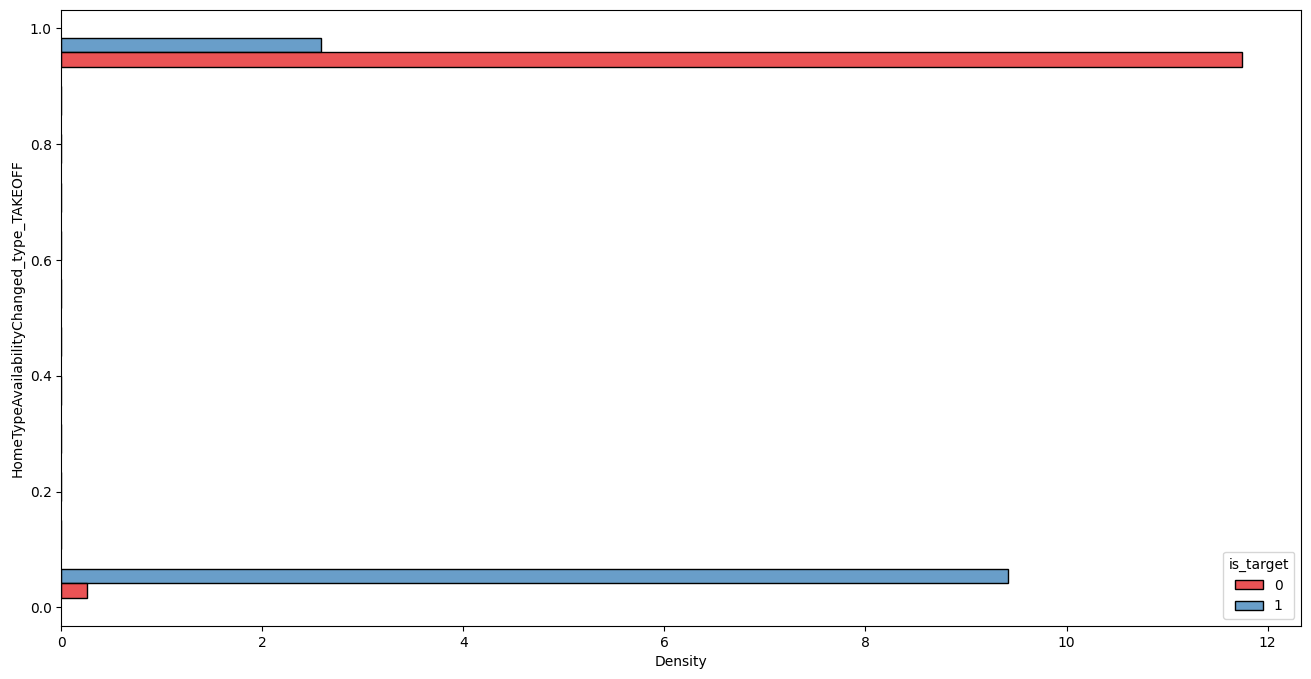

count  unique  top  freq
is_target                          
0           1486       2    1  1455
1            130       2    0   102



>> HomeTypeAvailabilityChanged_type_PILOT:



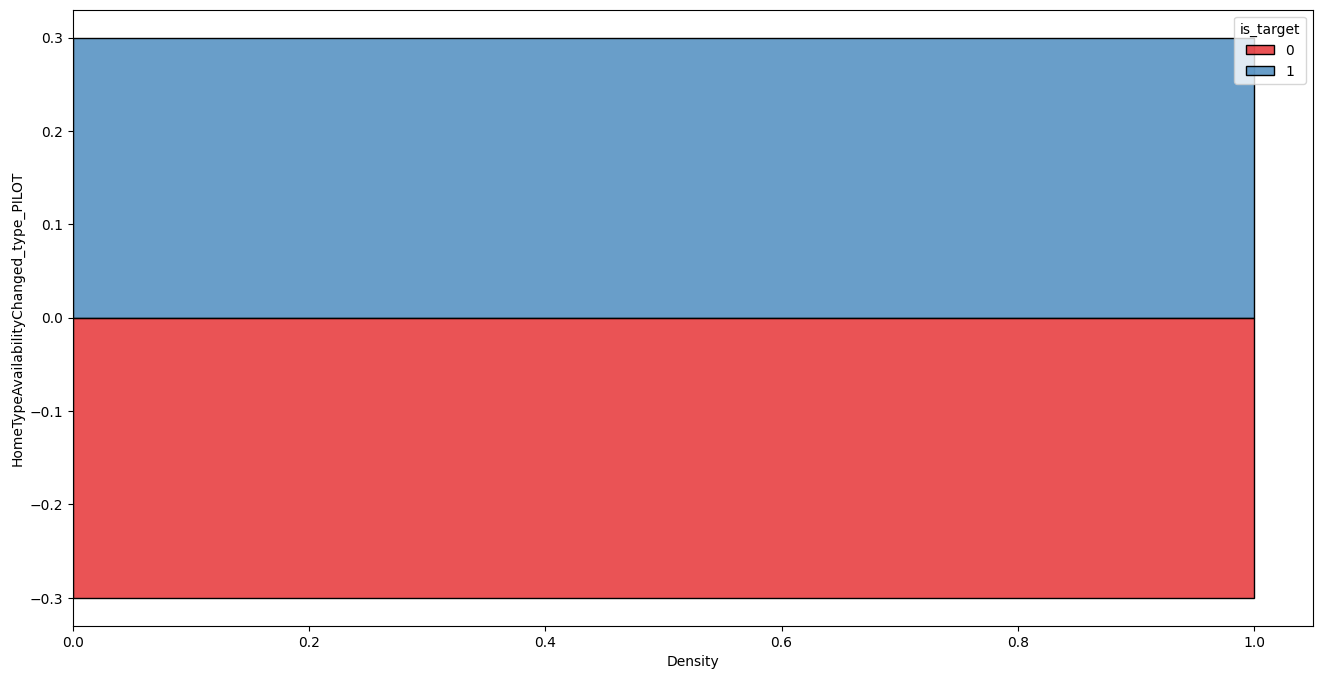

count  unique  top  freq
is_target                          
0           1486       1    0  1486
1            130       1    0   130



>> HomeTypeAvailabilityChanged_type_FIRST_FIX:



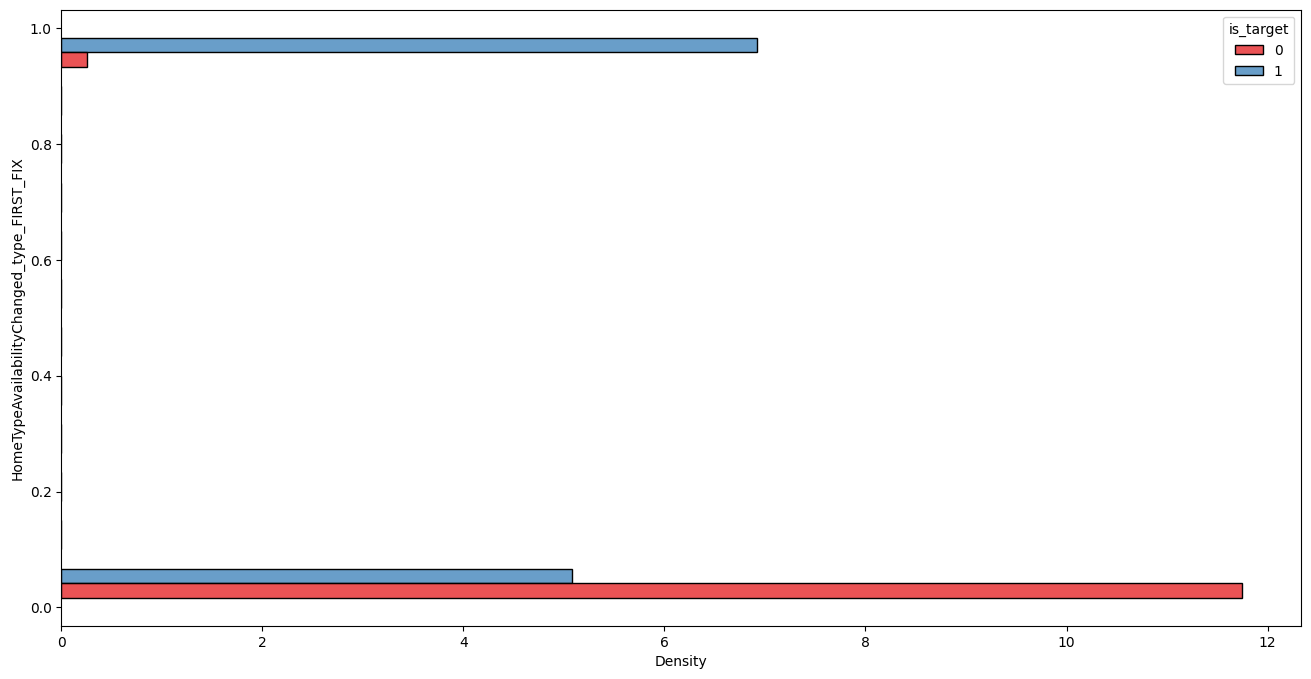

count  unique  top  freq
is_target                          
0           1486       2    0  1455
1            130       2    1    75



>> HomeTypeAvailabilityChanged_type_FOLLOWEE:



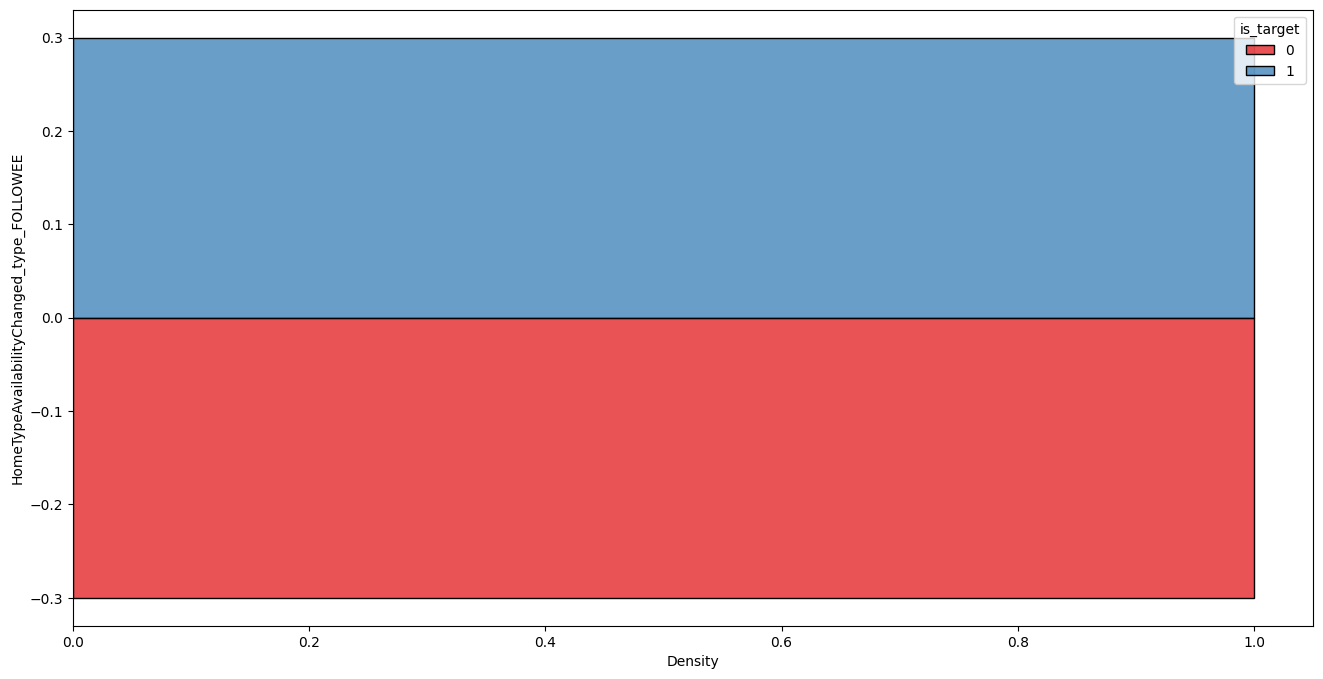

count  unique  top  freq
is_target                          
0           1486       1    0  1486
1            130       1    0   130

In [13]:
for col in categorical_cols:  # Categorical
    print(f"\n\n>> {col}:\n")
    show_histogram(spoofing_flight_df, col, orient_h=False, describe=True, category="is_target")

## 05. Save Pre-Processed Data

In [14]:
# Save data after pre-processing
jamming_flight_df.to_csv(f"{DATA_PATH}jamming_flight_preprocessed.csv", index=False)
spoofing_flight_df.to_csv(f"{DATA_PATH}spoofing_flight_preprocessed.csv", index=False)